# Introduction

**Team Information:**
* Team Name: The Ladderists
* Members:
    * Ayşenaz Sude Tekel - 2021205045
    * Şeyma Ünal - 2021205027

**Our Project Title: "An Analysis on the World Happiness Dataset – How Can One Be Happy?"**

**Our Aim:**

- In this project, we chose the World Happiness Report dataset. It includes information about the happiness scores of different countries over the years and the factors that affect happiness, such as income, health, and social support.

- We selected this dataset because it provides a multidimensional view of happiness across countries and time, making it suitable for analyzing both cross-sectional and time-series patterns.

- Our goal was to investigate which factors contribute the most to overall happiness and how economic, social, and emotional indicators can predict life satisfaction. To improve the model’s performance, we also created some new features based on logical combinations of the existing variables.

In the end, we aimed to predict happiness scores and identify the most important contributing factors.


**What We Expect from This Project?**
- At the beginning of the project, we had some expectations about the relationships between the variables in the dataset. For example, we expected a positive correlation between GDP per capita and Life Ladder, since people in wealthier countries are usually more satisfied with their lives.

- We also thought that Healthy life expectancy and Social support would have positive effects on happiness, because people tend to feel happier when they are healthy and supported by others.

- On the other hand, we expected Perception of corruption to be negatively related to happiness, as trust in institutions is an important factor for overall well-being.

- In our complex analysis of the relationship between GDP, Life Ladder score, and corruption, we observed that even when GDP and happiness are positively related, a high level of corruption can have a negative impact on this relationship.


In addition, we aimed to explore whether emotional factors, like positive and negative affect, also play an important role in predicting happiness, beyond just economic indicators.


**References**
- **Dataset Source:**
World Happiness Report Retrieved from Kaggle:https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

- **Code Environment and Template:**
Some of the base code structure and setup were adapted from the course Binder repository provided by our instructor.

# Some Necessary Library Installations

In [5]:
install.packages("dplyr")
install.packages("tidyverse")
install.packages("tidyr")  
install.packages("corrplot")
install.packages("ggplot2")
install.packages("randomForest")
install.packages("rpart")
install.packages("rpart.plot")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [6]:
library(tidyr)
library(dplyr)
library(readr)
library(ggplot2)
library(tidyverse)
library(data.table)
library(plotly) 
library(DT) 
library(broom) 
library(caret) 
library(psych) 
library(GGally) 
library(magrittr) 
library(lindia) 
library(car) 
library(reshape2)
library(pheatmap)
library("corrplot")
library(randomForest)
library(rpart)
library(rpart.plot)
library(caret)
library(ggpubr)



In [7]:
df <- read.csv("world-happiness.csv")
head(df)

Country.name year Life.Ladder Log.GDP.per.capita Social.support
1 Afghanistan  2008 3.724       7.370              0.451         
2 Afghanistan  2009 4.402       7.540              0.552         
3 Afghanistan  2010 4.758       7.647              0.539         
4 Afghanistan  2011 3.832       7.620              0.521         
5 Afghanistan  2012 3.783       7.705              0.521         
6 Afghanistan  2013 3.572       7.725              0.484         
  Healthy.life.expectancy.at.birth Freedom.to.make.life.choices Generosity
1 50.80                            0.718                        0.168     
2 51.20                            0.679                        0.190     
3 51.60                            0.600                        0.121     
4 51.92                            0.496                        0.162     
5 52.24                            0.531                        0.236     
6 52.56                            0.578                        0.061     
  Perceptions.of.corruption Positive.affect Negative.affect
1 0.882                     0.518           0.258          
2 0.850                     0.584           0.237          
3 0.707                     0.618           0.275          
4 0.731                     0.611           0.267          
5 0.776                     0.710           0.268          
6 0.823                     0.621           0.273

In [8]:
str(df)

'data.frame':	1949 obs. of  11 variables:
 $ Country.name                    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ year                            : int  2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 ...
 $ Life.Ladder                     : num  3.72 4.4 4.76 3.83 3.78 ...
 $ Log.GDP.per.capita              : num  7.37 7.54 7.65 7.62 7.71 ...
 $ Social.support                  : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ Healthy.life.expectancy.at.birth: num  50.8 51.2 51.6 51.9 52.2 ...
 $ Freedom.to.make.life.choices    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ Generosity                      : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ Perceptions.of.corruption       : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ Positive.affect                 : num  0.518 0.584 0.618 0.611 0.71 0.621 0.532 0.554 0.565 0.496 ...
 $ Negative.affect     

# Synchronize Data

To prepare the dataset for modeling, our goal is to identify countries that have data for the same number of years and consistent year intervals. This ensures that the model is trained on synchronized and comparable time series data across countries.

To achieve this, we analyzed the number of years for which data is available for each country, as well as how many countries have data for each specific year. Based on this analysis, we decided to focus on the time period between 2007 and 2017, which spans 11 years and includes 66 countries with consistent data records.

In [9]:
names(df)
unique(df$Year)
df %>%
  group_by(Country.name) %>%
  summarise(year_count = n()) %>%
  arrange(desc(year_count))


[1] "Country.name"                     "year"                            
 [3] "Life.Ladder"                      "Log.GDP.per.capita"              
 [5] "Social.support"                   "Healthy.life.expectancy.at.birth"
 [7] "Freedom.to.make.life.choices"     "Generosity"                      
 [9] "Perceptions.of.corruption"        "Positive.affect"                 
[11] "Negative.affect"

NULL

Country.name             year_count
1   Argentina                15        
2   Bangladesh               15        
3   Bolivia                  15        
4   Brazil                   15        
5   Cambodia                 15        
6   Cameroon                 15        
7   Canada                   15        
8   Chile                    15        
9   China                    15        
10  Colombia                 15        
11  Denmark                  15        
12  Dominican Republic       15        
13  Ecuador                  15        
14  Egypt                    15        
15  El Salvador              15        
16  France                   15        
17  Georgia                  15        
18  Germany                  15        
19  Ghana                    15        
20  India                    15        
21  Israel                   15        
22  Italy                    15        
23  Japan                    15        
24  Jordan                   15        
25  Kazakhstan               15        
26  Kenya                    15        
27  Kyrgyzstan               15        
28  Lithuania                15        
29  Mexico                   15        
30  Moldova                  15        
⋮   ⋮                        ⋮         
137 Congo (Kinshasa)         8         
138 Iceland                  8         
139 Mozambique               8         
140 Mauritius                7         
141 North Cyprus             7         
142 Syria                    7         
143 Comoros                  6         
144 Jamaica                  6         
145 Libya                    6         
146 Namibia                  6         
147 Burundi                  5         
148 Central African Republic 5         
149 Qatar                    5         
150 Sudan                    5         
151 Trinidad and Tobago      5         
152 Angola                   4         
153 Djibouti                 4         
154 Lesotho                  4         
155 Somaliland region        4         
156 South Sudan              4         
157 Bhutan                   3         
158 Gambia                   3         
159 Somalia                  3         
160 Swaziland                3         
161 Belize                   2         
162 Cuba                     1         
163 Guyana                   1         
164 Maldives                 1         
165 Oman                     1         
166 Suriname                 1

In [10]:
years_per_country <- df %>%
  select(Country.name, year) %>%
  distinct()
year_coverage <- years_per_country %>%
  group_by(year) %>%
  summarise(country_count = n()) %>%
  arrange(desc(country_count))

print(year_coverage)


# A tibble: 16 × 2
    year country_count
   <int>         <int>
 1  2017           147
 2  2011           146
 3  2014           145
 4  2019           144
 5  2015           143
 6  2012           142
 7  2016           142
 8  2018           142
 9  2013           137
10  2010           124
11  2009           114
12  2008           110
13  2007           102
14  2020            95
15  2006            89
16  2005            27


In [11]:
selected_years <- 2007:2017

df_filtered <- df %>% filter(year %in% selected_years)

complete_countries <- df_filtered %>%
  group_by(Country.name) %>%
  summarise(years_available = n_distinct(year)) %>%
  filter(years_available == length(selected_years))

df_final <- df_filtered %>% filter(Country.name %in% complete_countries$Country.name)


In [12]:
df_final

Country.name year Life.Ladder Log.GDP.per.capita Social.support
1   Argentina    2007 6.073       10.018             0.862         
2   Argentina    2008 5.961       10.048             0.892         
3   Argentina    2009 6.424        9.977             0.919         
4   Argentina    2010 6.441       10.066             0.927         
5   Argentina    2011 6.776       10.112             0.889         
6   Argentina    2012 6.468       10.091             0.902         
7   Argentina    2013 6.582       10.103             0.910         
8   Argentina    2014 6.671       10.067             0.918         
9   Argentina    2015 6.697       10.083             0.926         
10  Argentina    2016 6.427       10.051             0.883         
11  Argentina    2017 6.039       10.067             0.907         
12  Armenia      2007 4.882        9.181             0.760         
13  Armenia      2008 4.652        9.256             0.709         
14  Armenia      2009 4.178        9.111             0.680         
15  Armenia      2010 4.368        9.136             0.660         
16  Armenia      2011 4.260        9.182             0.705         
17  Armenia      2012 4.320        9.249             0.676         
18  Armenia      2013 4.277        9.277             0.723         
19  Armenia      2014 4.453        9.307             0.739         
20  Armenia      2015 4.348        9.334             0.723         
21  Armenia      2016 4.325        9.333             0.709         
22  Armenia      2017 4.288        9.402             0.698         
23  Azerbaijan   2007 4.568        9.386             0.753         
24  Azerbaijan   2008 4.817        9.465             0.684         
25  Azerbaijan   2009 4.574        9.534             0.736         
26  Azerbaijan   2010 4.219        9.569             0.687         
27  Azerbaijan   2011 4.680        9.540             0.725         
28  Azerbaijan   2012 4.911        9.549             0.762         
29  Azerbaijan   2013 5.481        9.592             0.770         
30  Azerbaijan   2014 5.252        9.607             0.799         
⋮   ⋮            ⋮    ⋮           ⋮                  ⋮             
697 Uruguay      2010 6.062       9.782              0.893         
698 Uruguay      2011 6.554       9.830              0.891         
699 Uruguay      2012 6.450       9.861              0.865         
700 Uruguay      2013 6.444       9.904              0.917         
701 Uruguay      2014 6.561       9.932              0.902         
702 Uruguay      2015 6.628       9.932              0.891         
703 Uruguay      2016 6.171       9.946              0.900         
704 Uruguay      2017 6.336       9.968              0.914         
705 Vietnam      2007 5.422       8.394              0.856         
706 Vietnam      2008 5.480       8.440              0.805         
707 Vietnam      2009 5.304       8.483              0.815         
708 Vietnam      2010 5.296       8.535              0.787         
709 Vietnam      2011 5.767       8.585              0.898         
710 Vietnam      2012 5.535       8.626              0.775         
711 Vietnam      2013 5.023       8.668              0.759         
712 Vietnam      2014 5.085       8.716              0.792         
713 Vietnam      2015 5.076       8.770              0.849         
714 Vietnam      2016 5.062       8.820              0.876         
715 Vietnam      2017 5.175       8.876                 NA         
716 Zimbabwe     2007 3.280       7.666              0.828         
717 Zimbabwe     2008 3.174       7.461              0.843         
718 Zimbabwe     2009 4.056       7.563              0.806         
719 Zimbabwe     2010 4.682       7.729              0.857         
720 Zimbabwe     2011 4.846       7.846              0.865         
721 Zimbabwe     2012 4.955       7.983              0.896         
722 Zimbabwe     2013 4.690       7.985              0.799         
723 Zimbabwe     2014 4.184       7.991              0.766  

In [13]:
names(df_final)

unique(df$year)

df_final %>%
  group_by(Country.name) %>%
  summarise(year_count = n()) %>%
  arrange(desc(year_count))


[1] "Country.name"                     "year"                            
 [3] "Life.Ladder"                      "Log.GDP.per.capita"              
 [5] "Social.support"                   "Healthy.life.expectancy.at.birth"
 [7] "Freedom.to.make.life.choices"     "Generosity"                      
 [9] "Perceptions.of.corruption"        "Positive.affect"                 
[11] "Negative.affect"

[1] 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2007 2020 2006
[16] 2005

Country.name            year_count
1  Argentina               11        
2  Armenia                 11        
3  Azerbaijan              11        
4  Bangladesh              11        
5  Belarus                 11        
6  Bolivia                 11        
7  Brazil                  11        
8  Cambodia                11        
9  Cameroon                11        
10 Canada                  11        
11 Chad                    11        
12 Chile                   11        
13 China                   11        
14 Colombia                11        
15 Costa Rica              11        
16 Denmark                 11        
17 Dominican Republic      11        
18 Ecuador                 11        
19 Egypt                   11        
20 El Salvador             11        
21 Georgia                 11        
22 Germany                 11        
23 Ghana                   11        
24 Guatemala               11        
25 Honduras                11        
26 India                   11        
27 Indonesia               11        
28 Israel                  11        
29 Italy                   11        
30 Japan                   11        
⋮  ⋮                       ⋮         
37 Mauritania              11        
38 Mexico                  11        
39 Moldova                 11        
40 Nepal                   11        
41 Nicaragua               11        
42 Niger                   11        
43 Pakistan                11        
44 Palestinian Territories 11        
45 Panama                  11        
46 Paraguay                11        
47 Peru                    11        
48 Philippines             11        
49 Russia                  11        
50 Saudi Arabia            11        
51 Senegal                 11        
52 South Africa            11        
53 South Korea             11        
54 Spain                   11        
55 Sweden                  11        
56 Tajikistan              11        
57 Tanzania                11        
58 Thailand                11        
59 Turkey                  11        
60 Uganda                  11        
61 Ukraine                 11        
62 United Kingdom          11        
63 United States           11        
64 Uruguay                 11        
65 Vietnam                 11        
66 Zimbabwe                11

# Data Cleaning 

In [21]:
colSums(is.na(df))

Country.name                             year 
                               0                                0 
                     Life.Ladder               Log.GDP.per.capita 
                               0                               36 
                  Social.support Healthy.life.expectancy.at.birth 
                              13                               55 
    Freedom.to.make.life.choices                       Generosity 
                              32                               89 
       Perceptions.of.corruption                  Positive.affect 
                             110                               22 
                 Negative.affect 
                              16

First, we selected the numerical columns and examined the dataset for any missing values. For each country, we filled the missing values by taking the mean of the existing values for that specific country. This approach allowed us to impute the data in a country-specific manner, preserving the internal consistency and country-level dependencies of the variables.

In [22]:

numeric_columns <- df_final %>%
  select(where(is.numeric)) %>%
  names()

df_filled <- df_final %>%
  group_by(Country.name) %>%
  mutate(across(all_of(numeric_columns), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .))) %>%
  ungroup()


In [23]:
df_filled 

Country.name year Life.Ladder Log.GDP.per.capita Social.support
1   Argentina    2007 6.073       10.018             0.862         
2   Argentina    2008 5.961       10.048             0.892         
3   Argentina    2009 6.424        9.977             0.919         
4   Argentina    2010 6.441       10.066             0.927         
5   Argentina    2011 6.776       10.112             0.889         
6   Argentina    2012 6.468       10.091             0.902         
7   Argentina    2013 6.582       10.103             0.910         
8   Argentina    2014 6.671       10.067             0.918         
9   Argentina    2015 6.697       10.083             0.926         
10  Argentina    2016 6.427       10.051             0.883         
11  Argentina    2017 6.039       10.067             0.907         
12  Armenia      2007 4.882        9.181             0.760         
13  Armenia      2008 4.652        9.256             0.709         
14  Armenia      2009 4.178        9.111             0.680         
15  Armenia      2010 4.368        9.136             0.660         
16  Armenia      2011 4.260        9.182             0.705         
17  Armenia      2012 4.320        9.249             0.676         
18  Armenia      2013 4.277        9.277             0.723         
19  Armenia      2014 4.453        9.307             0.739         
20  Armenia      2015 4.348        9.334             0.723         
21  Armenia      2016 4.325        9.333             0.709         
22  Armenia      2017 4.288        9.402             0.698         
23  Azerbaijan   2007 4.568        9.386             0.753         
24  Azerbaijan   2008 4.817        9.465             0.684         
25  Azerbaijan   2009 4.574        9.534             0.736         
26  Azerbaijan   2010 4.219        9.569             0.687         
27  Azerbaijan   2011 4.680        9.540             0.725         
28  Azerbaijan   2012 4.911        9.549             0.762         
29  Azerbaijan   2013 5.481        9.592             0.770         
30  Azerbaijan   2014 5.252        9.607             0.799         
⋮   ⋮            ⋮    ⋮           ⋮                  ⋮             
697 Uruguay      2010 6.062       9.782              0.8930        
698 Uruguay      2011 6.554       9.830              0.8910        
699 Uruguay      2012 6.450       9.861              0.8650        
700 Uruguay      2013 6.444       9.904              0.9170        
701 Uruguay      2014 6.561       9.932              0.9020        
702 Uruguay      2015 6.628       9.932              0.8910        
703 Uruguay      2016 6.171       9.946              0.9000        
704 Uruguay      2017 6.336       9.968              0.9140        
705 Vietnam      2007 5.422       8.394              0.8560        
706 Vietnam      2008 5.480       8.440              0.8050        
707 Vietnam      2009 5.304       8.483              0.8150        
708 Vietnam      2010 5.296       8.535              0.7870        
709 Vietnam      2011 5.767       8.585              0.8980        
710 Vietnam      2012 5.535       8.626              0.7750        
711 Vietnam      2013 5.023       8.668              0.7590        
712 Vietnam      2014 5.085       8.716              0.7920        
713 Vietnam      2015 5.076       8.770              0.8490        
714 Vietnam      2016 5.062       8.820              0.8760        
715 Vietnam      2017 5.175       8.876              0.8212        
716 Zimbabwe     2007 3.280       7.666              0.8280        
717 Zimbabwe     2008 3.174       7.461              0.8430        
718 Zimbabwe     2009 4.056       7.563              0.8060        
719 Zimbabwe     2010 4.682       7.729              0.8570        
720 Zimbabwe     2011 4.846       7.846              0.8650        
721 Zimbabwe     2012 4.955       7.983              0.8960        
722 Zimbabwe     2013 4.690       7.985              0.7990        
723 Zimbabwe     2014 4.184       7.991              0.7660 

In [24]:
colSums(is.na(df_filled))

Country.name                             year 
                               0                                0 
                     Life.Ladder               Log.GDP.per.capita 
                               0                                0 
                  Social.support Healthy.life.expectancy.at.birth 
                               0                               11 
    Freedom.to.make.life.choices                       Generosity 
                               0                                0 
       Perceptions.of.corruption                  Positive.affect 
                              11                                0 
                 Negative.affect 
                               0

Again, we checked for any remaining missing values. Among the countries we had selected, we observed that two countries had completely missing values in the "Healthy life expectancy at birth" and "Perception of corruption" columns between 2007 and 2017.

After reviewing the data in detail, we decided to exclude these two countries from our analysis. The countries identified with entirely missing values in these columns were China and Kosovo.



In [25]:
na_rows <- df_filled[!complete.cases(df_filled), ]
na_rows

Country.name year Life.Ladder Log.GDP.per.capita Social.support
1  China        2007 4.863       8.824              0.811         
2  China        2008 4.846       8.911              0.748         
3  China        2009 4.454       8.996              0.798         
4  China        2010 4.653       9.092              0.768         
5  China        2011 5.037       9.179              0.787         
6  China        2012 5.095       9.249              0.788         
7  China        2013 5.241       9.319              0.778         
8  China        2014 5.196       9.386              0.820         
9  China        2015 5.304       9.449              0.794         
10 China        2016 5.325       9.510              0.742         
11 China        2017 5.099       9.571              0.772         
12 Kosovo       2007 5.104       8.928              0.848         
13 Kosovo       2008 5.522       8.981              0.884         
14 Kosovo       2009 5.891       9.008              0.830         
15 Kosovo       2010 5.177       9.033              0.708         
16 Kosovo       2011 4.860       9.067              0.759         
17 Kosovo       2012 5.640       9.086              0.757         
18 Kosovo       2013 6.126       9.113              0.721         
19 Kosovo       2014 5.000       9.129              0.706         
20 Kosovo       2015 5.077       9.182              0.805         
21 Kosovo       2016 5.759       9.228              0.824         
22 Kosovo       2017 6.149       9.262              0.792         
   Healthy.life.expectancy.at.birth Freedom.to.make.life.choices Generosity
1  67.06                            0.8205714                    -0.176    
2  67.24                            0.8530000                    -0.092    
3  67.42                            0.7710000                    -0.160    
4  67.60                            0.8050000                    -0.133    
5  67.76                            0.8240000                    -0.186    
6  67.92                            0.8080000                    -0.185    
7  68.08                            0.8050000                    -0.158    
8  68.24                            0.8205714                    -0.217    
9  68.40                            0.8205714                    -0.244    
10 68.70                            0.8205714                    -0.228    
11 69.00                            0.8780000                    -0.175    
12   NaN                            0.3810000                     0.144    
13   NaN                            0.5818000                     0.090    
14   NaN                            0.5060000                     0.201    
15   NaN                            0.4510000                     0.170    
16   NaN                            0.5890000                     0.004    
17   NaN                            0.6360000                     0.027    
18   NaN                            0.5680000                     0.115    
19   NaN                            0.4410000                     0.012    
20   NaN                            0.5610000                     0.181    
21   NaN                            0.8270000                     0.125    
22   NaN                            0.8580000                     0.117    
   Perceptions.of.corruption Positive.affect Negative.affect
1    NaN                     0.8170          0.159          
2    NaN                     0.8170          0.147          
3    NaN                     0.7860          0.162          
4    NaN                     0.7650          0.158          
5    NaN                     0.8200          0.134          
6    NaN                     0.8210          0.159          
7    NaN                     0.8360          0.142          
8    NaN                     0.8540          0.112          
9    NaN                     0.8090          0.171          
10   NaN                     0.8260          0.146          
11   NaN                     0.8210        

In [26]:

df_filled <- df_filled %>%
  filter(!(Country.name %in% c("Kosovo", "China")))


In [27]:
c("China", "Kosovo") %in% unique(df_filled$Country.name)

[1] FALSE FALSE

# Feature Engineering

At this stage, we aimed to generate new features from the existing variables in our dataset. The motivation behind this was to enrich the input space and potentially improve model performance by capturing more nuanced relationships between variables.

The new features we calculated are as follows:
* emotional_balance = Positive affect − Negative affect

* adj_score = Life Ladder / Log GDP per capita

* support_ratio = Social support / Freedom to make life choices

* wealth_health = Log GDP per capita / Healthy life expectancy

* df['delta_happiness'] = df.groupby("Country name")["Life Ladder"].diff()

These derived features were designed to capture emotional well-being, economic adjustment, societal support dynamics, wealth-to-health efficiency, and temporal changes in happiness, respectively.



**emotional_balance**: is considered a crucial feature when examining overall life satisfaction (as captured by the Life Ladder score). It represents the net emotional state of individuals, derived by subtracting the negative affect score from the positive affect score.

A high and positive emotional_balance indicates that people experience significantly more positive emotions than negative ones, suggesting a generally fulfilling and happy life. On the other hand, a low or negative emotional_balance may reflect emotional distress or dissatisfaction, where negative emotions outweigh positive ones.

In [29]:
df_filled <- df_filled %>%
  mutate(emotional_balance = Positive.affect - Negative.affect)


**adj_score**: is a derived metric that aims to capture how "efficiently" a country converts its economic output into subjective well-being.

This ratio helps to understand why some countries with similar income levels exhibit significantly different levels of happiness.

A high adj_score suggests that the country achieves relatively high happiness despite having lower income levels. This may imply the presence of strong social structures, cultural factors, or effective public services like healthcare and education.

A low adj_score, on the other hand, indicates that the country’s happiness level is relatively low given its income, which could point to social issues, inequality, or lack of trust in institutions.

Extra information: After we trained the models, we see that the adj_score is the most important feature for our models.



In [30]:
df_filled <- df_filled %>%
  mutate(adj_score = Life.Ladder / Log.GDP.per.capita)


**support_ratio**: compares the level of perceived social support to the perceived freedom in making life choices.

A high support_ratio may suggest that social support plays a dominant role in determining happiness, potentially indicating a more collectivist society where interpersonal relationships are central to well-being.
Conversely, a low support_ratio might reflect societies where individual autonomy is more prominent, and people rely less on social networks for emotional stability.

This feature allows us to explore, through modeling, a fundamental question in happiness research: "Is happiness primarily driven by social connection or individual freedom?"

In [31]:
df_filled <- df_filled %>%
  mutate(support_ratio = Social.support / Freedom.to.make.life.choices)


**wealth_health** is calculated by taking the ratio of Log GDP per capita to Healthy Life Expectancy at birth. This metric aims to evaluate how effectively a country’s economic wealth translates into public health outcomes.

Rather than simply measuring how wealthy a country is, this feature provides insight into how that wealth is reflected in the population’s health and longevity.

A high value may indicate a “wealthy but unhealthy” country, where economic resources do not necessarily lead to longer or healthier lives. Conversely, a low value may point to “less wealthy but longer-living” nations, suggesting efficient health systems or lifestyle factors that contribute to better health despite limited economic means.

This variable allows us to investigate the alignment—or disconnect—between national wealth and population well-being.

In [32]:

df_filled <- df_filled %>%
  mutate(Wealth_Health = !!sym("Log.GDP.per.capita") / !!sym("Healthy.life.expectancy.at.birth"))

The final additional feature, **delta_happiness**, captures year-over-year changes in a country's Life Ladder score, which represents the population's self-reported happiness level.

This variable enables us to analyze whether a country is becoming happier or less happy over time, allowing for the identification of long-term happiness trends across nations.

delta_happiness is particularly valuable for assessing the potential impact of social welfare policies, political events, or economic changes on national well-being. It offers a temporal dimension to the analysis of happiness, helping us move beyond static comparisons and toward a dynamic understanding of how well-being evolves within countries.

In [33]:
df_filled <- df_filled %>%
  group_by(Country.name) %>%
  mutate(delta_happiness = diff(c(NA, Life.Ladder))) %>%
  ungroup()

After adding all feature that we calculated we examine our new data.

In [34]:
df_filled 

Country.name year Life.Ladder Log.GDP.per.capita Social.support
1   Argentina    2007 6.073       10.018             0.862         
2   Argentina    2008 5.961       10.048             0.892         
3   Argentina    2009 6.424        9.977             0.919         
4   Argentina    2010 6.441       10.066             0.927         
5   Argentina    2011 6.776       10.112             0.889         
6   Argentina    2012 6.468       10.091             0.902         
7   Argentina    2013 6.582       10.103             0.910         
8   Argentina    2014 6.671       10.067             0.918         
9   Argentina    2015 6.697       10.083             0.926         
10  Argentina    2016 6.427       10.051             0.883         
11  Argentina    2017 6.039       10.067             0.907         
12  Armenia      2007 4.882        9.181             0.760         
13  Armenia      2008 4.652        9.256             0.709         
14  Armenia      2009 4.178        9.111             0.680         
15  Armenia      2010 4.368        9.136             0.660         
16  Armenia      2011 4.260        9.182             0.705         
17  Armenia      2012 4.320        9.249             0.676         
18  Armenia      2013 4.277        9.277             0.723         
19  Armenia      2014 4.453        9.307             0.739         
20  Armenia      2015 4.348        9.334             0.723         
21  Armenia      2016 4.325        9.333             0.709         
22  Armenia      2017 4.288        9.402             0.698         
23  Azerbaijan   2007 4.568        9.386             0.753         
24  Azerbaijan   2008 4.817        9.465             0.684         
25  Azerbaijan   2009 4.574        9.534             0.736         
26  Azerbaijan   2010 4.219        9.569             0.687         
27  Azerbaijan   2011 4.680        9.540             0.725         
28  Azerbaijan   2012 4.911        9.549             0.762         
29  Azerbaijan   2013 5.481        9.592             0.770         
30  Azerbaijan   2014 5.252        9.607             0.799         
⋮   ⋮            ⋮    ⋮           ⋮                  ⋮             
675 Uruguay      2010 6.062       9.782              0.8930        
676 Uruguay      2011 6.554       9.830              0.8910        
677 Uruguay      2012 6.450       9.861              0.8650        
678 Uruguay      2013 6.444       9.904              0.9170        
679 Uruguay      2014 6.561       9.932              0.9020        
680 Uruguay      2015 6.628       9.932              0.8910        
681 Uruguay      2016 6.171       9.946              0.9000        
682 Uruguay      2017 6.336       9.968              0.9140        
683 Vietnam      2007 5.422       8.394              0.8560        
684 Vietnam      2008 5.480       8.440              0.8050        
685 Vietnam      2009 5.304       8.483              0.8150        
686 Vietnam      2010 5.296       8.535              0.7870        
687 Vietnam      2011 5.767       8.585              0.8980        
688 Vietnam      2012 5.535       8.626              0.7750        
689 Vietnam      2013 5.023       8.668              0.7590        
690 Vietnam      2014 5.085       8.716              0.7920        
691 Vietnam      2015 5.076       8.770              0.8490        
692 Vietnam      2016 5.062       8.820              0.8760        
693 Vietnam      2017 5.175       8.876              0.8212        
694 Zimbabwe     2007 3.280       7.666              0.8280        
695 Zimbabwe     2008 3.174       7.461              0.8430        
696 Zimbabwe     2009 4.056       7.563              0.8060        
697 Zimbabwe     2010 4.682       7.729              0.8570        
698 Zimbabwe     2011 4.846       7.846              0.8650        
699 Zimbabwe     2012 4.955       7.983              0.8960        
700 Zimbabwe     2013 4.690       7.985              0.7990        
701 Zimbabwe     2014 4.184       7.991              0.7660 

# Some Graphs to Examine Our Data

**GDP vs Ladder Score**

`geom_smooth()` using formula = 'y ~ x'


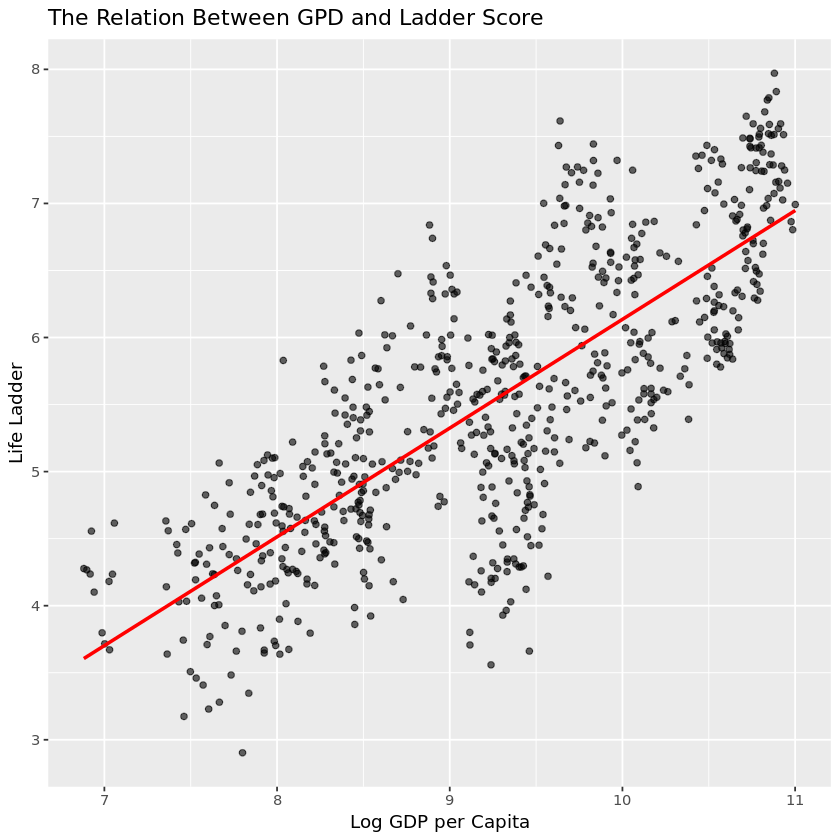

In [35]:
ggplot(df_filled, aes(x = Log.GDP.per.capita, y = Life.Ladder)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "The Relation Between GPD and Ladder Score",
       x = "Log GDP per Capita", y = "Life Ladder")


* It is clearly seen that there is a mostly positive relationship between GDP per capita and the Life Ladder score. The upward-sloping line indicates that, in general, as GDP increases, happiness also tends to increase.

* Furthermore, the steepness of the slope suggests that this relationship is relatively strong — meaning that even moderate increases in GDP are often associated with noticeable improvements in reported well-being.

**Emotional Balance vs Life Ladder** 

`geom_smooth()` using formula = 'y ~ x'


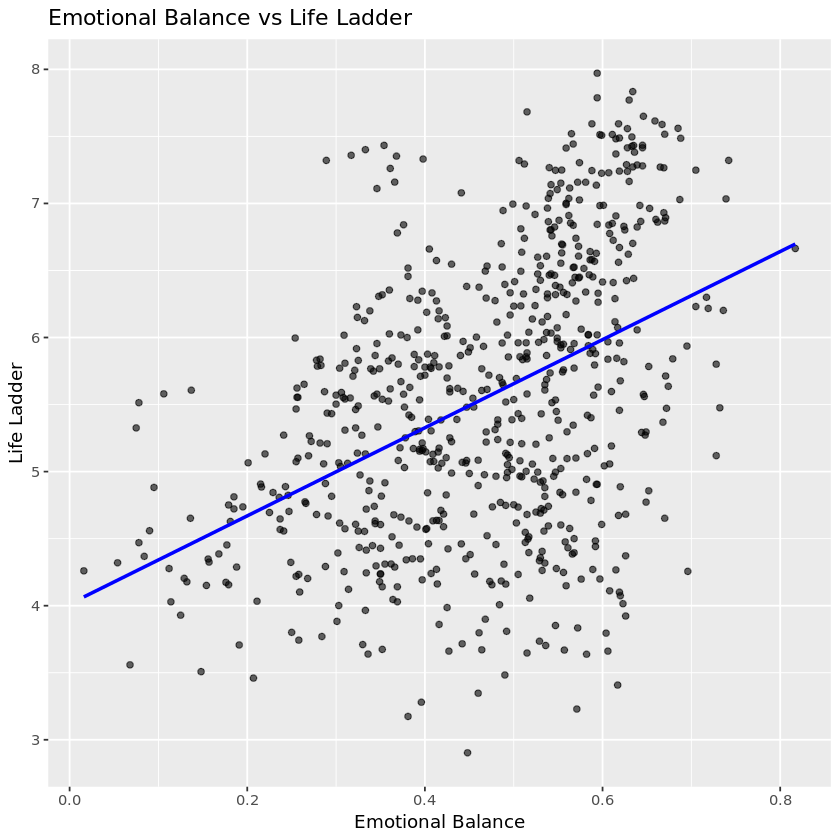

In [36]:
ggplot(df_filled, aes(x = emotional_balance, y = Life.Ladder)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Emotional Balance vs Life Ladder",
       x = "Emotional Balance", y = "Life Ladder")


* There is a strong positive relationship between emotional_balance and the Life Ladder score. Individuals who report experiencing more positive emotions than negative ones tend to have higher overall life satisfaction.  
* This suggests that beyond economic or structural factors, the emotional well-being of individuals plays a significant role in how happy they perceive their lives to be. As emotional_balance increases, Life Ladder scores generally rise as well, highlighting the importance of daily emotional experiences in shaping long-term happiness.

**Support Ratio vs Life Ladder**

`geom_smooth()` using formula = 'y ~ x'


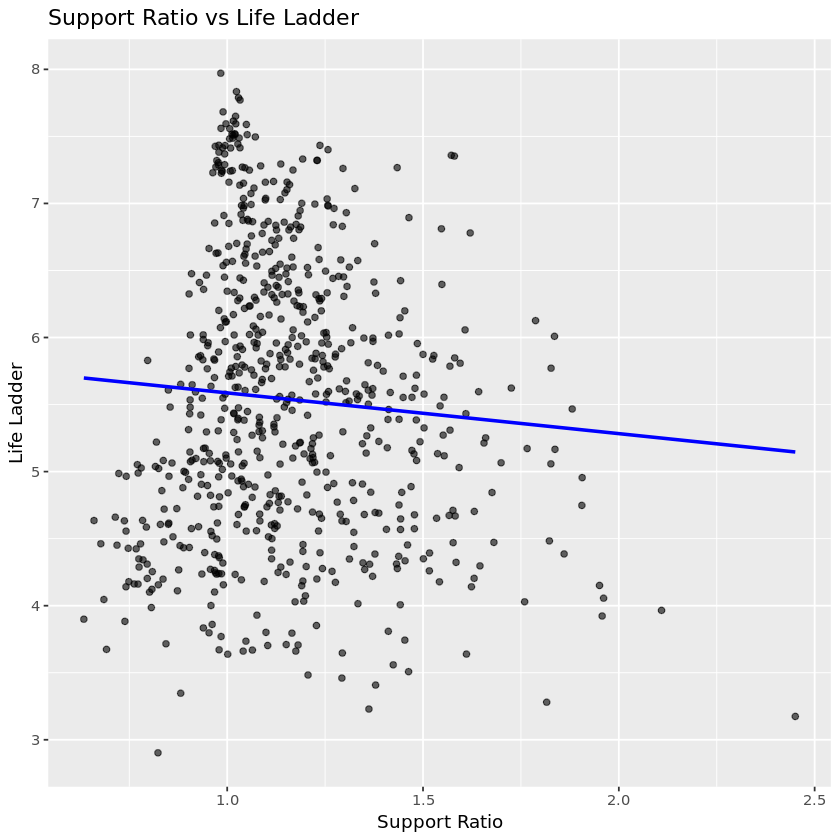

In [37]:
ggplot(df_filled, aes(x = support_ratio, y = Life.Ladder)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Support Ratio vs Life Ladder",
       x = "Support Ratio", y = "Life Ladder")


* There appears to be a sligthly negative relationship between support_ratio and the Life Ladder score. As the support_ratio increases — meaning that perceived social support outweighs individual freedom — the overall happiness level tends to decrease.

* This may indicate that in some countries, higher reliance on social networks does not necessarily translate into greater life satisfaction. Instead, people might value personal autonomy more, and excessive dependence on social structures could reflect limitations in freedom or systemic constraints.

* This finding highlights the complex relationship between social support and individual freedom in shaping happiness.

**Weath_Health vs Life Ladder**

`geom_smooth()` using formula = 'y ~ x'


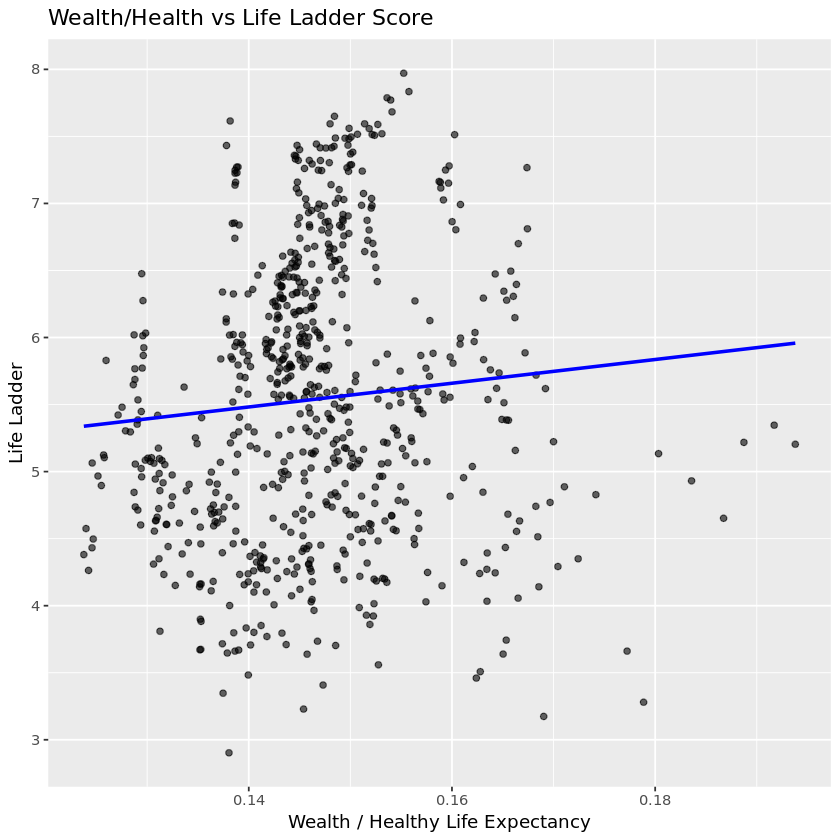

In [38]:
ggplot(df_filled, aes(x = Wealth_Health, y = Life.Ladder)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Wealth/Health vs Life Ladder Score",
       x = "Wealth / Healthy Life Expectancy", y = "Life Ladder")


* A positive relationship is observed between wealth_health and Life Ladder scores, indicating that countries which convert economic wealth into better health outcomes tend to report higher levels of happiness.

* This finding supports the idea that economic resources, when effectively invested in public health, contribute significantly to the population’s overall well-being and life satisfaction.



**All Countries Life Ladder vs Years**

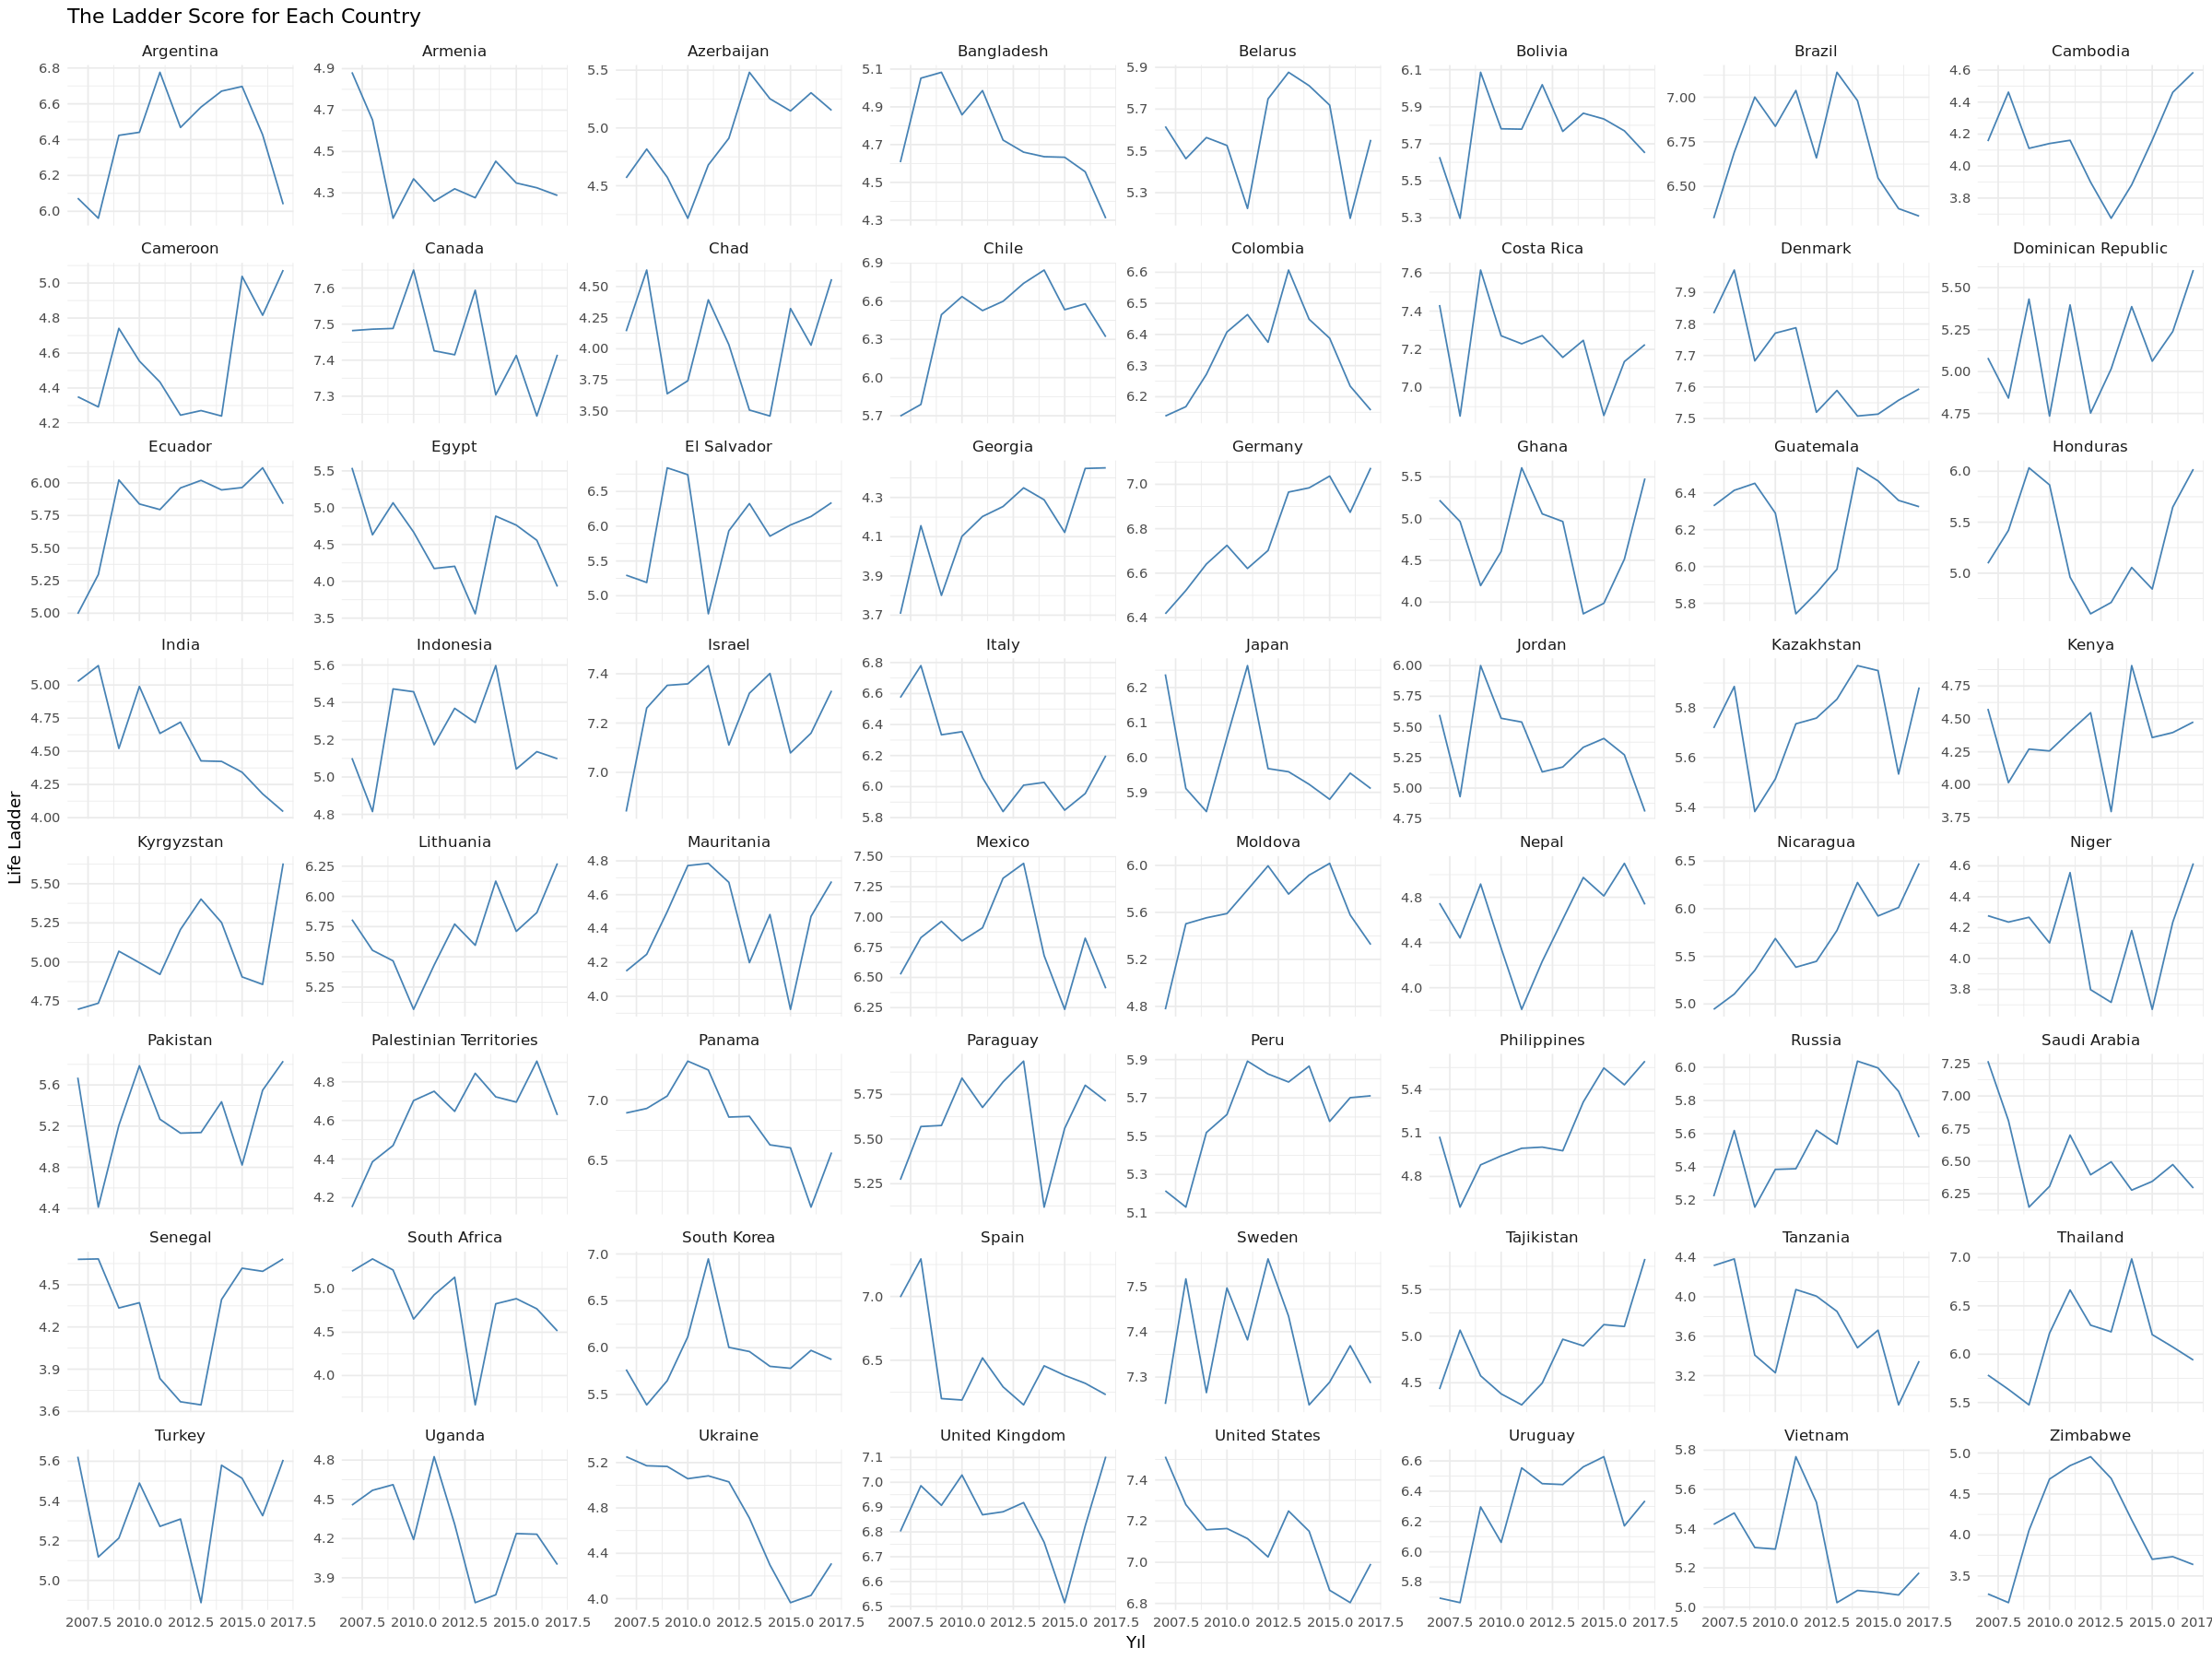

In [39]:

options(repr.plot.width = 20, repr.plot.height = 15)

ggplot(df_filled, aes(x = year, y = Life.Ladder)) +
  geom_line(color = "steelblue") +
  facet_wrap(~ Country.name, scales = "free_y") +
  labs(title = "The Ladder Score for Each Country",
       x = "Yıl", y = "Life Ladder") +
  theme_minimal() +
  theme(strip.text = element_text(size = 10))

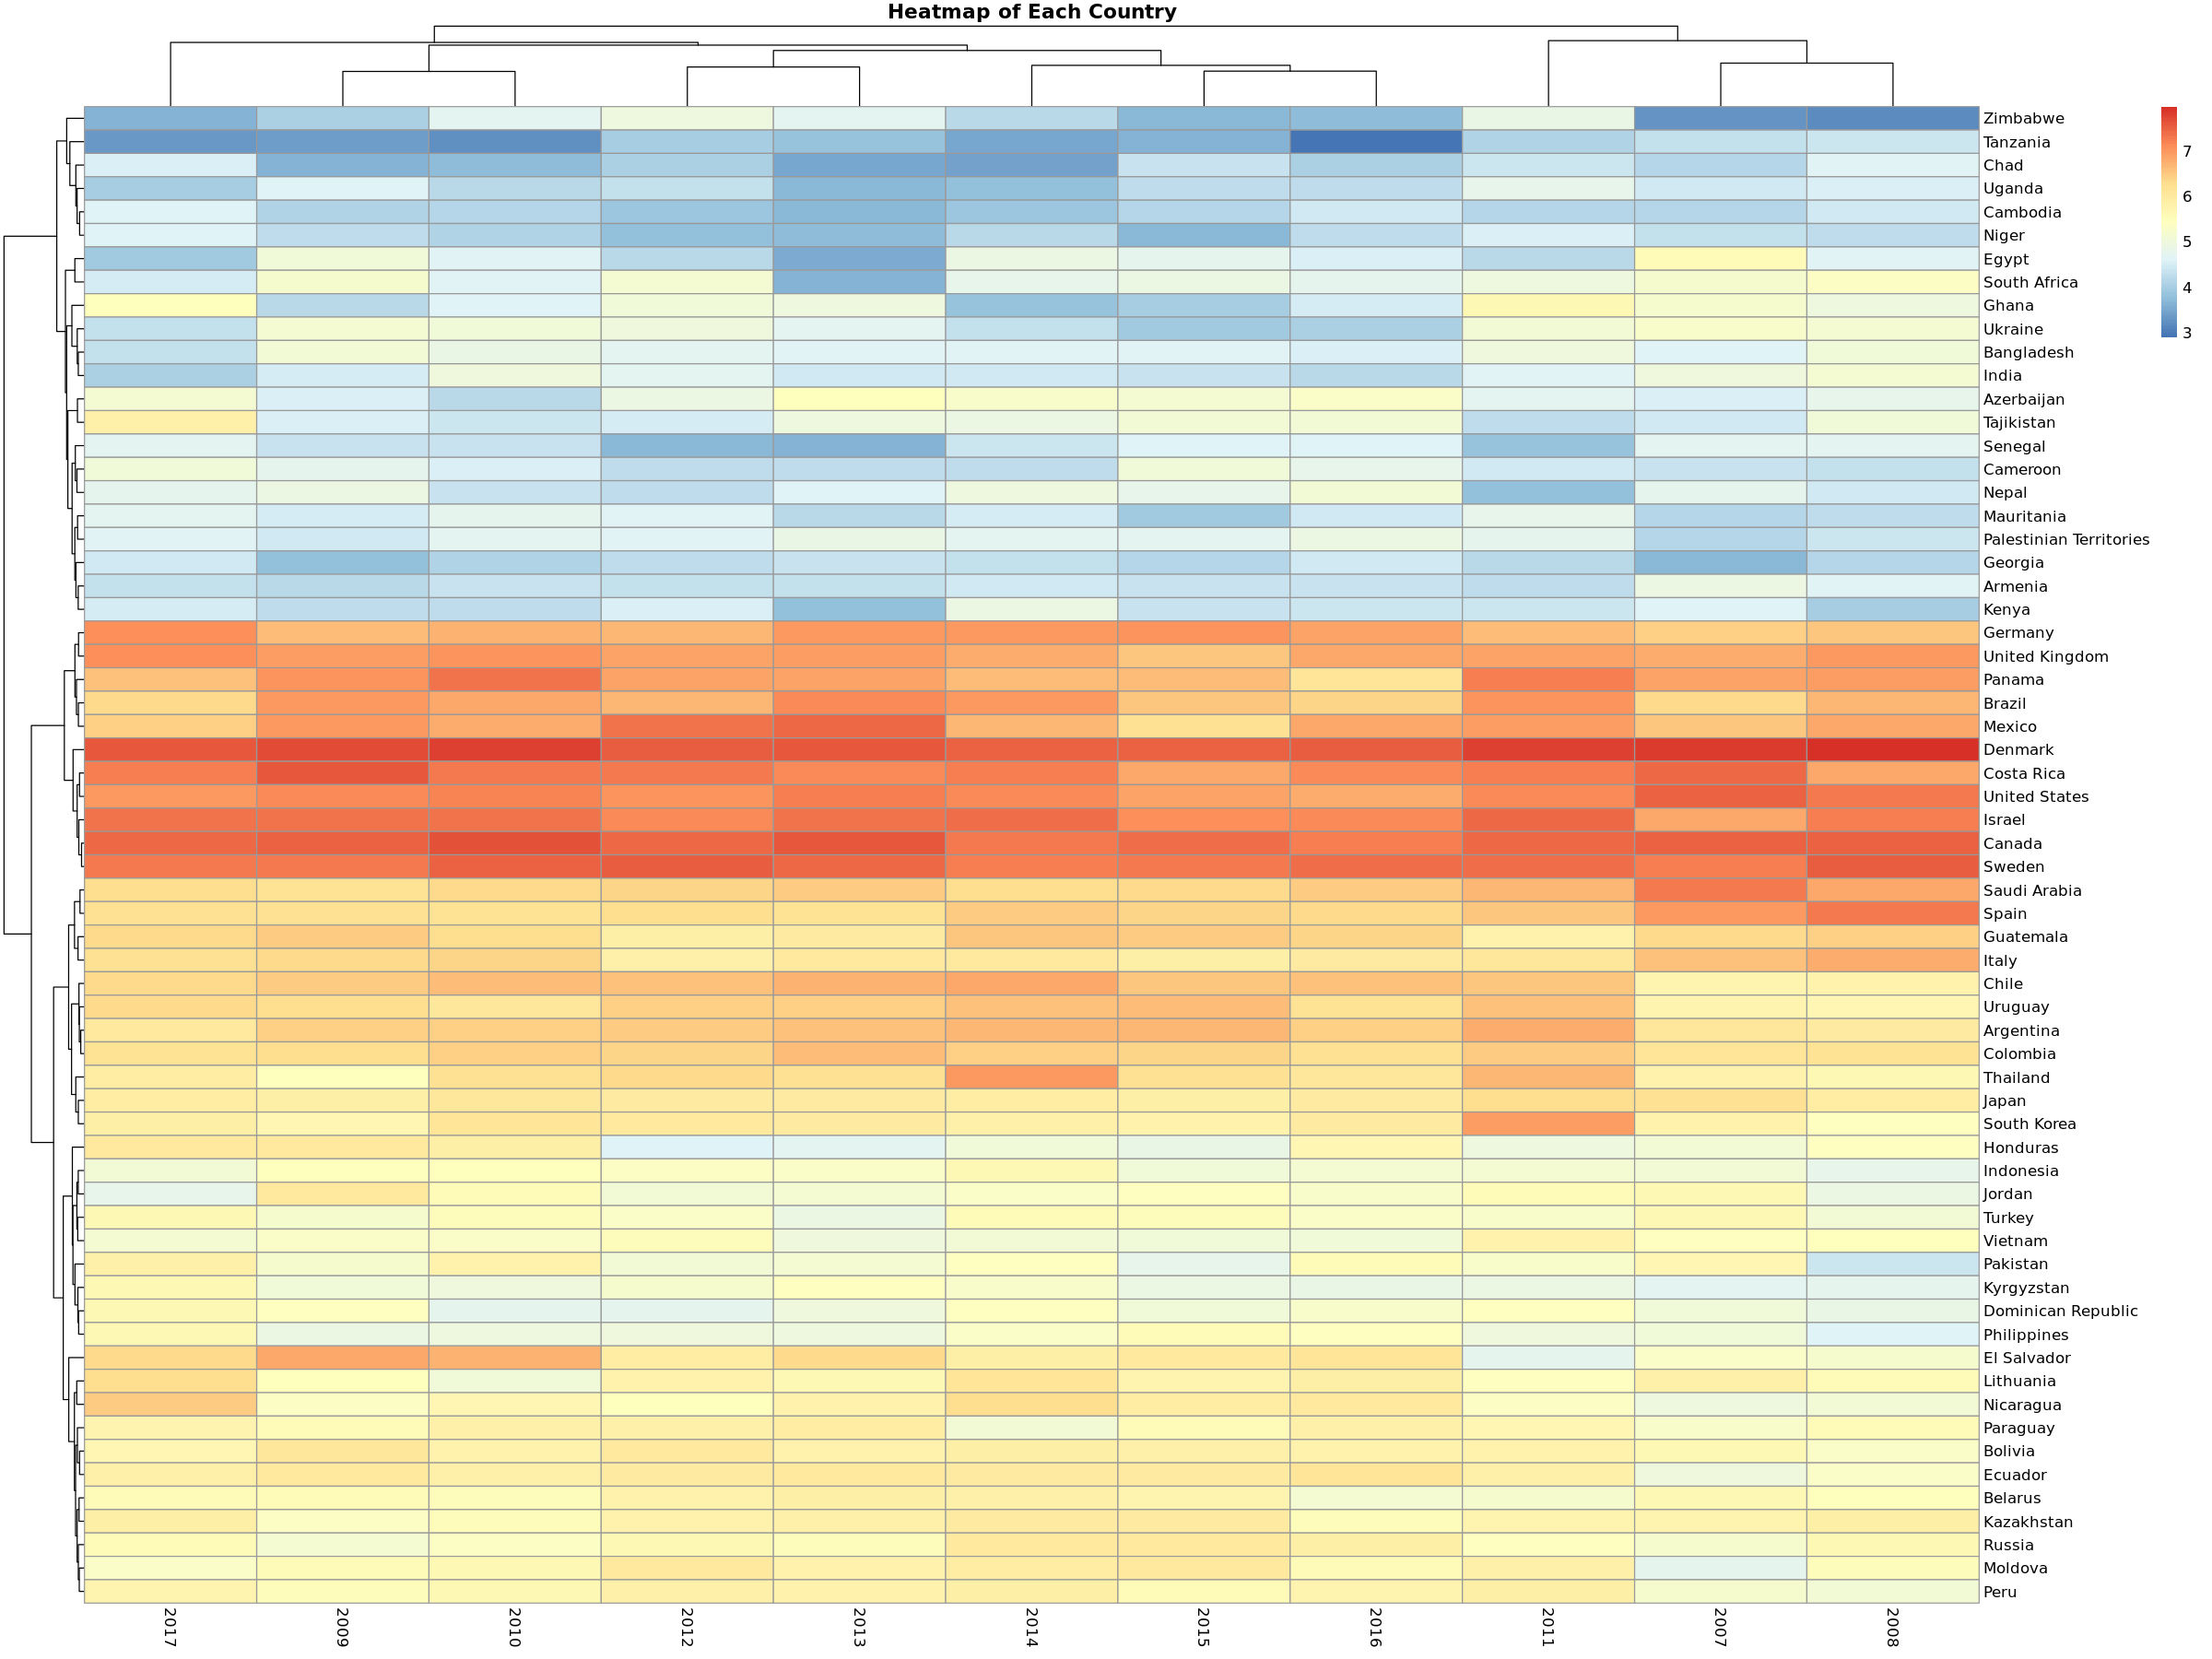

In [40]:

heat_data <- df_filled %>%
  select(Country.name, year, Life.Ladder) %>%
  dcast(Country.name ~ year, value.var = "Life.Ladder")

heat_matrix <- as.matrix(heat_data[,-1])
rownames(heat_matrix) <- heat_data$Country.name

pheatmap(heat_matrix, cluster_rows = TRUE, cluster_cols = TRUE,
         main = "Heatmap of Each Country")


**Countries Sorted by ladder score**

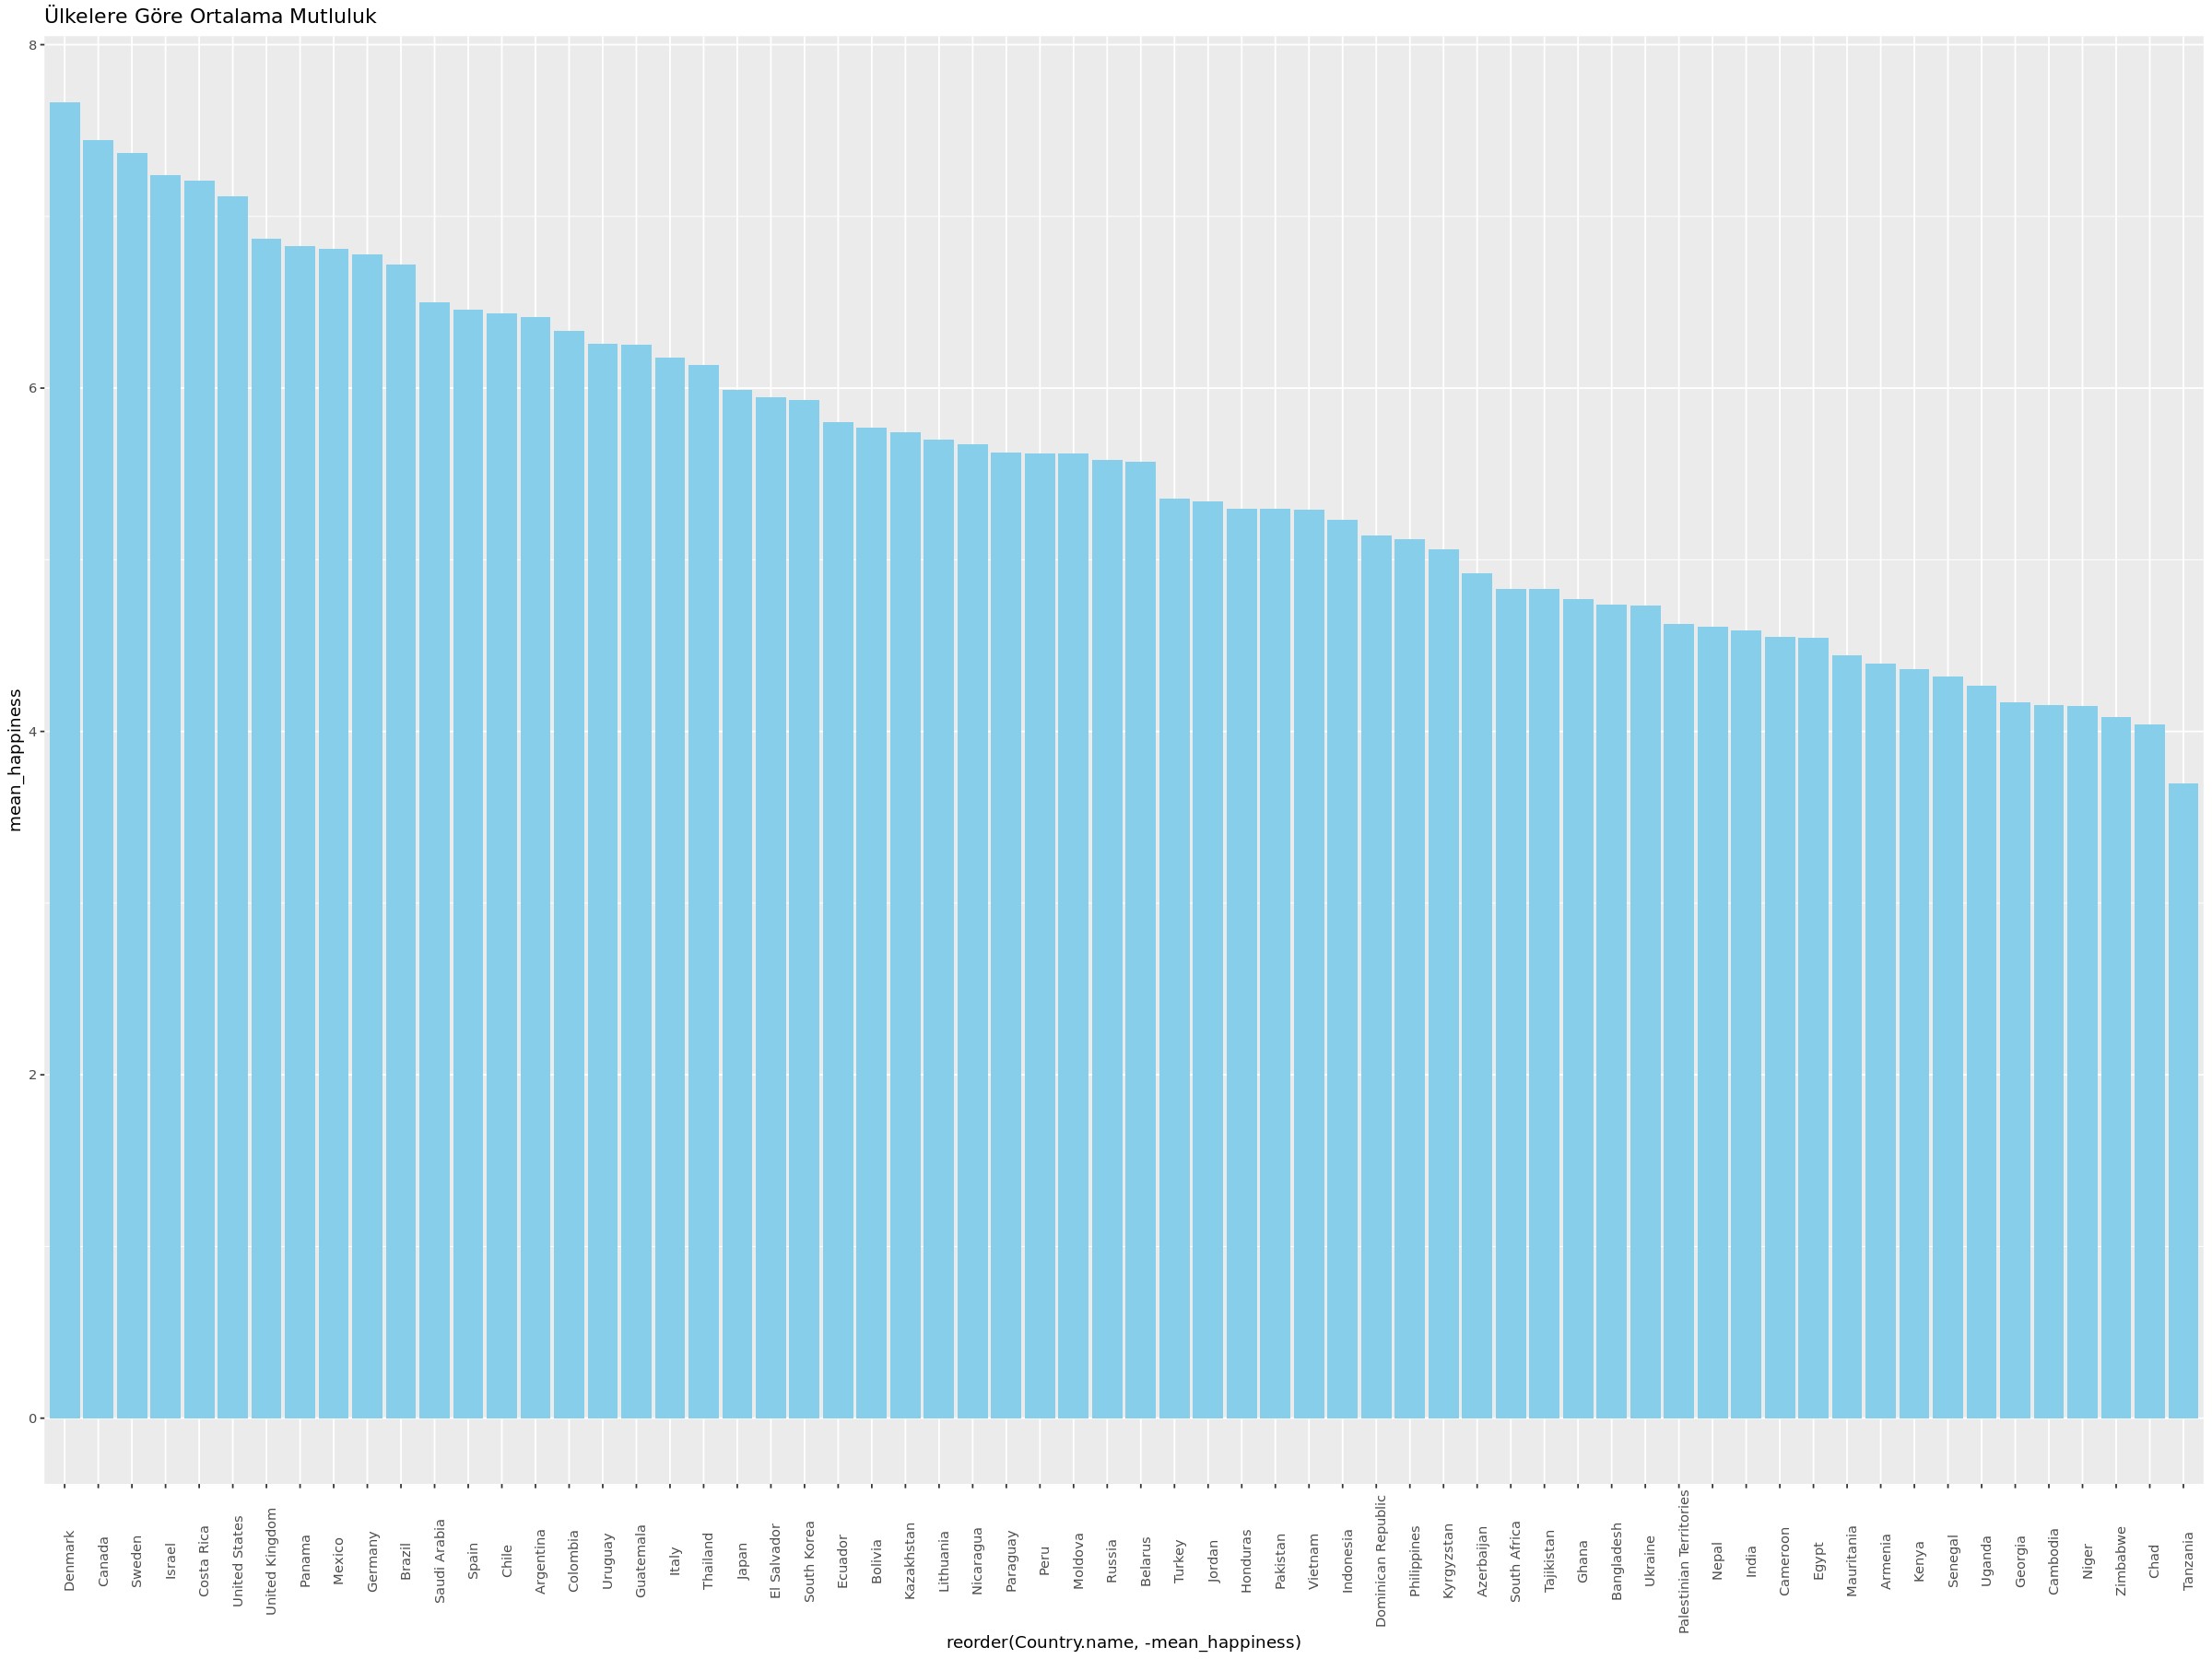

In [41]:
df_filled %>%
  group_by(Country.name) %>%
  summarise(mean_happiness = mean(Life.Ladder, na.rm = TRUE)) %>%
  ggplot(aes(x = reorder(Country.name, -mean_happiness), y = mean_happiness)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title = "Ülkelere Göre Ortalama Mutluluk")


We choose to specific countries to see more clearly.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


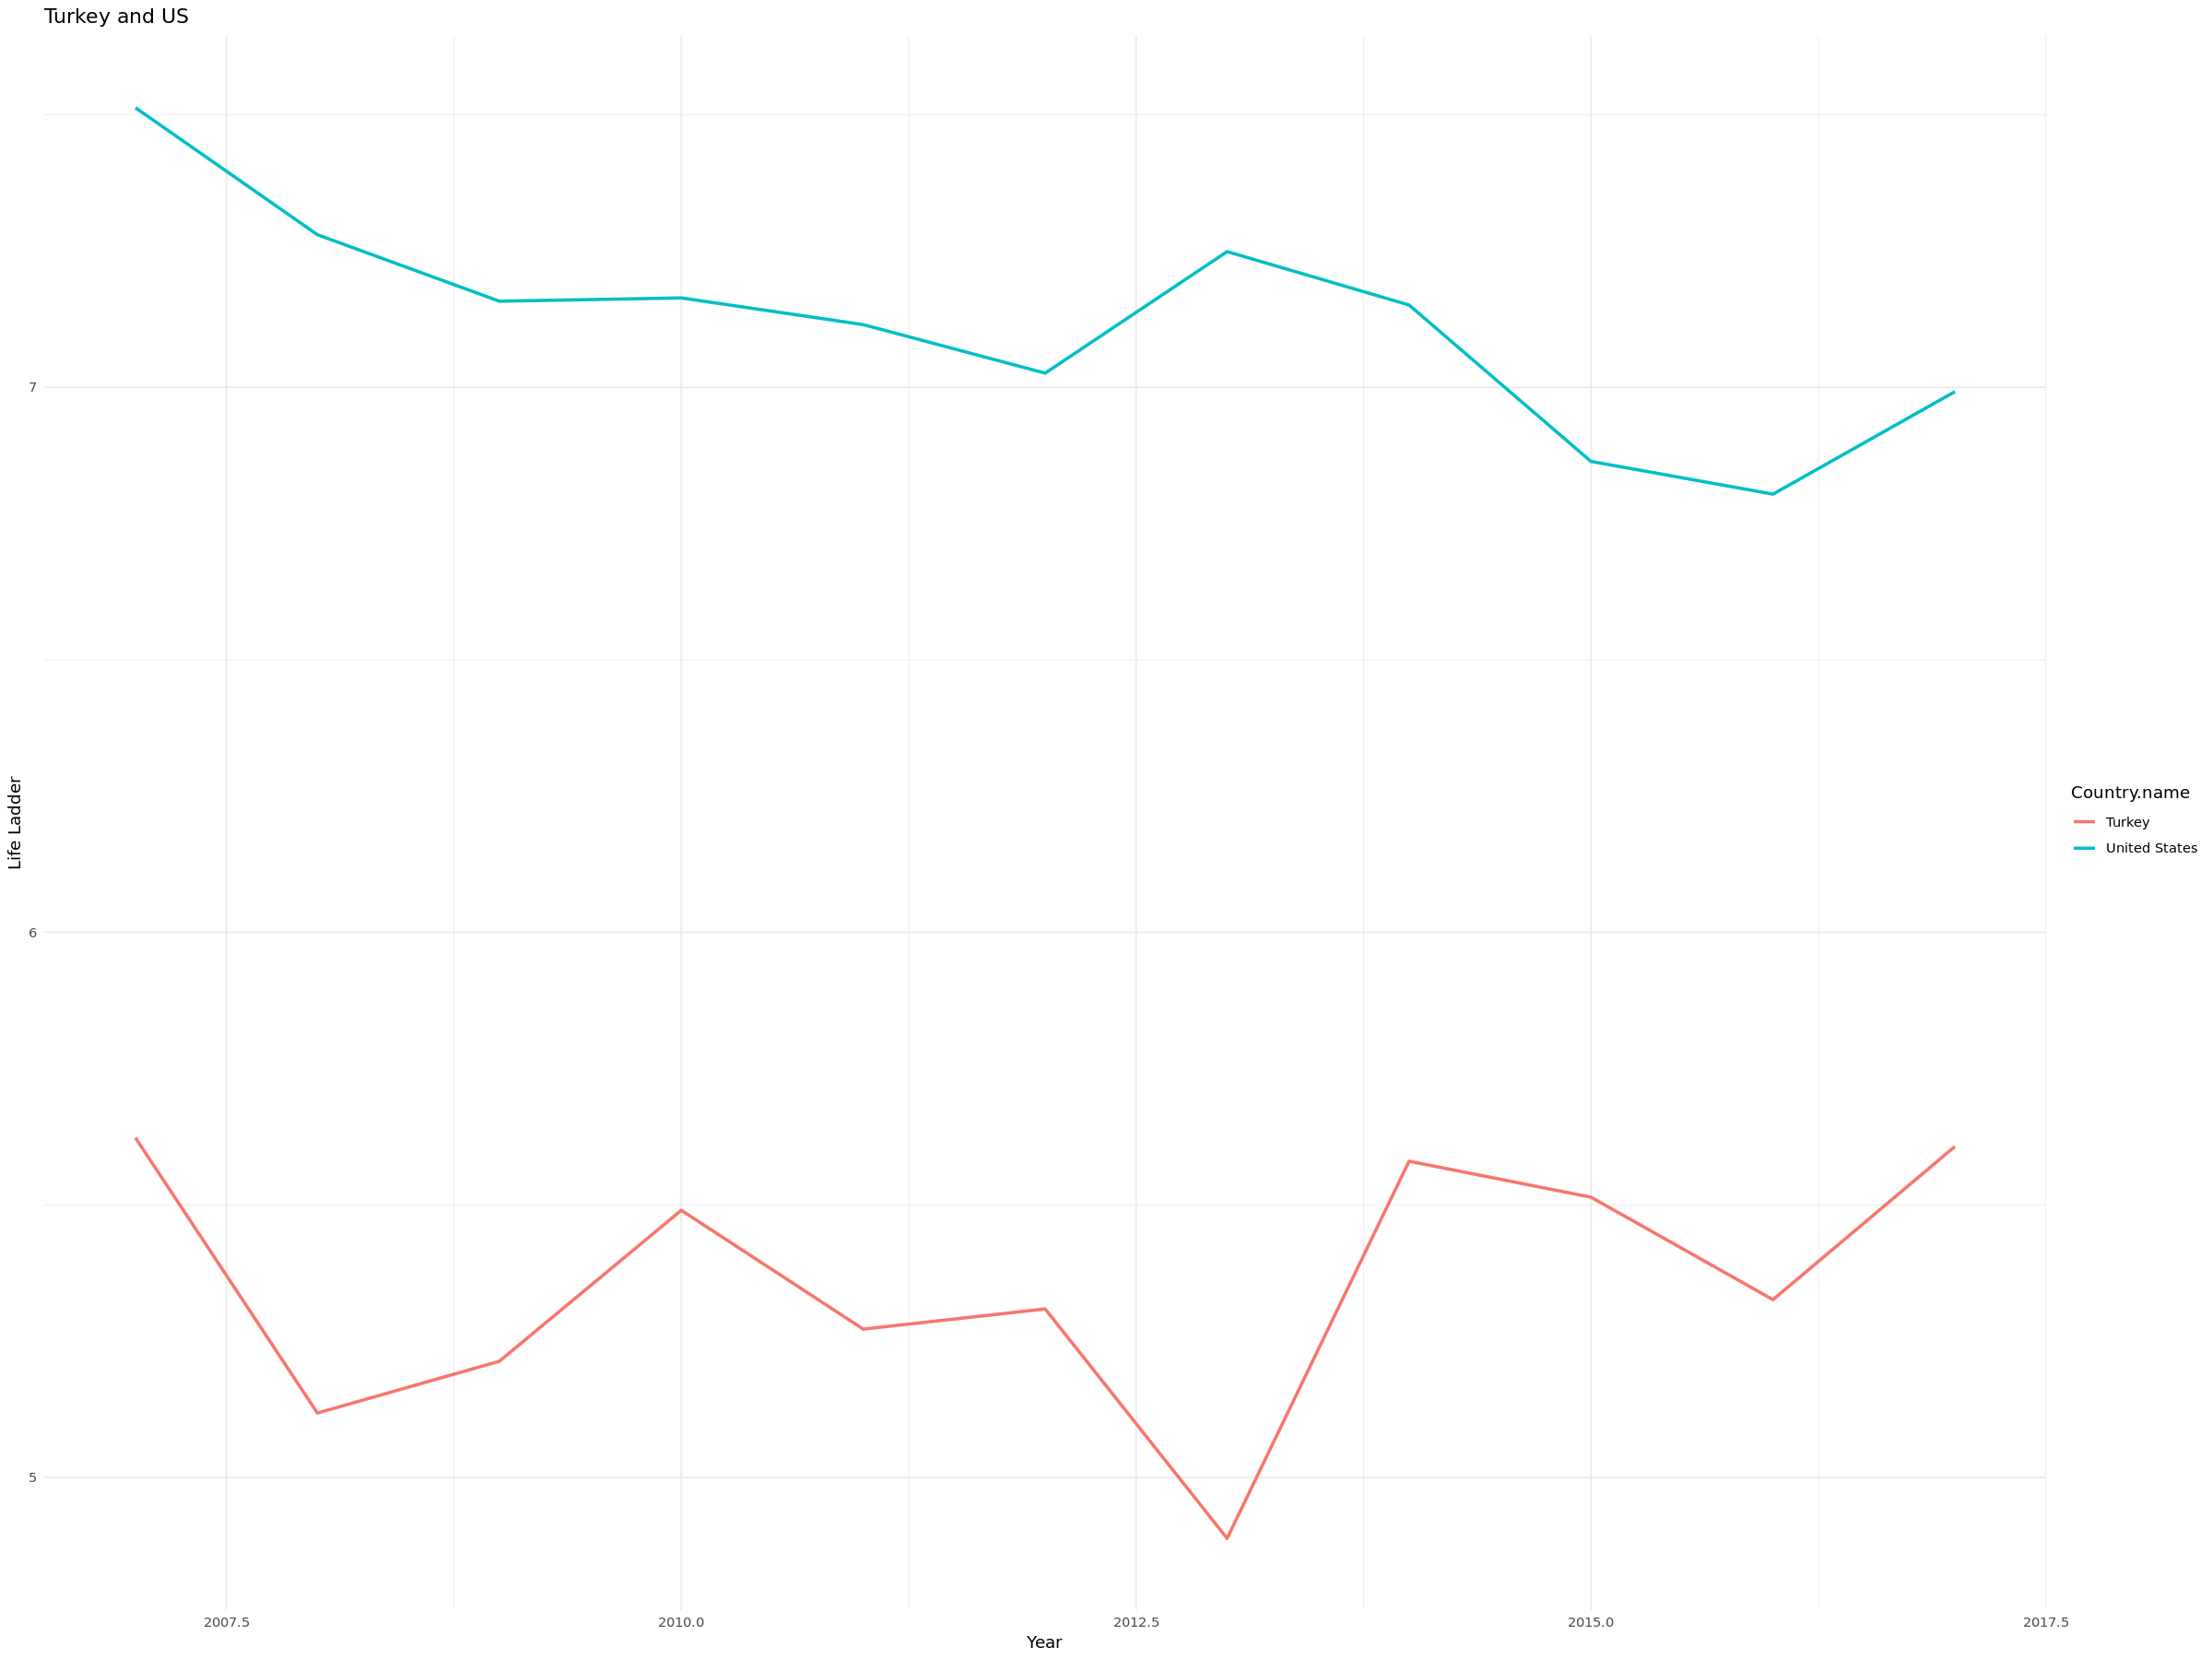

In [42]:
selected <- c("Turkey", "United States")

df_filled %>%
  filter(Country.name %in% selected) %>%
  ggplot(aes(x = year, y = Life.Ladder, color = Country.name)) +
  geom_line(size = 1) +
  labs(title = "Turkey and US", x = "Year", y = "Life Ladder") +
  theme_minimal()


**Bubble Chart**

For a more focused analysis, the year 2016 was selected, and the relationships between Life Ladder, GDP per capita, and Perception of Corruption were examined using a bubble chart.

Upon closer inspection, it becomes evident that even among countries with similar GDP levels, higher levels of perceived corruption are associated with lower Life Ladder scores.

This suggests that economic prosperity alone does not guarantee happiness — perceptions of institutional integrity and trust also play a crucial role in shaping overall life satisfaction.

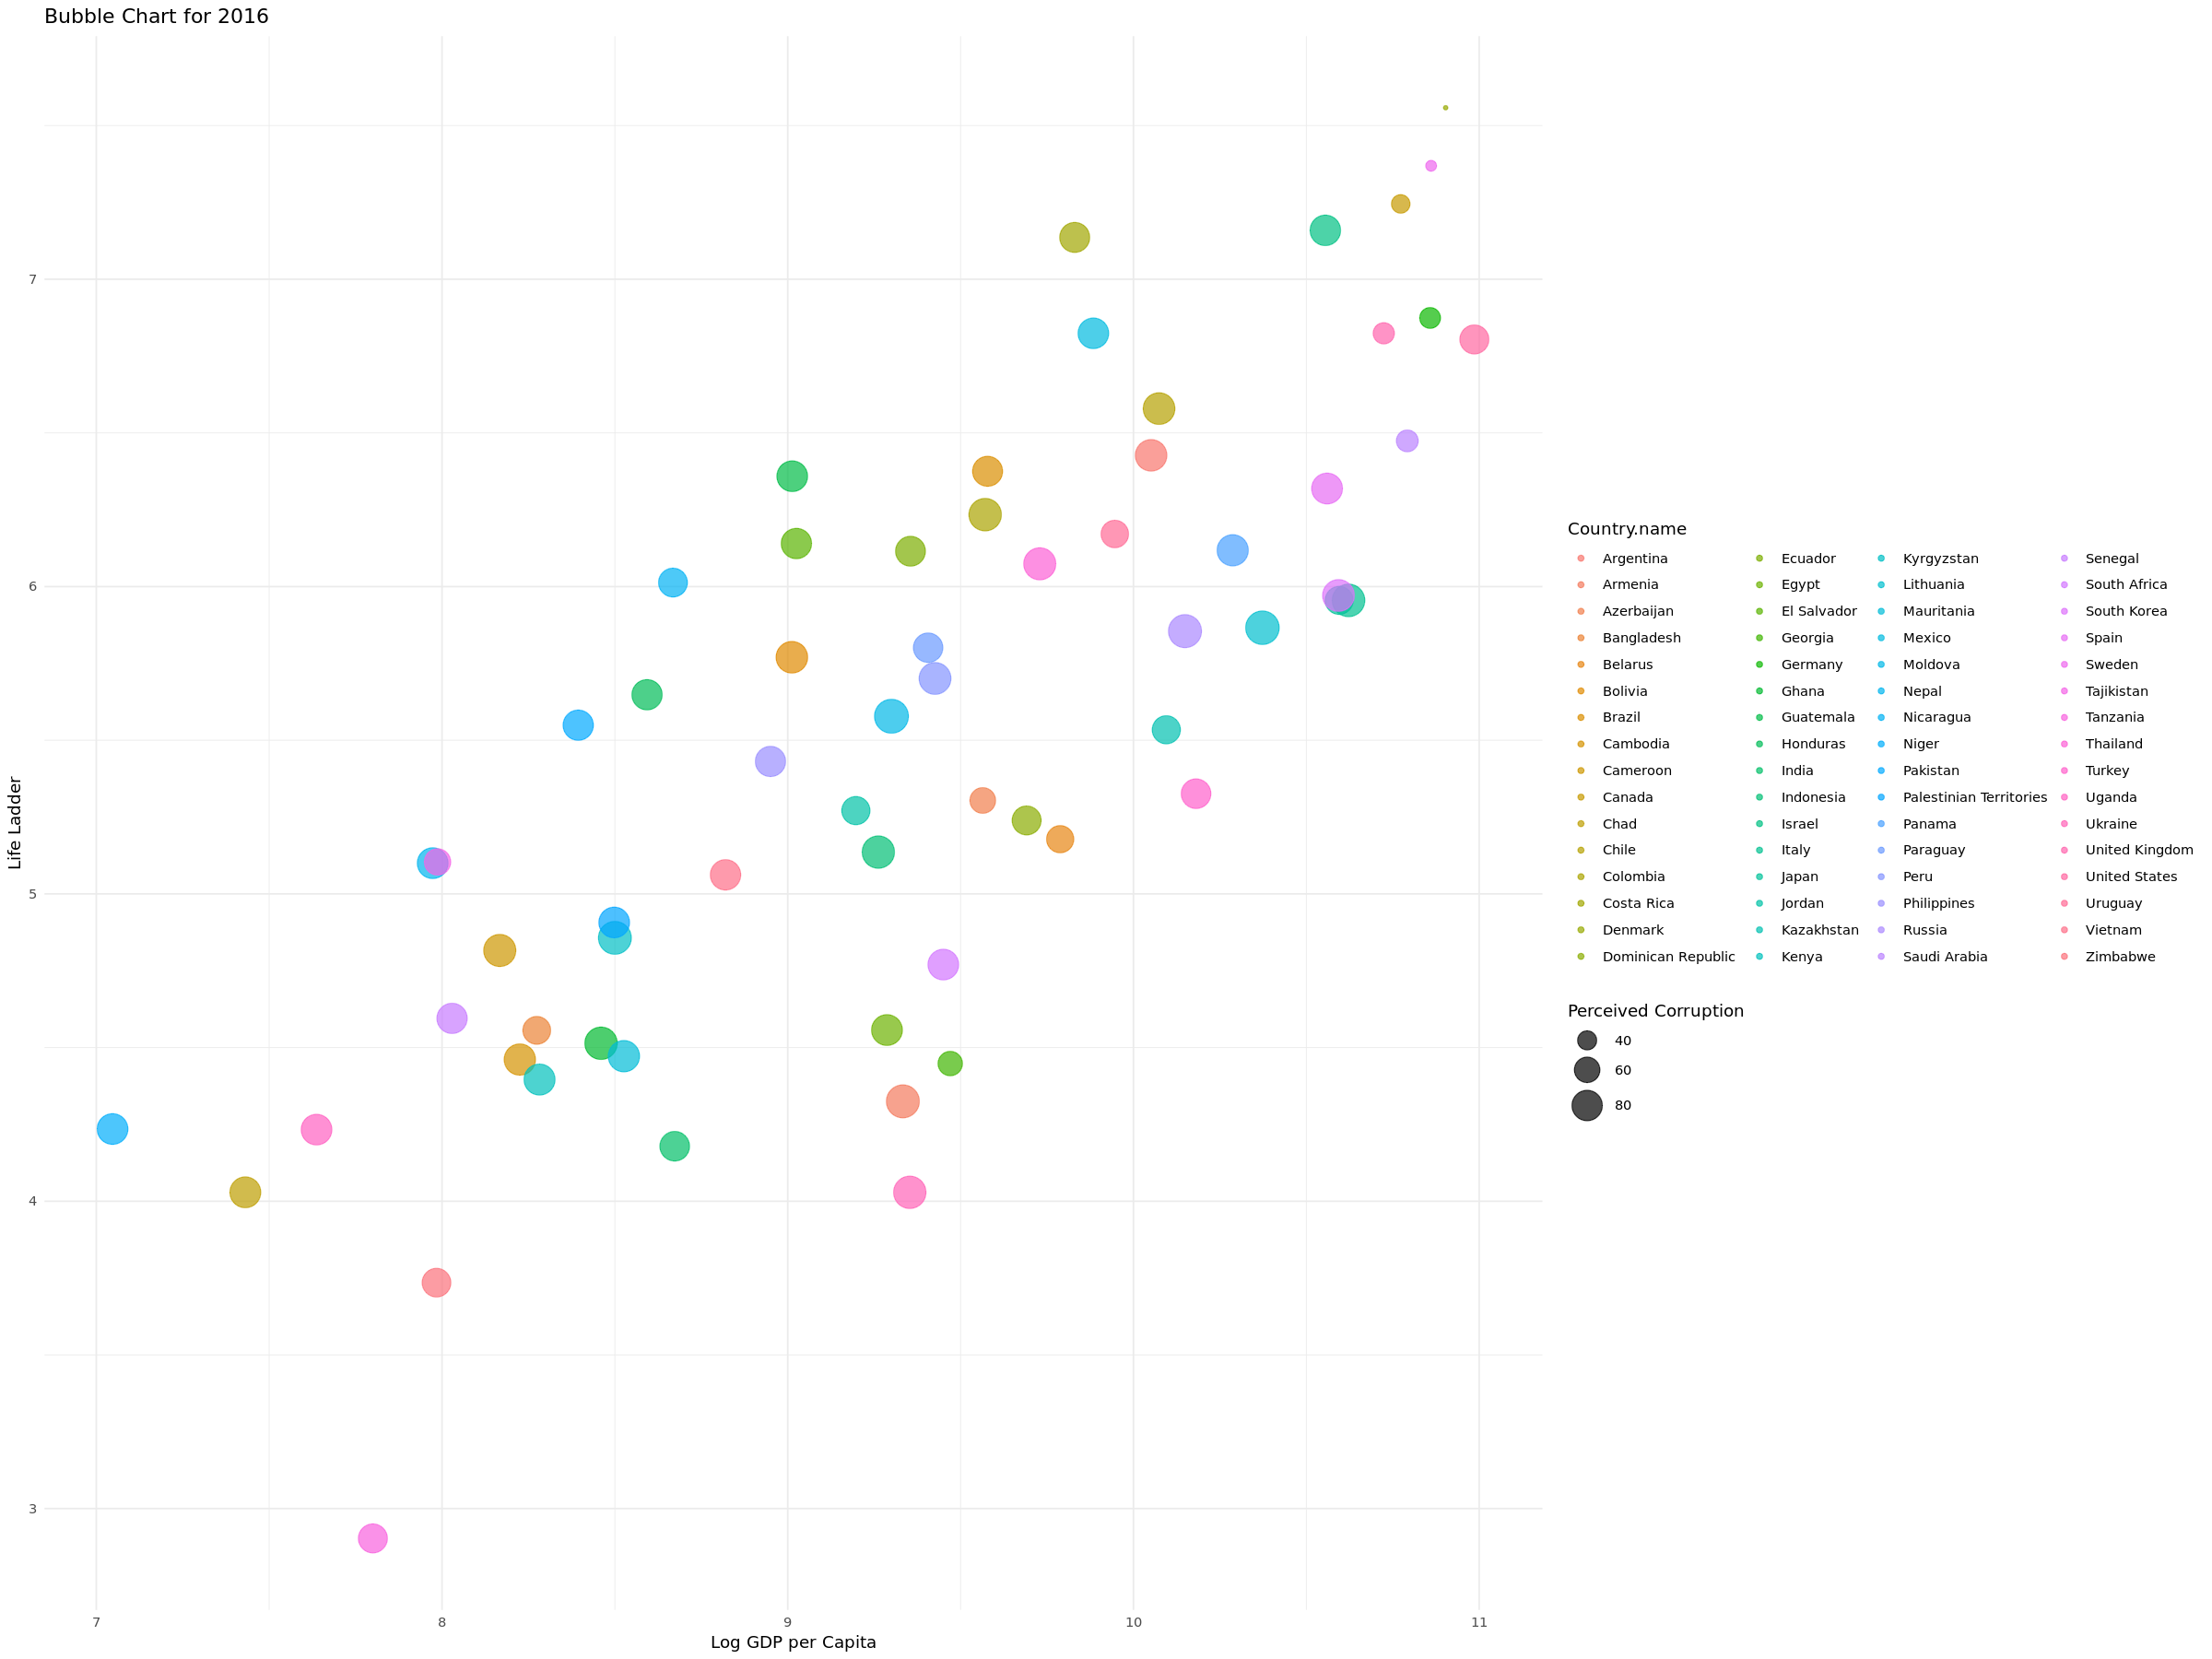

In [43]:
df_2016 <- df_filled %>% 
  filter(year == 2016) %>%
  mutate(Corruption_Scaled = Perceptions.of.corruption * 100)


ggplot(df_2016, aes(x = Log.GDP.per.capita,
                    y = Life.Ladder,
                    size = Corruption_Scaled,
                    color = Country.name)) +
  geom_point(alpha = 0.7) +
  scale_size(range = c(1, 10)) +
  labs(title = "Bubble Chart for 2016",
       x = "Log GDP per Capita",
       y = "Life Ladder",
       size = "Perceived Corruption") +
  theme_minimal()


## Correlation Matrix

In [44]:
df_filled %>% keep(is.numeric) %>% broom::tidy() %>% mutate_if(is.numeric, round, 2) %>%
select(column, n, mean, sd, median, min, max)

Warning message:
“Data frame tidiers are deprecated and will be removed in an upcoming release of broom.”


column                           n   mean    sd   median  min     max    
1  year                             704 2012.00 3.16 2012.00 2007.00 2017.00
2  Life.Ladder                      704    5.54 1.05    5.54    2.90    7.97
3  Log.GDP.per.capita               704    9.27 1.01    9.33    6.88   11.00
4  Social.support                   704    0.82 0.10    0.84    0.37    0.98
5  Healthy.life.expectancy.at.birth 704   63.35 6.59   64.43   42.86   74.90
6  Freedom.to.make.life.choices     704    0.73 0.14    0.75    0.30    0.97
7  Generosity                       704   -0.01 0.16   -0.04   -0.30    0.55
8  Perceptions.of.corruption        704    0.77 0.16    0.81    0.17    0.98
9  Positive.affect                  704    0.73 0.11    0.74    0.43    0.94
10 Negative.affect                  704    0.26 0.07    0.25    0.12    0.54
11 emotional_balance                704    0.46 0.14    0.49    0.02    0.82
12 adj_score                        704    0.60 0.07    0.59    0.37    0.79
13 support_ratio                    704    1.15 0.24    1.11    0.63    2.45
14 Wealth_Health                    704    0.15 0.01    0.15    0.12    0.19
15 delta_happiness                  640    0.01 0.37    0.01   -2.00    1.65

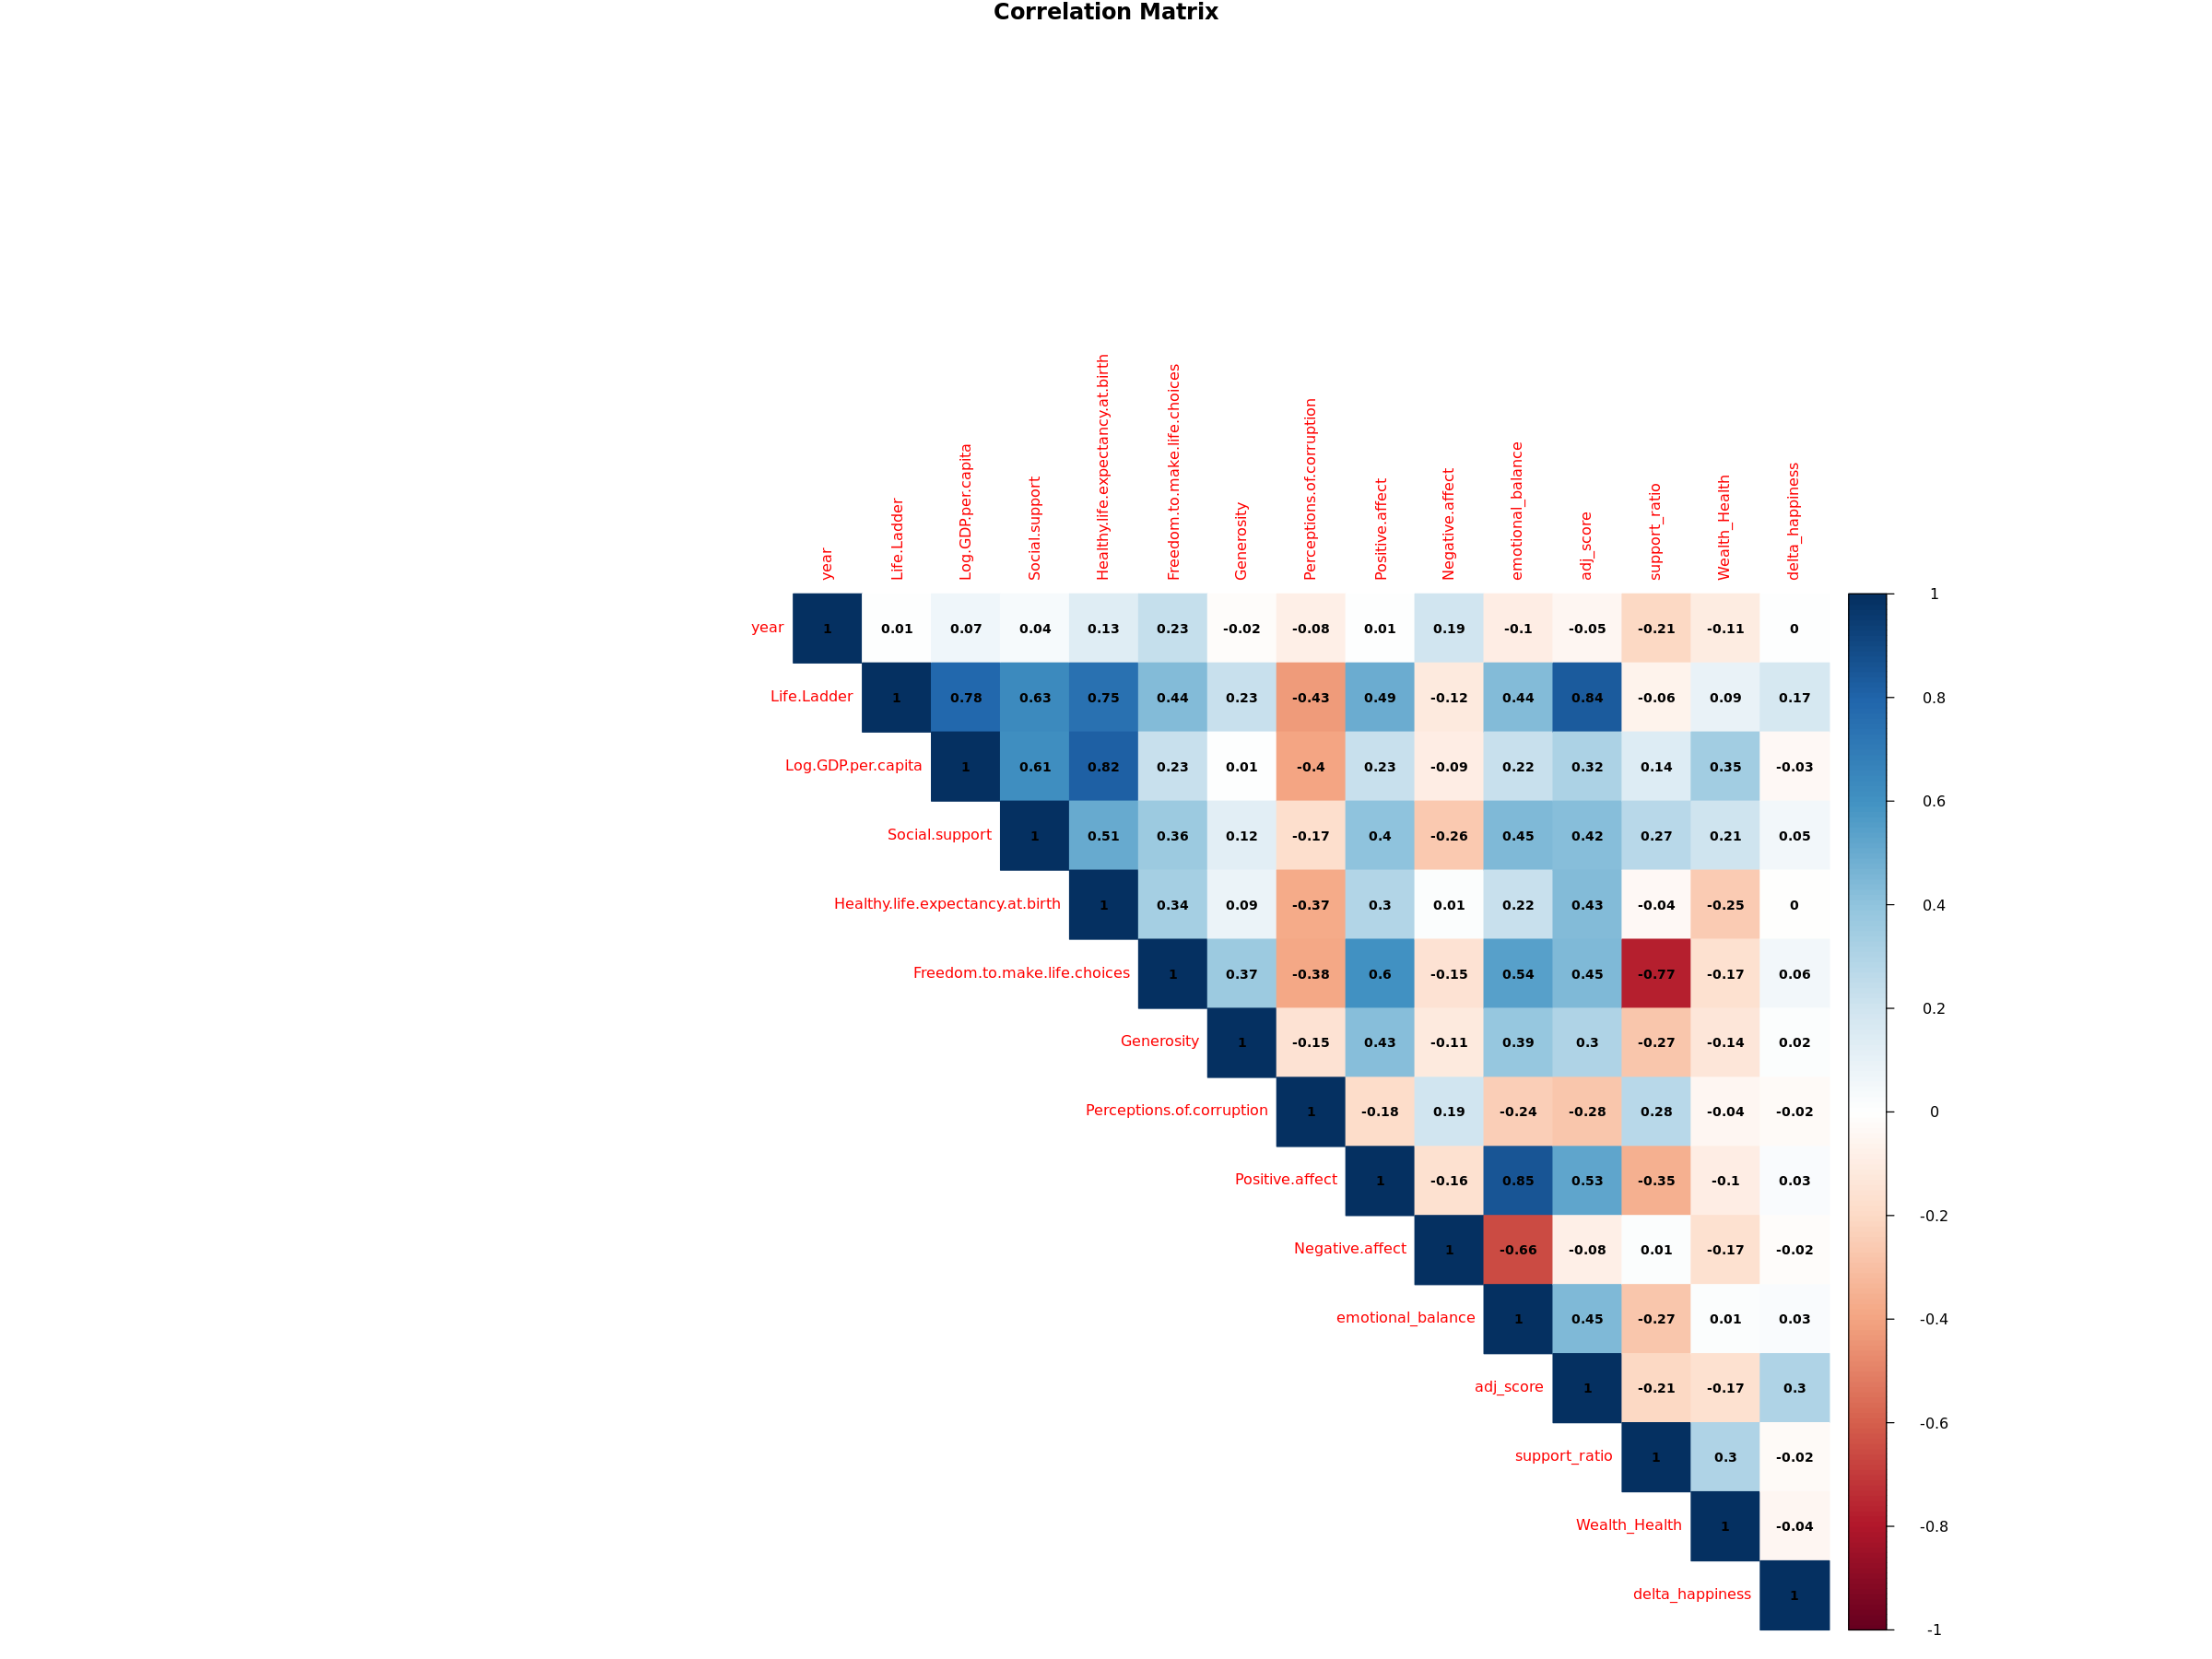

In [45]:
numeric_vars <- df_filled %>%
  filter(!is.na(Life.Ladder)) %>%        
  select(where(is.numeric)) %>%
  drop_na()                             
cor_matrix <- cor(numeric_vars)

corrplot(cor_matrix, method = "color", 
         type = "upper", 
         addCoef.col = "black", 
         tl.cex = 0.8, 
         number.cex = 0.7,
         title = "Correlation Matrix", mar=c(0,0,1,0))



We select the target = Life.Ladder

In [46]:
target_cor <- cor_matrix["Life.Ladder", ]


In [47]:
selected_features <- names(target_cor[abs(target_cor) > 0.4 & names(target_cor) != "Life.Ladder"])
print(selected_features)


[1] "Log.GDP.per.capita"               "Social.support"                  
[3] "Healthy.life.expectancy.at.birth" "Freedom.to.make.life.choices"    
[5] "Perceptions.of.corruption"        "Positive.affect"                 
[7] "emotional_balance"                "adj_score"                       


In [48]:
features <- selected_features[!selected_features %in% c("Life.Ladder")]
df_normalized <- df_filled %>%
  mutate(across(all_of(features), scale))


- Since our data consists of continuous time-based values, the time intervals are important.

- So instead of randomly selecting train and test data from the whole dataset, we split the data by time — for example, we used the first 8 years as training data and the last 3 years as test data.

- This way, the model learns from the past and is tested on future values, which makes more sense for time series data.

In [49]:
train_data <- df_filled %>% 
  filter(year >= 2007 & year <= 2014)

test_data <- df_filled %>% 
  filter(year > 2014)


In [50]:
features <- selected_features[!selected_features %in% c("Life.Ladder")]

# Normalize train set
train_scaled <- train_data
train_scaled[features] <- scale(train_data[features])

scale_params <- attributes(scale(train_data[features]))

#Normalize test set
test_scaled <- test_data
test_scaled[features] <- scale(test_data[features],
                                center = scale_params$`scaled:center`,
                                scale = scale_params$`scaled:scale`)



train_scaled <- train_scaled %>% select(-Country.name) # We exract the country name just in case.
test_scaled <- test_scaled %>% select(-Country.name)


In [51]:
head(train_scaled)

year Life.Ladder Log.GDP.per.capita Social.support
1 2007 6.073       0.7688262          0.4258864     
2 2008 5.961       0.7982062          0.7075393     
3 2009 6.424       0.7286737          0.9610270     
4 2010 6.441       0.8158341          1.0361345     
5 2011 6.776       0.8608833          0.6793741     
6 2012 6.468       0.8403174          0.8014237     
  Healthy.life.expectancy.at.birth Freedom.to.make.life.choices Generosity
1 0.5956859                        -0.4463845                   -0.141    
2 0.6133873                        -0.2664140                   -0.132    
3 0.6310887                        -0.5615656                   -0.130    
4 0.6487902                         0.1079247                   -0.126    
5 0.6753423                         0.7270232                   -0.174    
6 0.7018944                         0.2303046                   -0.148    
  Perceptions.of.corruption Positive.affect Negative.affect emotional_balance
1  0.6736672                0.9536699       0.279           0.5501050        
2  0.5729163                0.9067340       0.318           0.2334258        
3  0.6988549                1.2916084       0.237           1.1114908        
4  0.5099470                1.1226391       0.211           1.1690688        
5 -0.1197460                1.0663160       0.232           0.9747430        
6  0.2706636                1.2258981       0.272           0.8092061        
  adj_score   support_ratio Wealth_Health delta_happiness
1  0.12017237 1.320061      0.1496564         NA         
2 -0.05466933 1.315634      0.1498360     -0.112         
3  0.62854170 1.442700      0.1485115      0.463         
4  0.57450786 1.269863      0.1495691      0.017         
5  0.98228886 1.089461      0.1498518      0.335         
6  0.58922216 1.207497      0.1491428     -0.308

# Model Training

In [52]:

model <- lm(Life.Ladder ~ ., data = train_scaled)

predictions <- predict(model, newdata = test_scaled)
actuals <- test_scaled$Life.Ladder



Warning message in predict.lm(model, newdata = test_scaled):
“prediction from a rank-deficient fit may be misleading”


In [53]:
# Some model perfomance tests
mse <- mean((actuals - predictions)^2)
rmse <- sqrt(mse)
r_squared <- 1 - sum((actuals - predictions)^2) / sum((actuals - mean(actuals))^2)

cat("RMSE:", rmse, "\n")
cat("R²:", r_squared, "\n")


RMSE: 0.05647972 
R²: 0.9968412 


**Linear Regression Graphs**

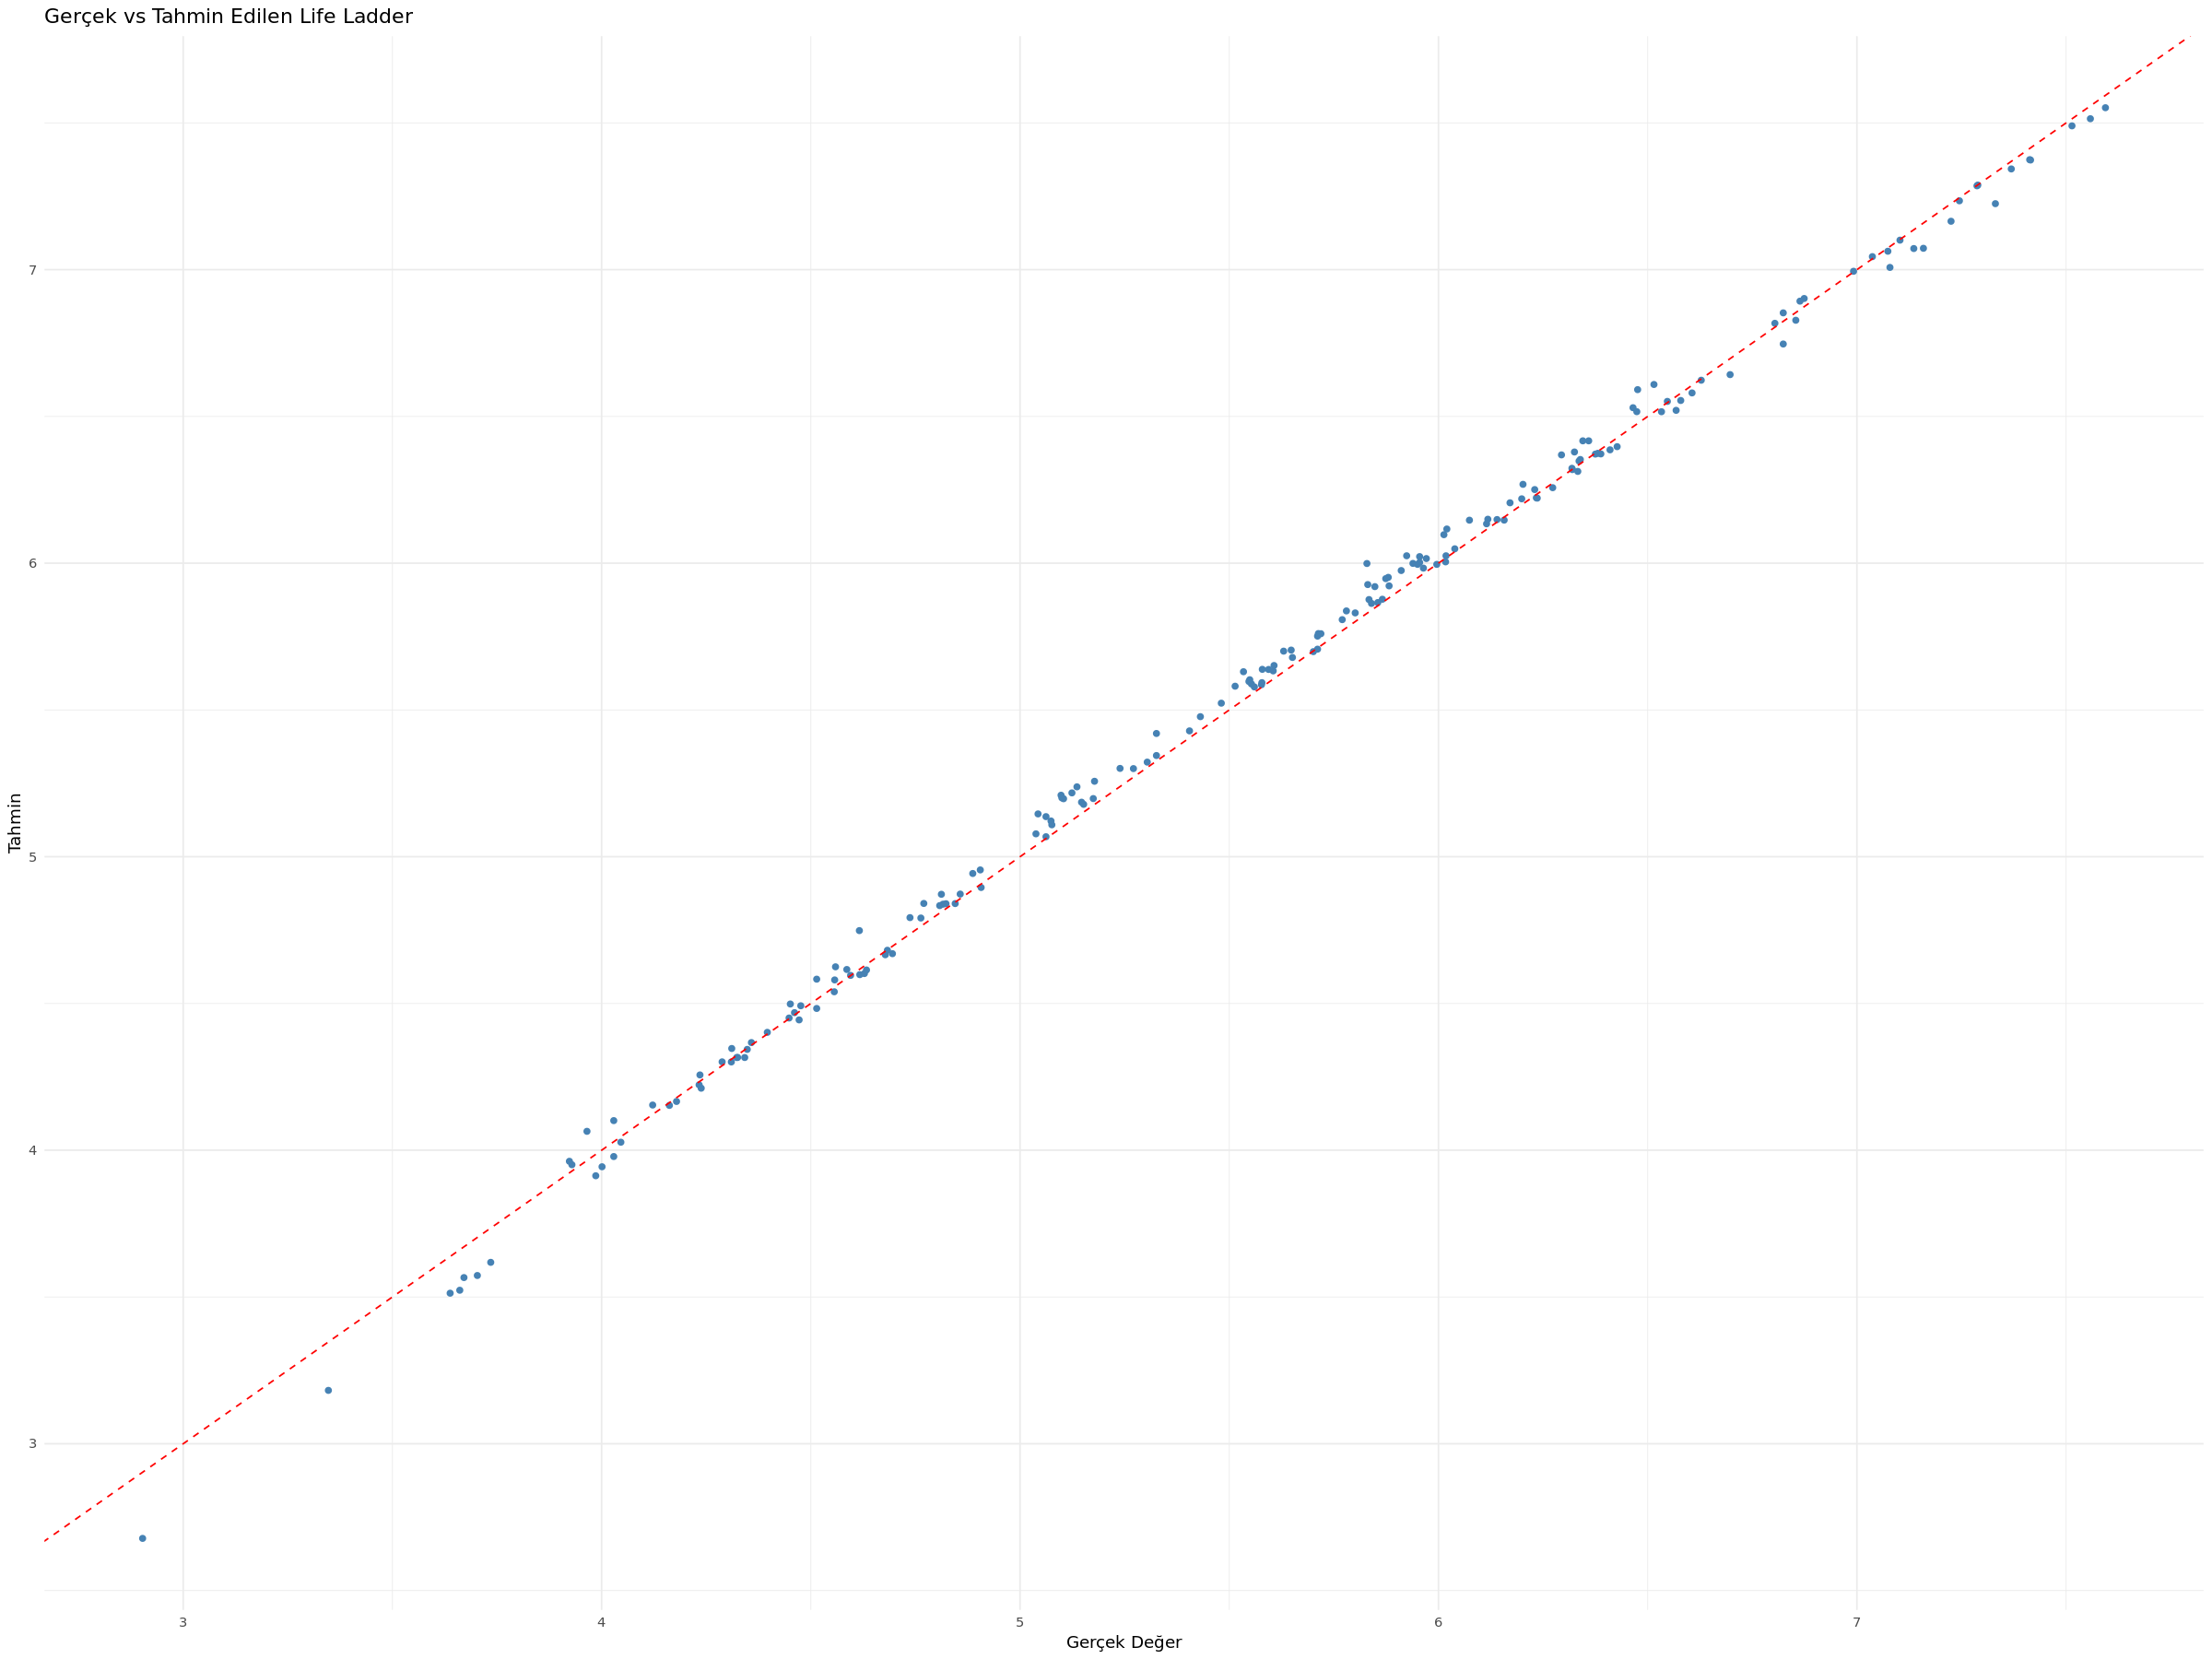

In [54]:

results <- data.frame(Actual = actuals, Predicted = predictions)

ggplot(results, aes(x = Actual, y = Predicted)) +
  geom_point(color = "steelblue") +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Gerçek vs Tahmin Edilen Life Ladder", x = "Gerçek Değer", y = "Tahmin") +
  theme_minimal()


## Overfitting Tests

As our model demonstrated high accuracy on the training data, we examined its performance on the test data to determine whether it suffers from overfitting.
* Firstly, we look for residuals graph which gives us if the residuals are close the zero, the model predicts very well. At the graph we see that the residuals mostly fluctuate close to zero, which is good.
* Secondly, we compare test and train R^2 and RMSE. If they are equal to each other it is a good sign.

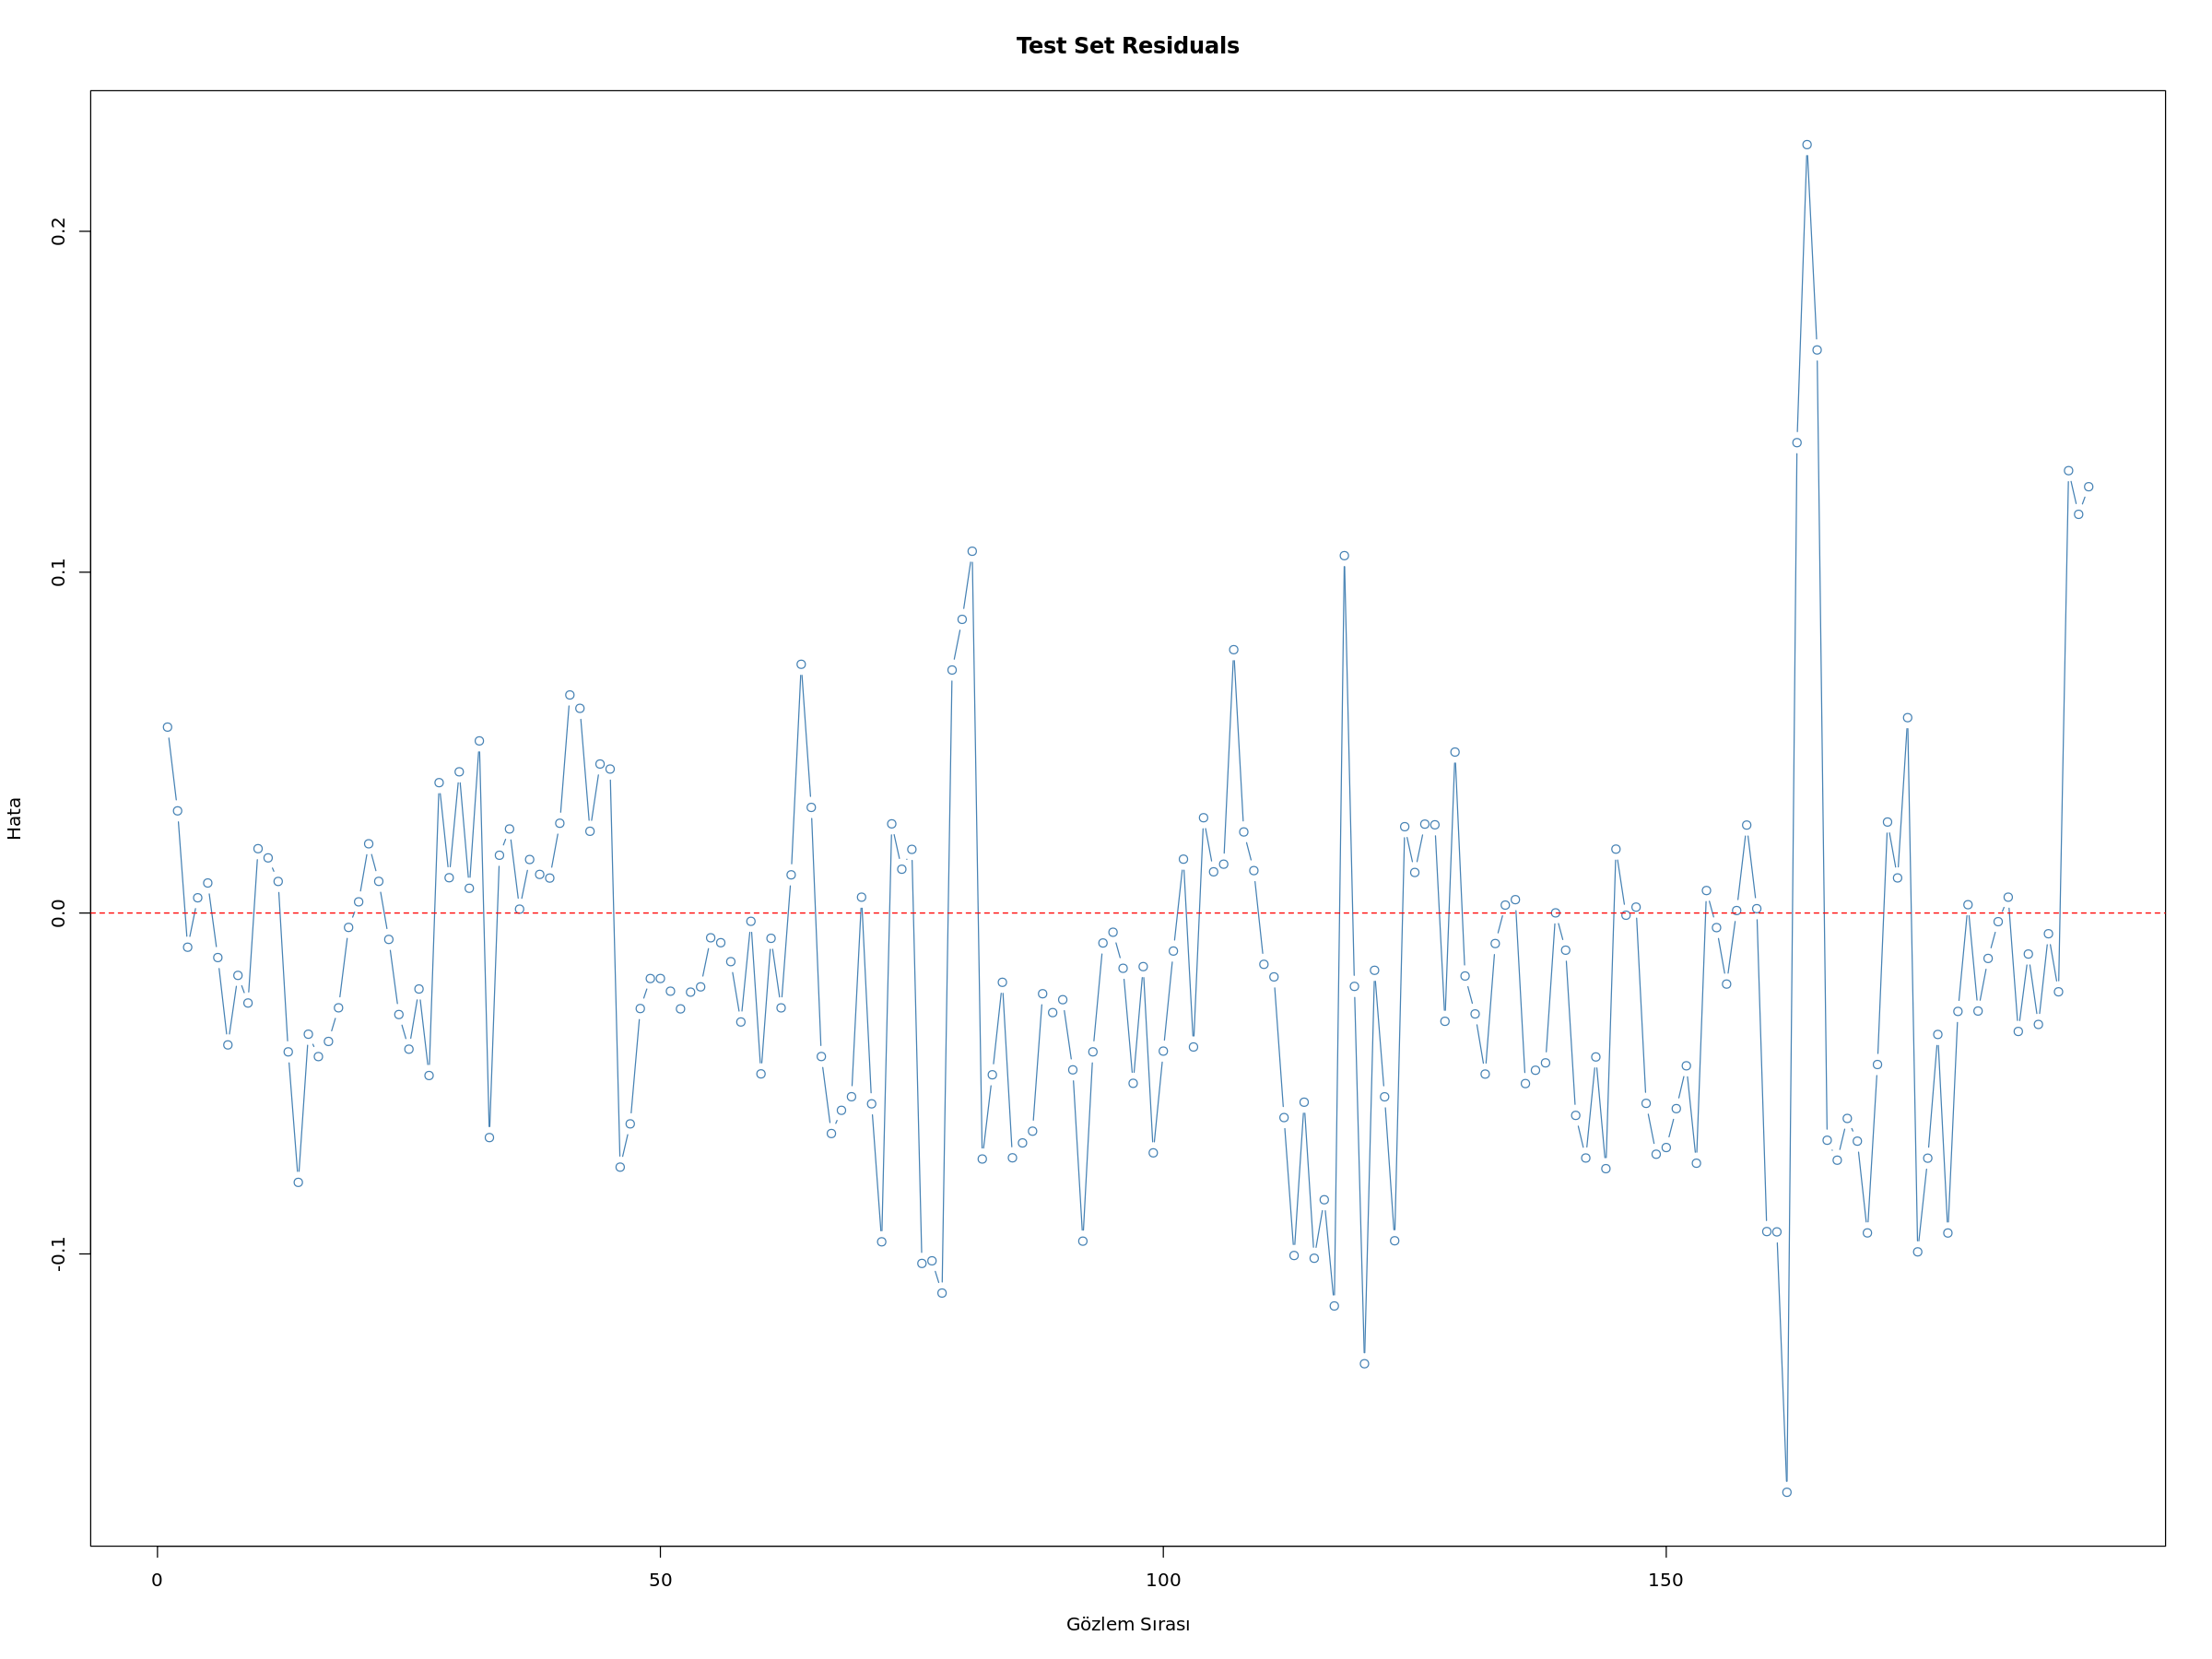

In [55]:
residuals <- actuals - predictions

plot(residuals, type = "b", col = "steelblue", 
     main = "Test Set Residuals", ylab = "Hata", xlab = "Gözlem Sırası")
abline(h = 0, col = "red", lty = 2)


In [56]:
predictions <- predict(model, newdata = test_scaled)
actuals <- test_scaled$Life.Ladder

test_rmse <- sqrt(mean((actuals - predictions)^2))
test_r2 <- 1 - sum((actuals - predictions)^2) / sum((actuals - mean(actuals))^2)

cat("Test RMSE:", test_rmse, "\n")
cat("Test R²:", test_r2, "\n")


Warning message in predict.lm(model, newdata = test_scaled):
“prediction from a rank-deficient fit may be misleading”


Test RMSE: 0.05647972 
Test R²: 0.9968412 


In [57]:
summary(model)



Call:
lm(formula = Life.Ladder ~ ., data = train_scaled)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18923 -0.03493 -0.00498  0.03259  0.21251 

Coefficients: (1 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.218138   2.822566   0.786 0.432379    
year                              0.001537   0.001385   1.110 0.267807    
Log.GDP.per.capita                0.606956   0.041350  14.679  < 2e-16 ***
Social.support                   -0.015990   0.009068  -1.763 0.078546 .  
Healthy.life.expectancy.at.birth -0.010994   0.041633  -0.264 0.791850    
Freedom.to.make.life.choices      0.043132   0.012936   3.334 0.000929 ***
Generosity                        0.138565   0.019760   7.012 9.03e-12 ***
Perceptions.of.corruption        -0.018332   0.003266  -5.613 3.56e-08 ***
Positive.affect                   0.004728   0.003906   1.211 0.226719    
Negative.affect                 

Several variables are statistically significant predictors of happiness:

* Log GDP per capita, Generosity, Freedom to make life choices, Perceptions of corruption, adj_score, support_ratio, and delta_happiness all have low p-values (p < 0.05), suggesting a strong relationship with the Life Ladder score.


The residuals are small and symmetrically distributed (Min: -0.19, Max: 0.21), and the residual standard error is low (0.056), which confirms that the model performs very accurately on the training set

# Random Forest Model


In [58]:
train_data2 <- df_filled %>% filter(year >= 2007 & year <= 2014)

In [59]:
test_data2 <- df_filled %>% 
  filter(year > 2014)

In [60]:
train_scaled2 <- train_data2
train_scaled2[features] <- scale(train_data2[features])
scale_params2 <- attributes(scale(train_data2[features]))

test_scaled2 <- test_data2
test_scaled2[features] <- scale(test_data2[features],
                                center = scale_params2$`scaled:center`,
                                scale = scale_params2$`scaled:scale`)


In [61]:
train_scaled2 <- train_scaled2 %>% select(-Country.name)
test_scaled2 <- test_scaled2 %>% select(-Country.name)

In [62]:
train_scaled2 <- na.omit(train_scaled2)
test_scaled2 <- na.omit(test_scaled2)

set.seed(42)
rf_model2 <- randomForest(Life.Ladder ~ ., data = train_scaled2, importance = TRUE)

predictions2 <- predict(rf_model2, newdata = test_scaled2)
actuals <- test_scaled2$Life.Ladder

mae <- mean(abs(predictions2 - actuals))
rmse <- sqrt(mean((predictions2 - actuals)^2))
r2 <- cor(predictions2, actuals)^2

cat("MAE:", round(mae, 3), "\n")
cat("RMSE:", round(rmse, 3), "\n")
cat("R-squared:", round(r2, 3), "\n")


MAE: 0.129 
RMSE: 0.189 
R-squared: 0.973 


These performance metrics indicate that the Random Forest model is highly accurate:

MAE (Mean Absolute Error) ≈ 0.133: On average, the model's predictions deviate from the actual values by only 0.133 units.

RMSE (Root Mean Squared Error) ≈ 0.196: The typical size of the prediction error is 0.196, slightly penalizing larger errors more than MAE.

R-squared ≈ 0.97: The model explains 97% of the variance in the target variable, which indicates an excellent fit.

In summary, the model performs very well, with low errors and high explanatory power.

## Feature Importance 

**Decision Tree**

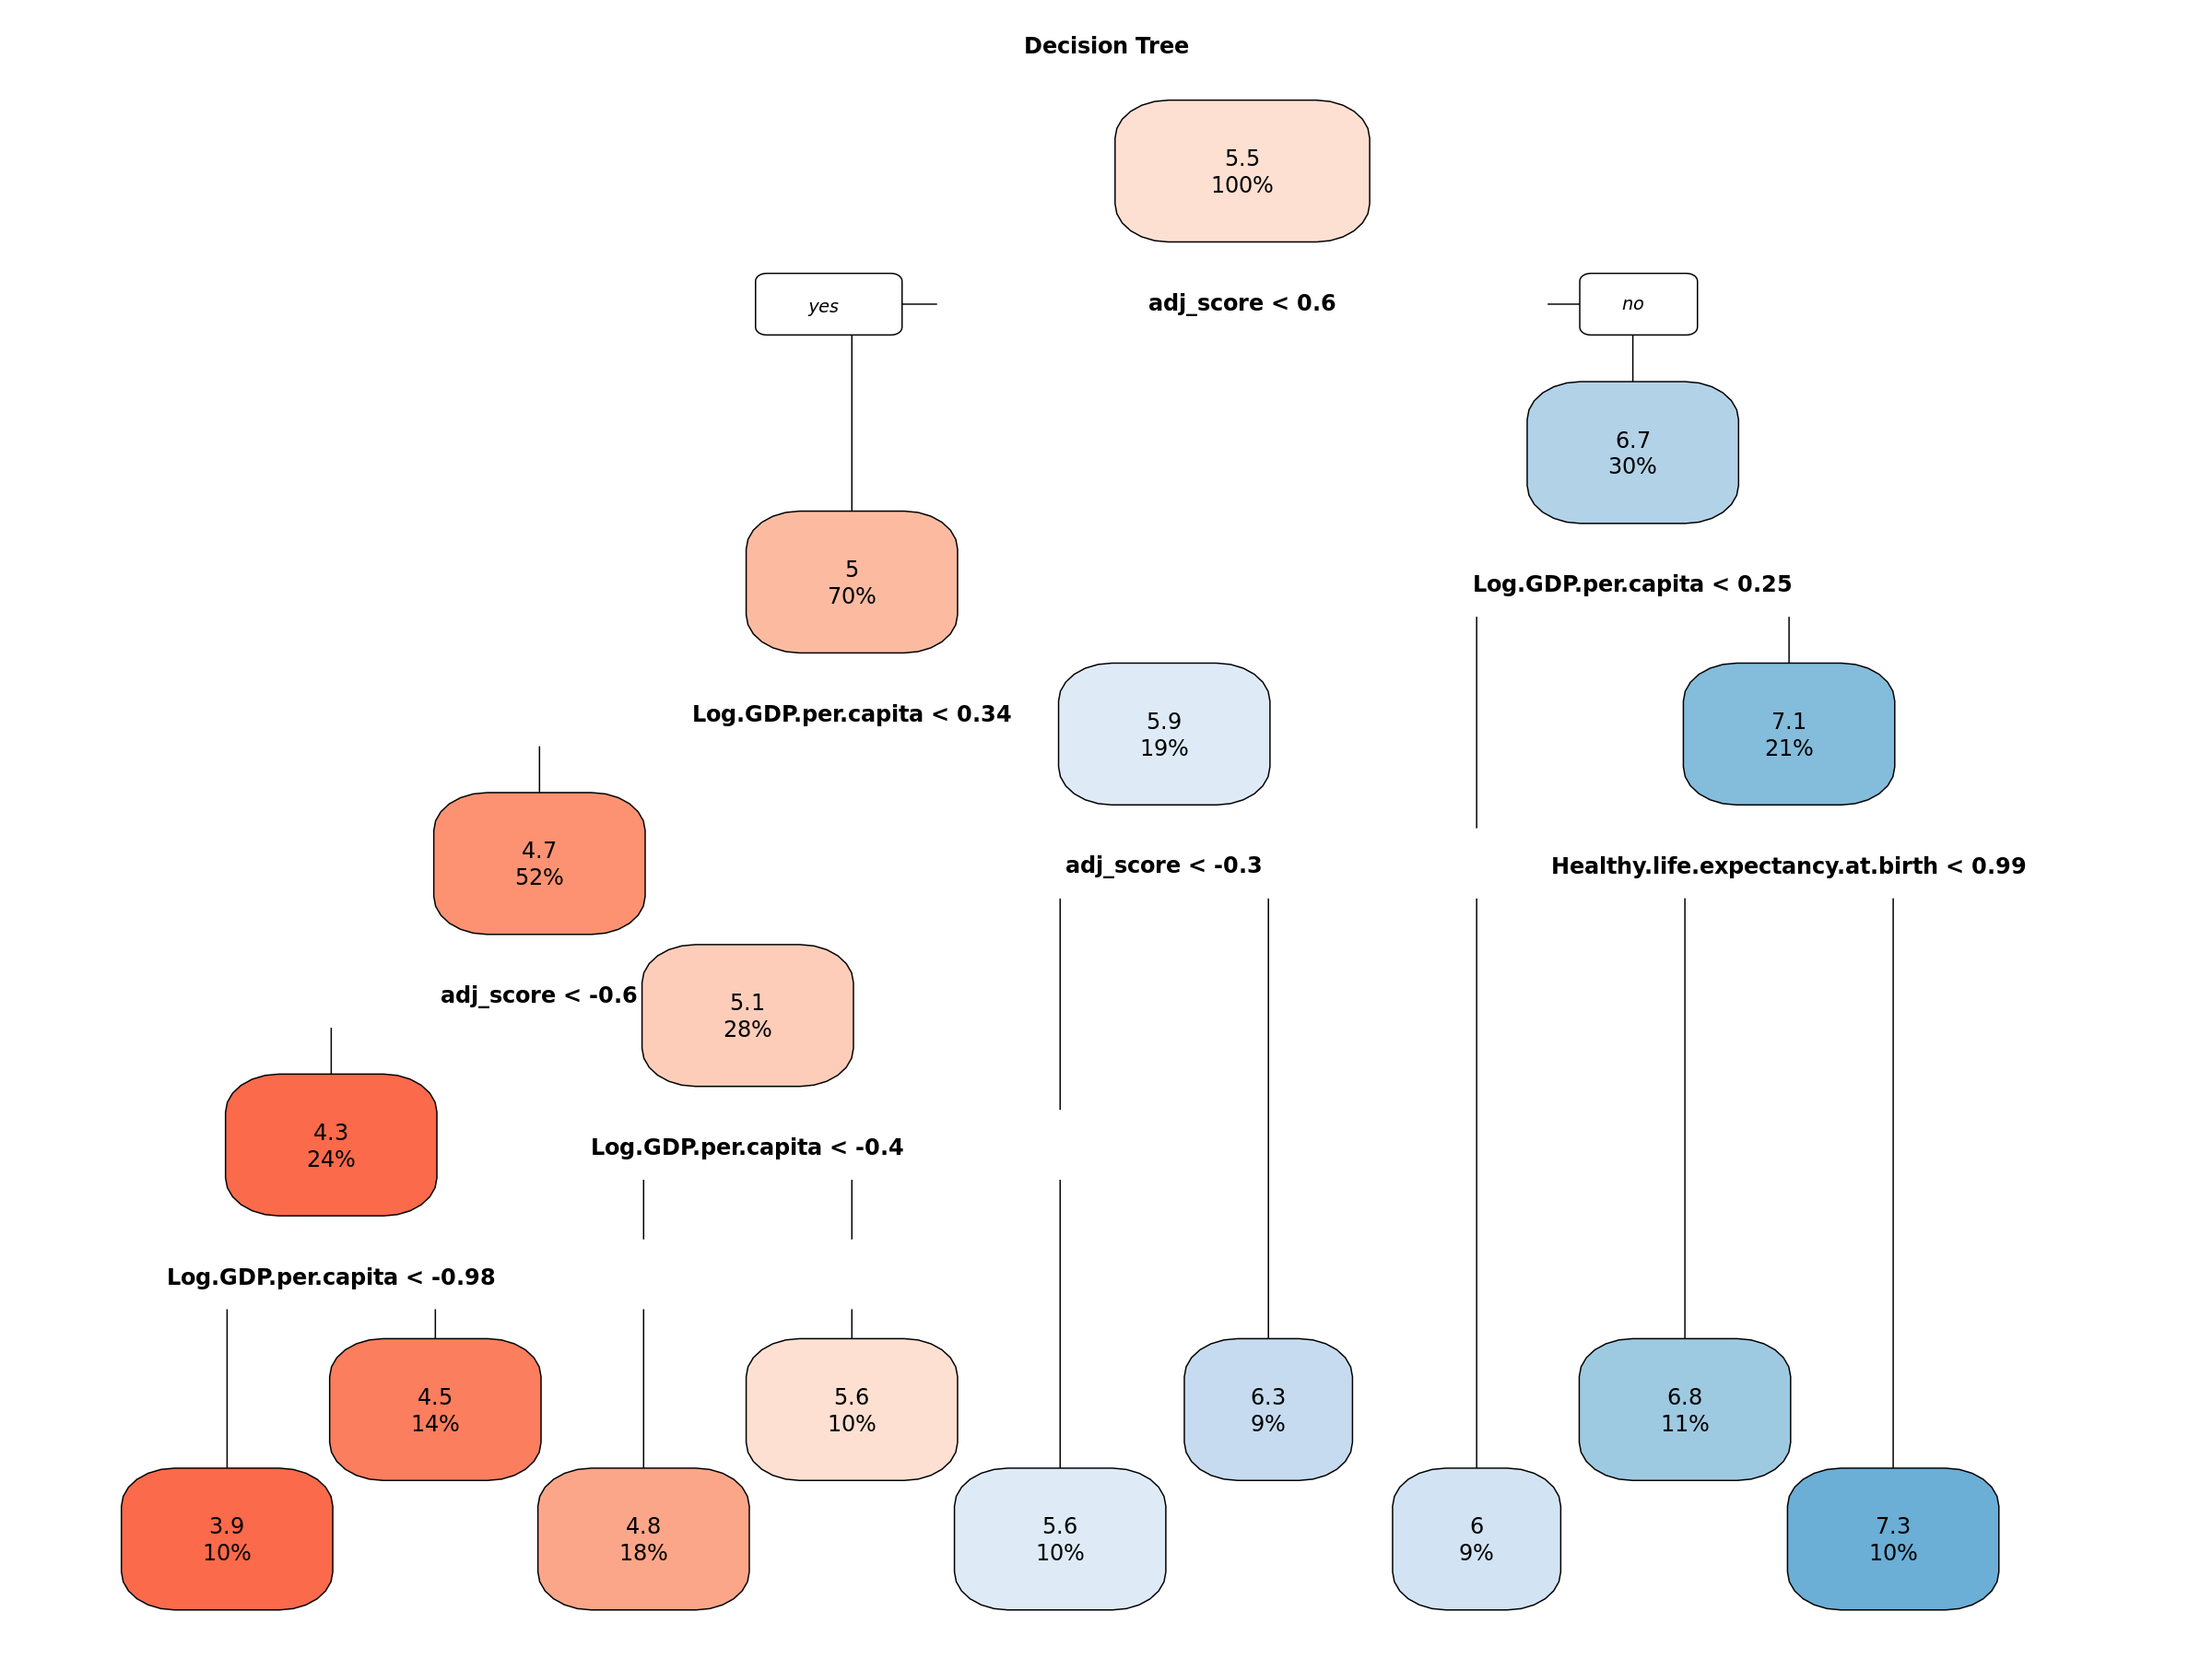

In [64]:
# We will visualize the tree structure of the model.
best_tree <- rpart(Life.Ladder ~ ., data = train_scaled2, method = "anova")

rpart.plot(best_tree,
           type = 2,
           cex = 1.2,
           fallen.leaves = TRUE,
           box.palette = "RdBu",
           main = "Decision Tree")


The first split is on adj_score, indicating it’s the most influential variable. Paths with lower adjusted scores and GDP values lead to lower predicted happiness (e.g., 3.9–5.6), while higher values in health and GDP lead to higher scores (e.g., 6.8–7.3).

Overall, the tree reflects logical relationships: higher well-being indicators (like income and health) result in higher predicted happiness.

In [65]:
importance_values <- importance(rf_model2)
print(importance_values)


                                   %IncMSE IncNodePurity
year                              1.040433      1.360772
Log.GDP.per.capita               33.217180    127.994803
Social.support                   17.012134     44.757908
Healthy.life.expectancy.at.birth 24.329773    100.171298
Freedom.to.make.life.choices     11.481480     10.910643
Generosity                       16.818641     11.976053
Perceptions.of.corruption        15.015945     11.225426
Positive.affect                  16.165596     21.723468
Negative.affect                   8.668325      3.803472
emotional_balance                11.140593      8.698050
adj_score                        44.018850    145.337290
support_ratio                     9.872360      5.507545
Wealth_Health                    19.689815      8.756878
delta_happiness                   7.961247      6.123874


According to the feature importance table, adj_score is the most influential variable in predicting happiness, followed by Log.GDP.per.capita, Healthy.life.expectancy.at.birth, and Social.support. These factors contribute significantly to the model's accuracy. In contrast, variables like year, delta_happiness, and support_ratio have relatively low importance, indicating limited predictive power in this context.

- %IncMSE: How much does MSE increase when the variable is corrupted? 
- IncNodePurity: Contribution to node splits in decision trees.

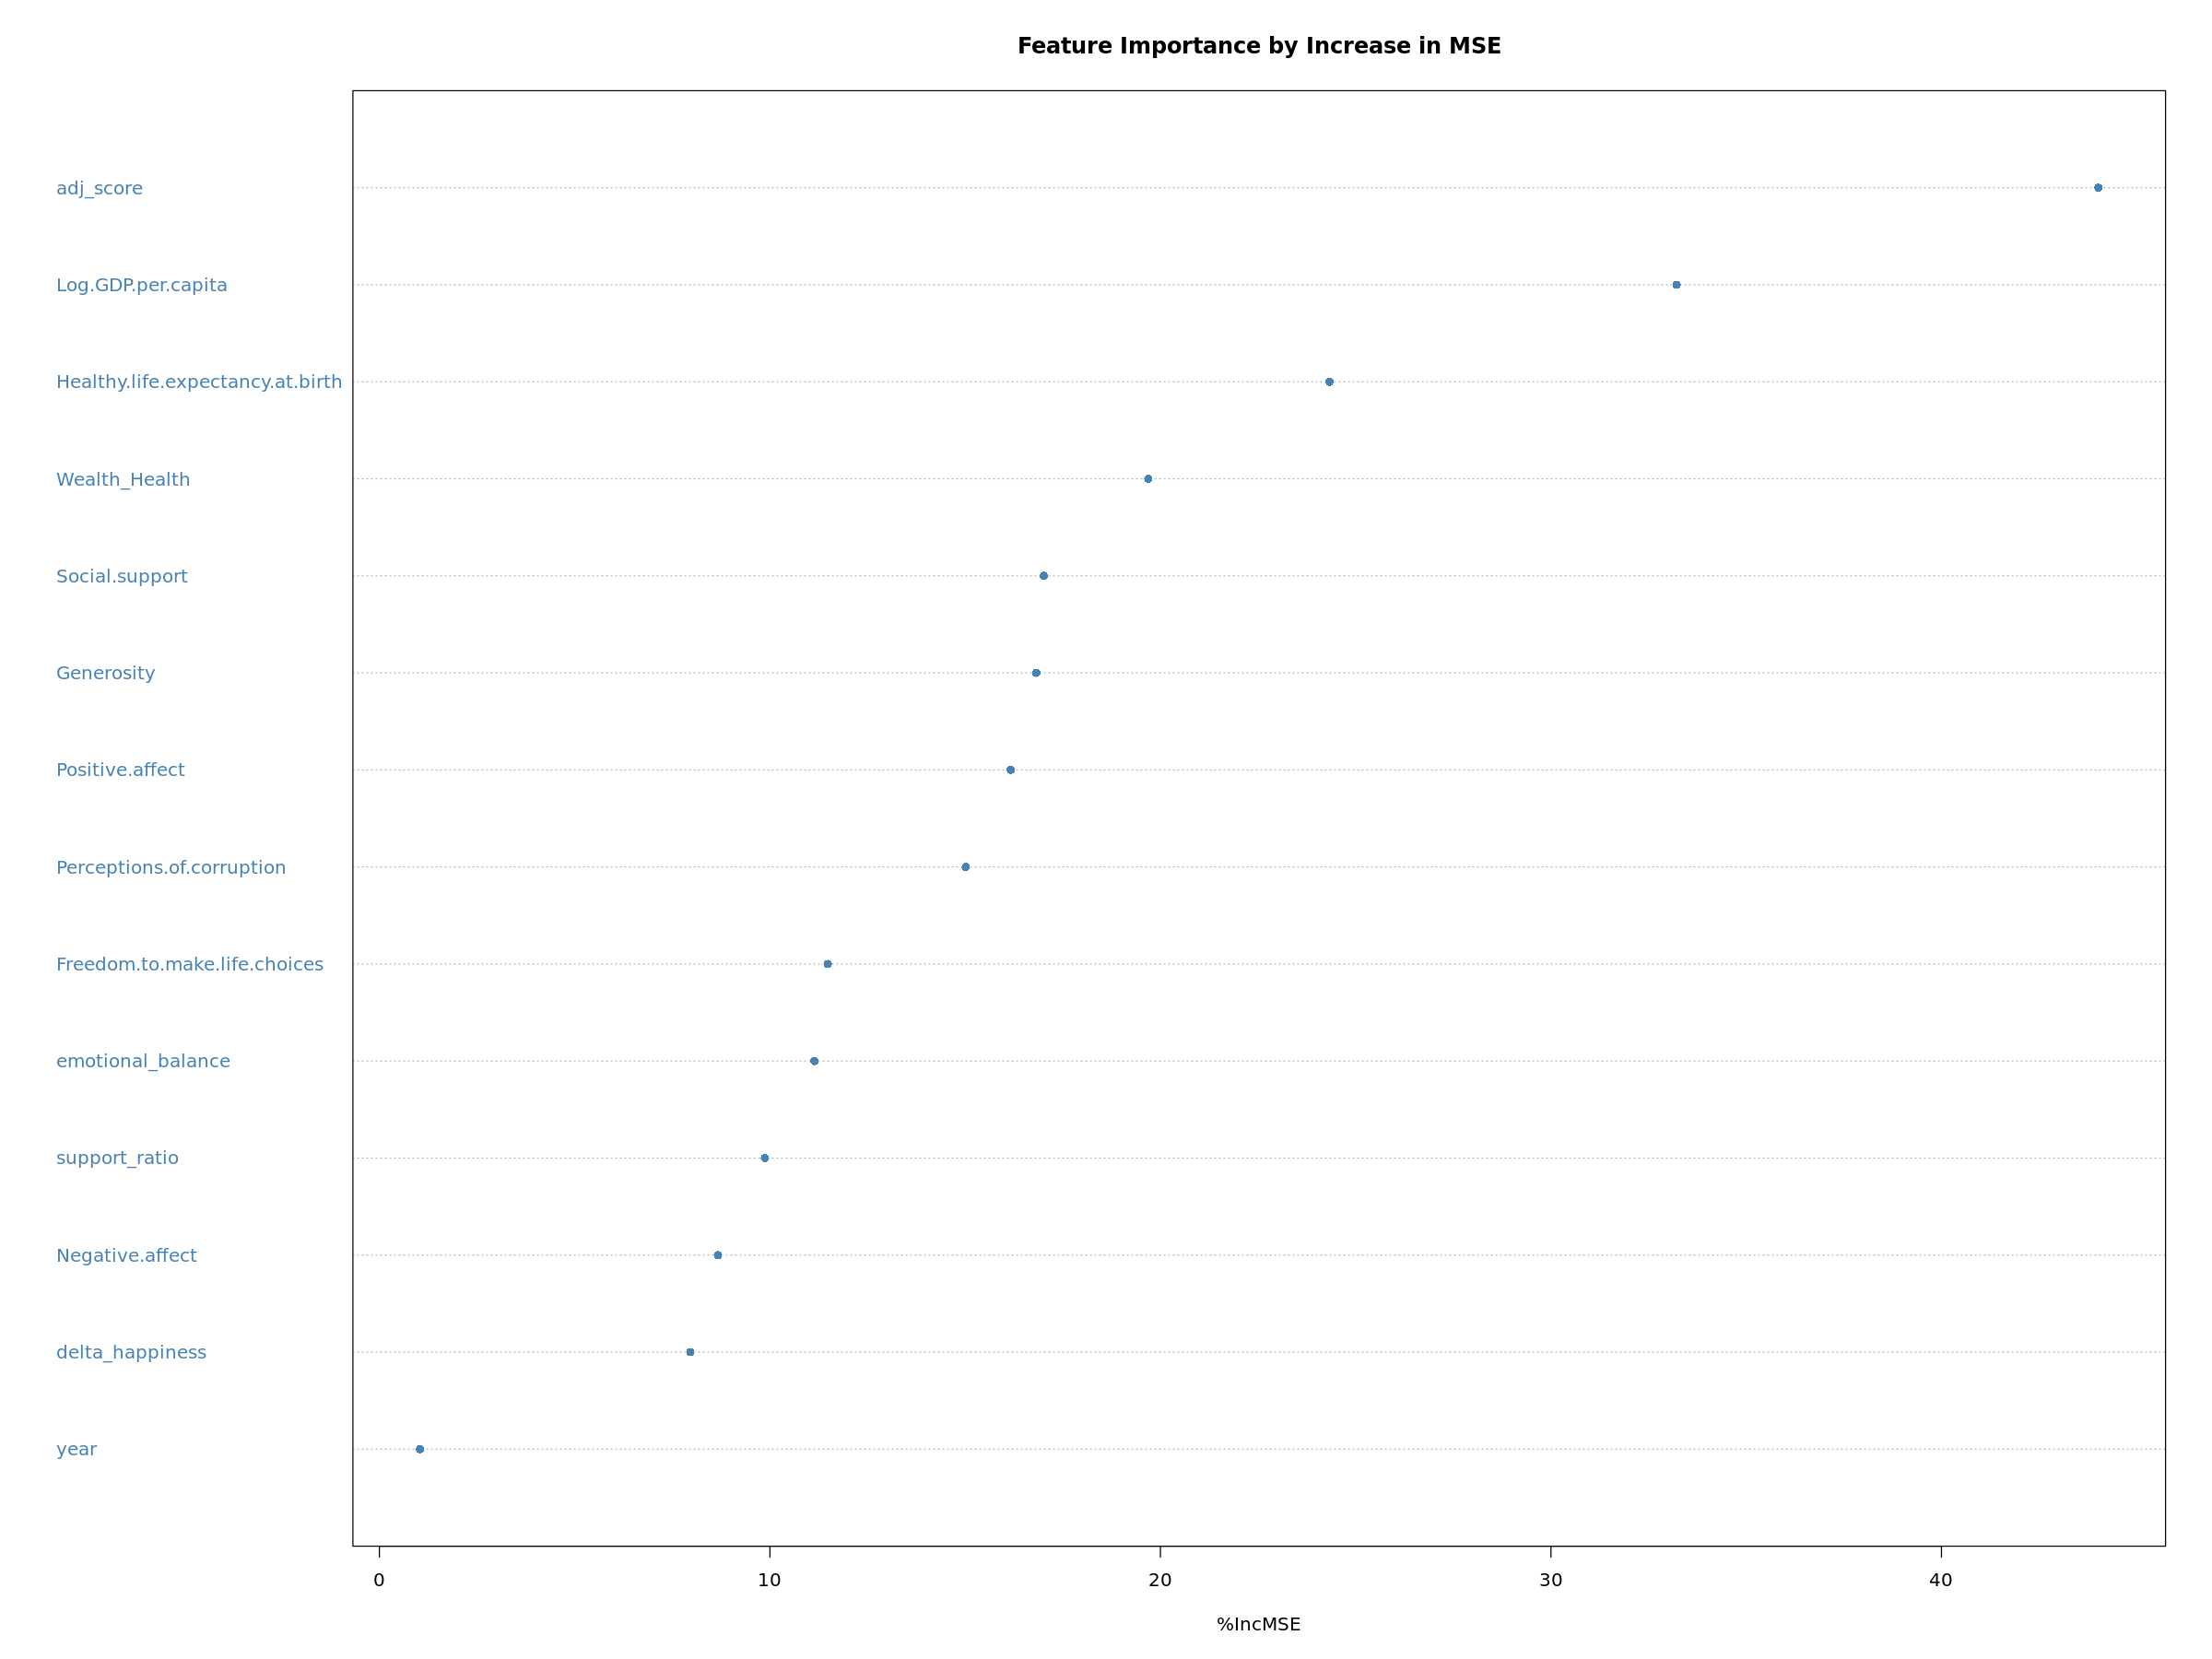

In [67]:
varImpPlot(rf_model2, 
           type = 1,  # %IncMSE
           main = "Feature Importance by Increase in MSE",
           col = "steelblue", 
           pch = 16)


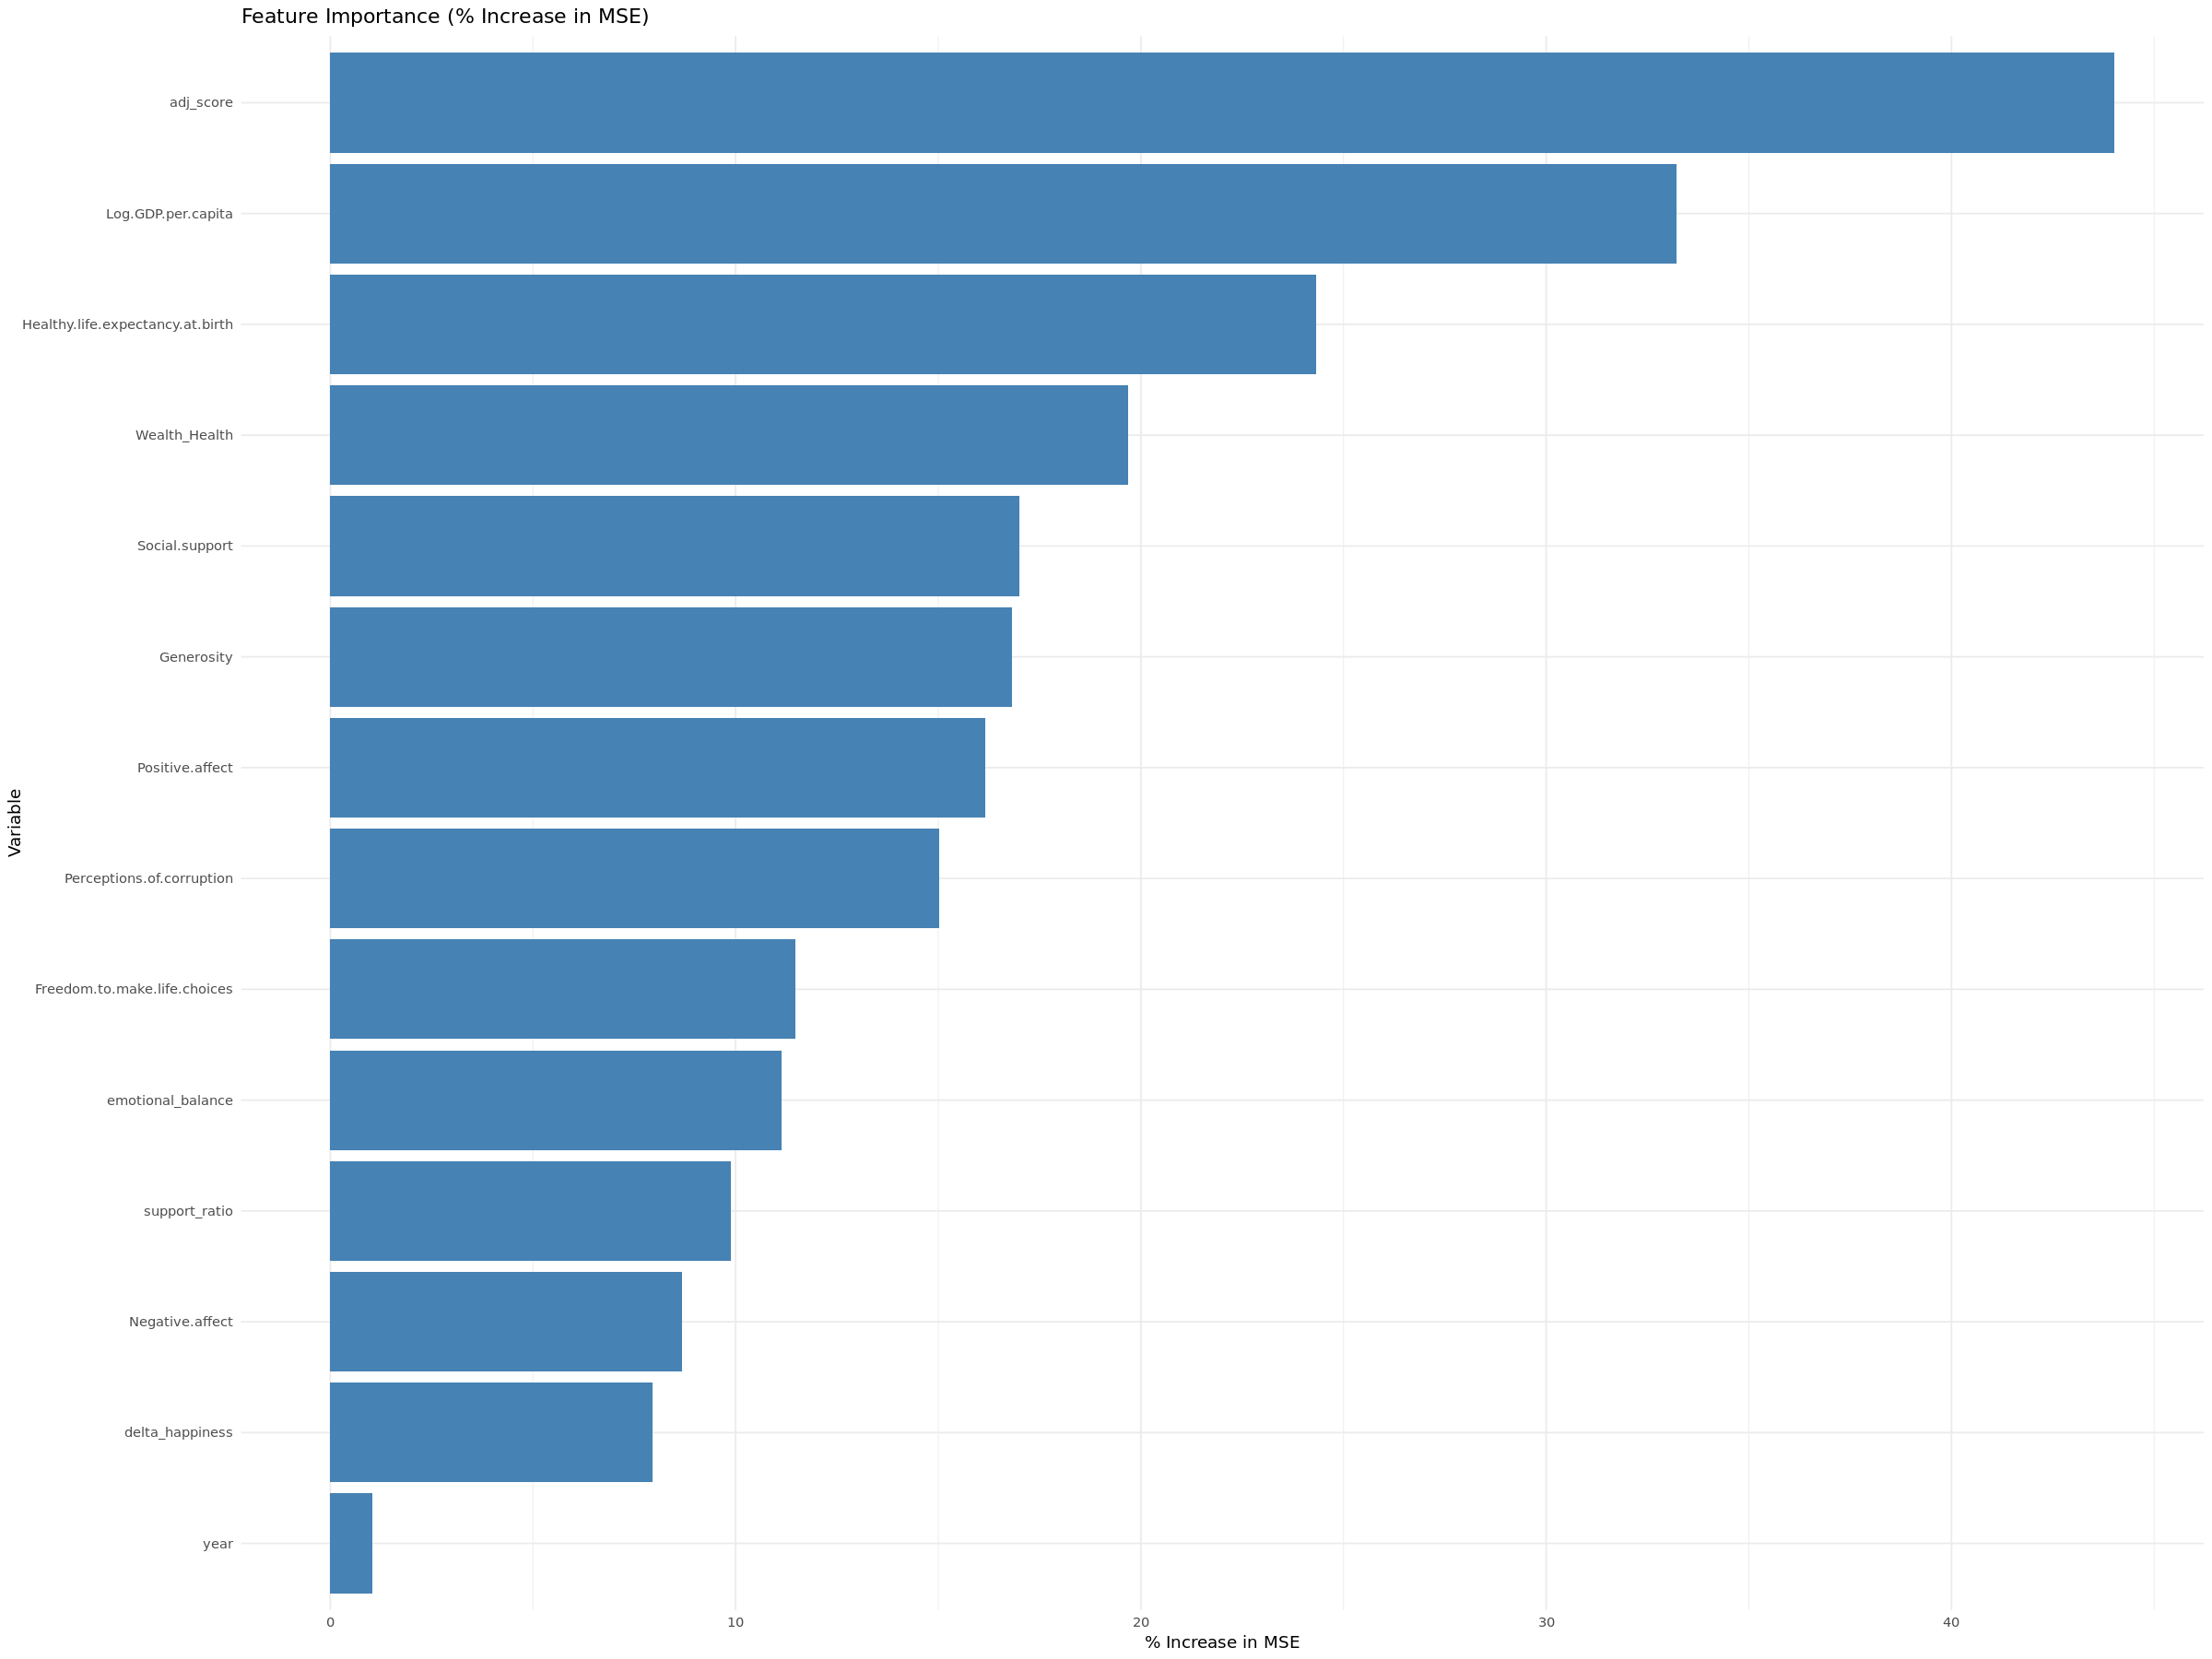

In [69]:

importance_df <- data.frame(
  Feature = rownames(importance_values),
  IncMSE = importance_values[, "%IncMSE"]
)

importance_df <- importance_df %>%
  arrange(desc(IncMSE))

ggplot(importance_df, aes(x = reorder(Feature, IncMSE), y = IncMSE)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Feature Importance (% Increase in MSE)",
       x = "Variable", y = "% Increase in MSE") +
  theme_minimal()


adj_score: Highest importance – contributes the most to model accuracy.

Log.GDP.per.capita: Income per person – highly important, as expected.

Healthy.life.expectancy.at.birth: Longer life expectancy – strongly associated with happiness.

Wealth_Health: Wealth-to-health ratio – provides meaningful contribution.

Social.support: Social support – has a strong positive impact.

## Tests For Overfitting 

In [71]:
train_preds <- predict(rf_model2, newdata = train_scaled2)
train_actuals <- train_scaled2$Life.Ladder

train_r2 <- cor(train_preds, train_actuals)^2
train_rmse <- sqrt(mean((train_preds - train_actuals)^2))

test_r2 <- cor(predictions2, test_scaled2$Life.Ladder)^2
test_rmse <- sqrt(mean((predictions2 - test_scaled2$Life.Ladder)^2))

cat("Train R²:", round(train_r2, 3), "\n")
cat("Train RMSE:", round(train_rmse, 3), "\n")
cat("Test R² :", round(test_r2, 3), "\n")
cat("Test RMSE:", round(test_rmse, 3), "\n")


Train R²: 0.996 
Train RMSE: 0.078 
Test R² : 0.973 
Test RMSE: 0.189 


The model is not overfitting. Although it did very well in training, the results on the test set are also very good. No signs of overfitting.

In [72]:


rf_formula <- as.formula("Life.Ladder ~ .")

ctrl <- trainControl(method = "cv", number = 5)

set.seed(42)
rf_cv <- train(rf_formula, data = train_scaled2,
               method = "rf", trControl = ctrl)

print(rf_cv)


Random Forest 

448 samples
 14 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 358, 359, 358, 360, 357 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE       
   2    0.2728478  0.9526102  0.20369649
   8    0.1436350  0.9841488  0.09966204
  14    0.1214641  0.9875678  0.07786825

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 14.


* Model passed the second test too. The model’s performance on the test set is highly consistent, and cross-validation results confirm this.

* The model is highly successful and reliable. It uses a small number of well-chosen, impactful features. Thanks to the flexibility of the Random Forest algorithm, sufficient sample size, and low noise or missing data, the model achieves strong generalization and robust predictive performance.

## Exploring Random Forest without Derived Features (Optional Study)

We wanted to assess how much impact our derived features had on the performance of one of our models.

To do this, we removed all of the derived features from the dataset and retrained the model to compare the results.

In [84]:
df_ex <- df_filled %>%
  select(-c(emotional_balance, adj_score, support_ratio, Wealth_Health, delta_happiness))

In [85]:
train_data3 <- df_ex %>% filter(year >= 2007 & year <= 2014)

In [86]:
test_data3 <- df_ex %>% 
  filter(year > 2014)

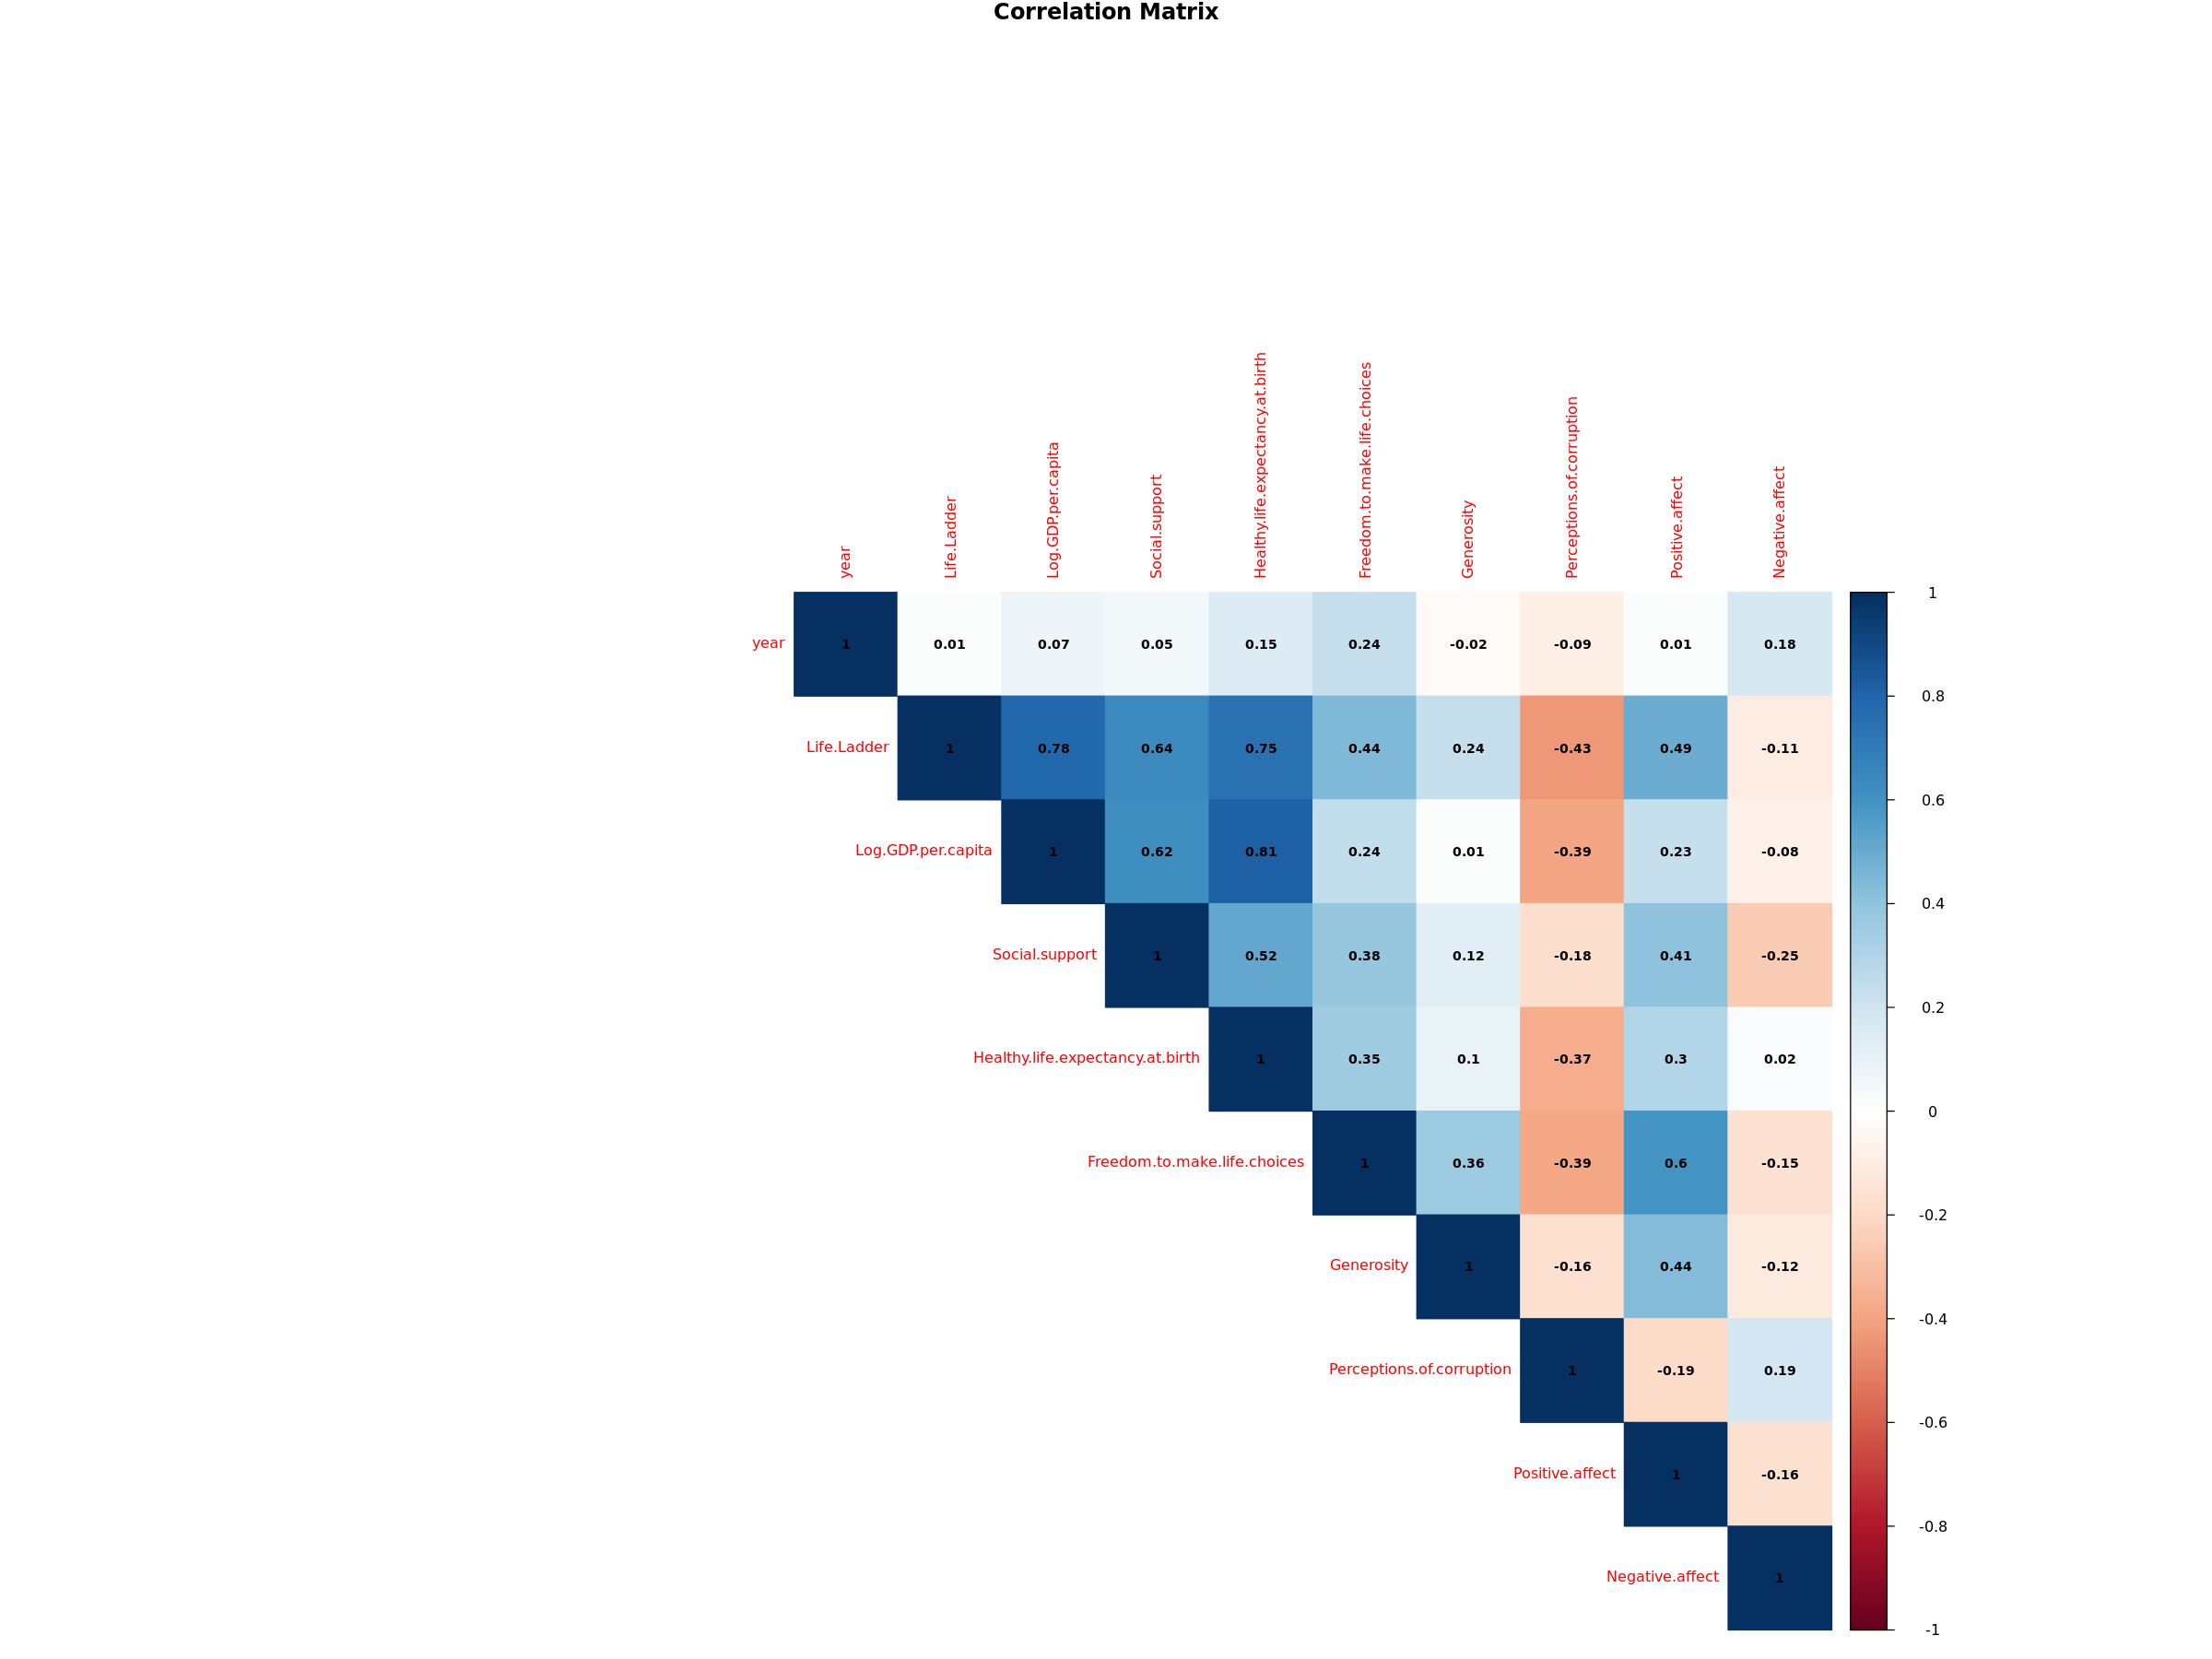

In [91]:
numeric_vars3 <- df_ex %>%
  filter(!is.na(Life.Ladder)) %>%        
  select(where(is.numeric)) %>%
  drop_na()                             
cor_matrix3 <- cor(numeric_vars3)

corrplot(cor_matrix3, method = "color", 
         type = "upper", 
         addCoef.col = "black",  
         tl.cex = 0.8, 
         number.cex = 0.7,
         title = "Correlation Matrix", mar=c(0,0,1,0))

In [92]:
target_cor3 <- cor_matrix3["Life.Ladder", ]


In [94]:
selected_features3 <- names(target_cor3[abs(target_cor3) > 0.4 & names(target_cor3) != "Life.Ladder"])
print(selected_features3)

[1] "Log.GDP.per.capita"               "Social.support"                  
[3] "Healthy.life.expectancy.at.birth" "Freedom.to.make.life.choices"    
[5] "Perceptions.of.corruption"        "Positive.affect"                 


In [95]:
train_scaled3 <- train_data3
train_scaled3[selected_features3] <- scale(train_data3[selected_features3])

scale_params3 <- attributes(scale(train_data3[selected_features3]))

test_scaled3 <- test_data2
test_scaled3[selected_features3] <- scale(test_data2[selected_features3],
                                center = scale_params3$`scaled:center`,
                                scale = scale_params3$`scaled:scale`)


In [96]:
train_scaled3 <- train_scaled3 %>% select(-Country.name)
test_scaled3 <- test_scaled3 %>% select(-Country.name)

In [98]:
train_scaled3 <- na.omit(train_scaled3)
test_scaled3 <- na.omit(test_scaled3)

set.seed(42)
rf_model3 <- randomForest(Life.Ladder ~ ., data = train_scaled3, importance = TRUE)

predictions3 <- predict(rf_model3, newdata = test_scaled3)


actuals <- test_scaled3$Life.Ladder

mae <- mean(abs(predictions3 - actuals))
rmse <- sqrt(mean((predictions3 - actuals)^3))
r2 <- cor(predictions3, actuals)^2

cat("MAE:", round(mae, 3), "\n")
cat("RMSE:", round(rmse, 3), "\n")
cat("R-squared:", round(r2, 3), "\n")


MAE: 0.336 
RMSE: 0.275 
R-squared: 0.824 


Removing the derived features led to a noticeable drop in model performance. R-squared decreased from 0.97 to 0.80, indicating a weaker fit, while both MAE and RMSE increased significantly. This shows that the additional variables—especially combined features like adj_score—greatly improved the model’s accuracy by capturing complex patterns in the data.

# Comparing the Models


**LINEAR REGRESSION MODEL**

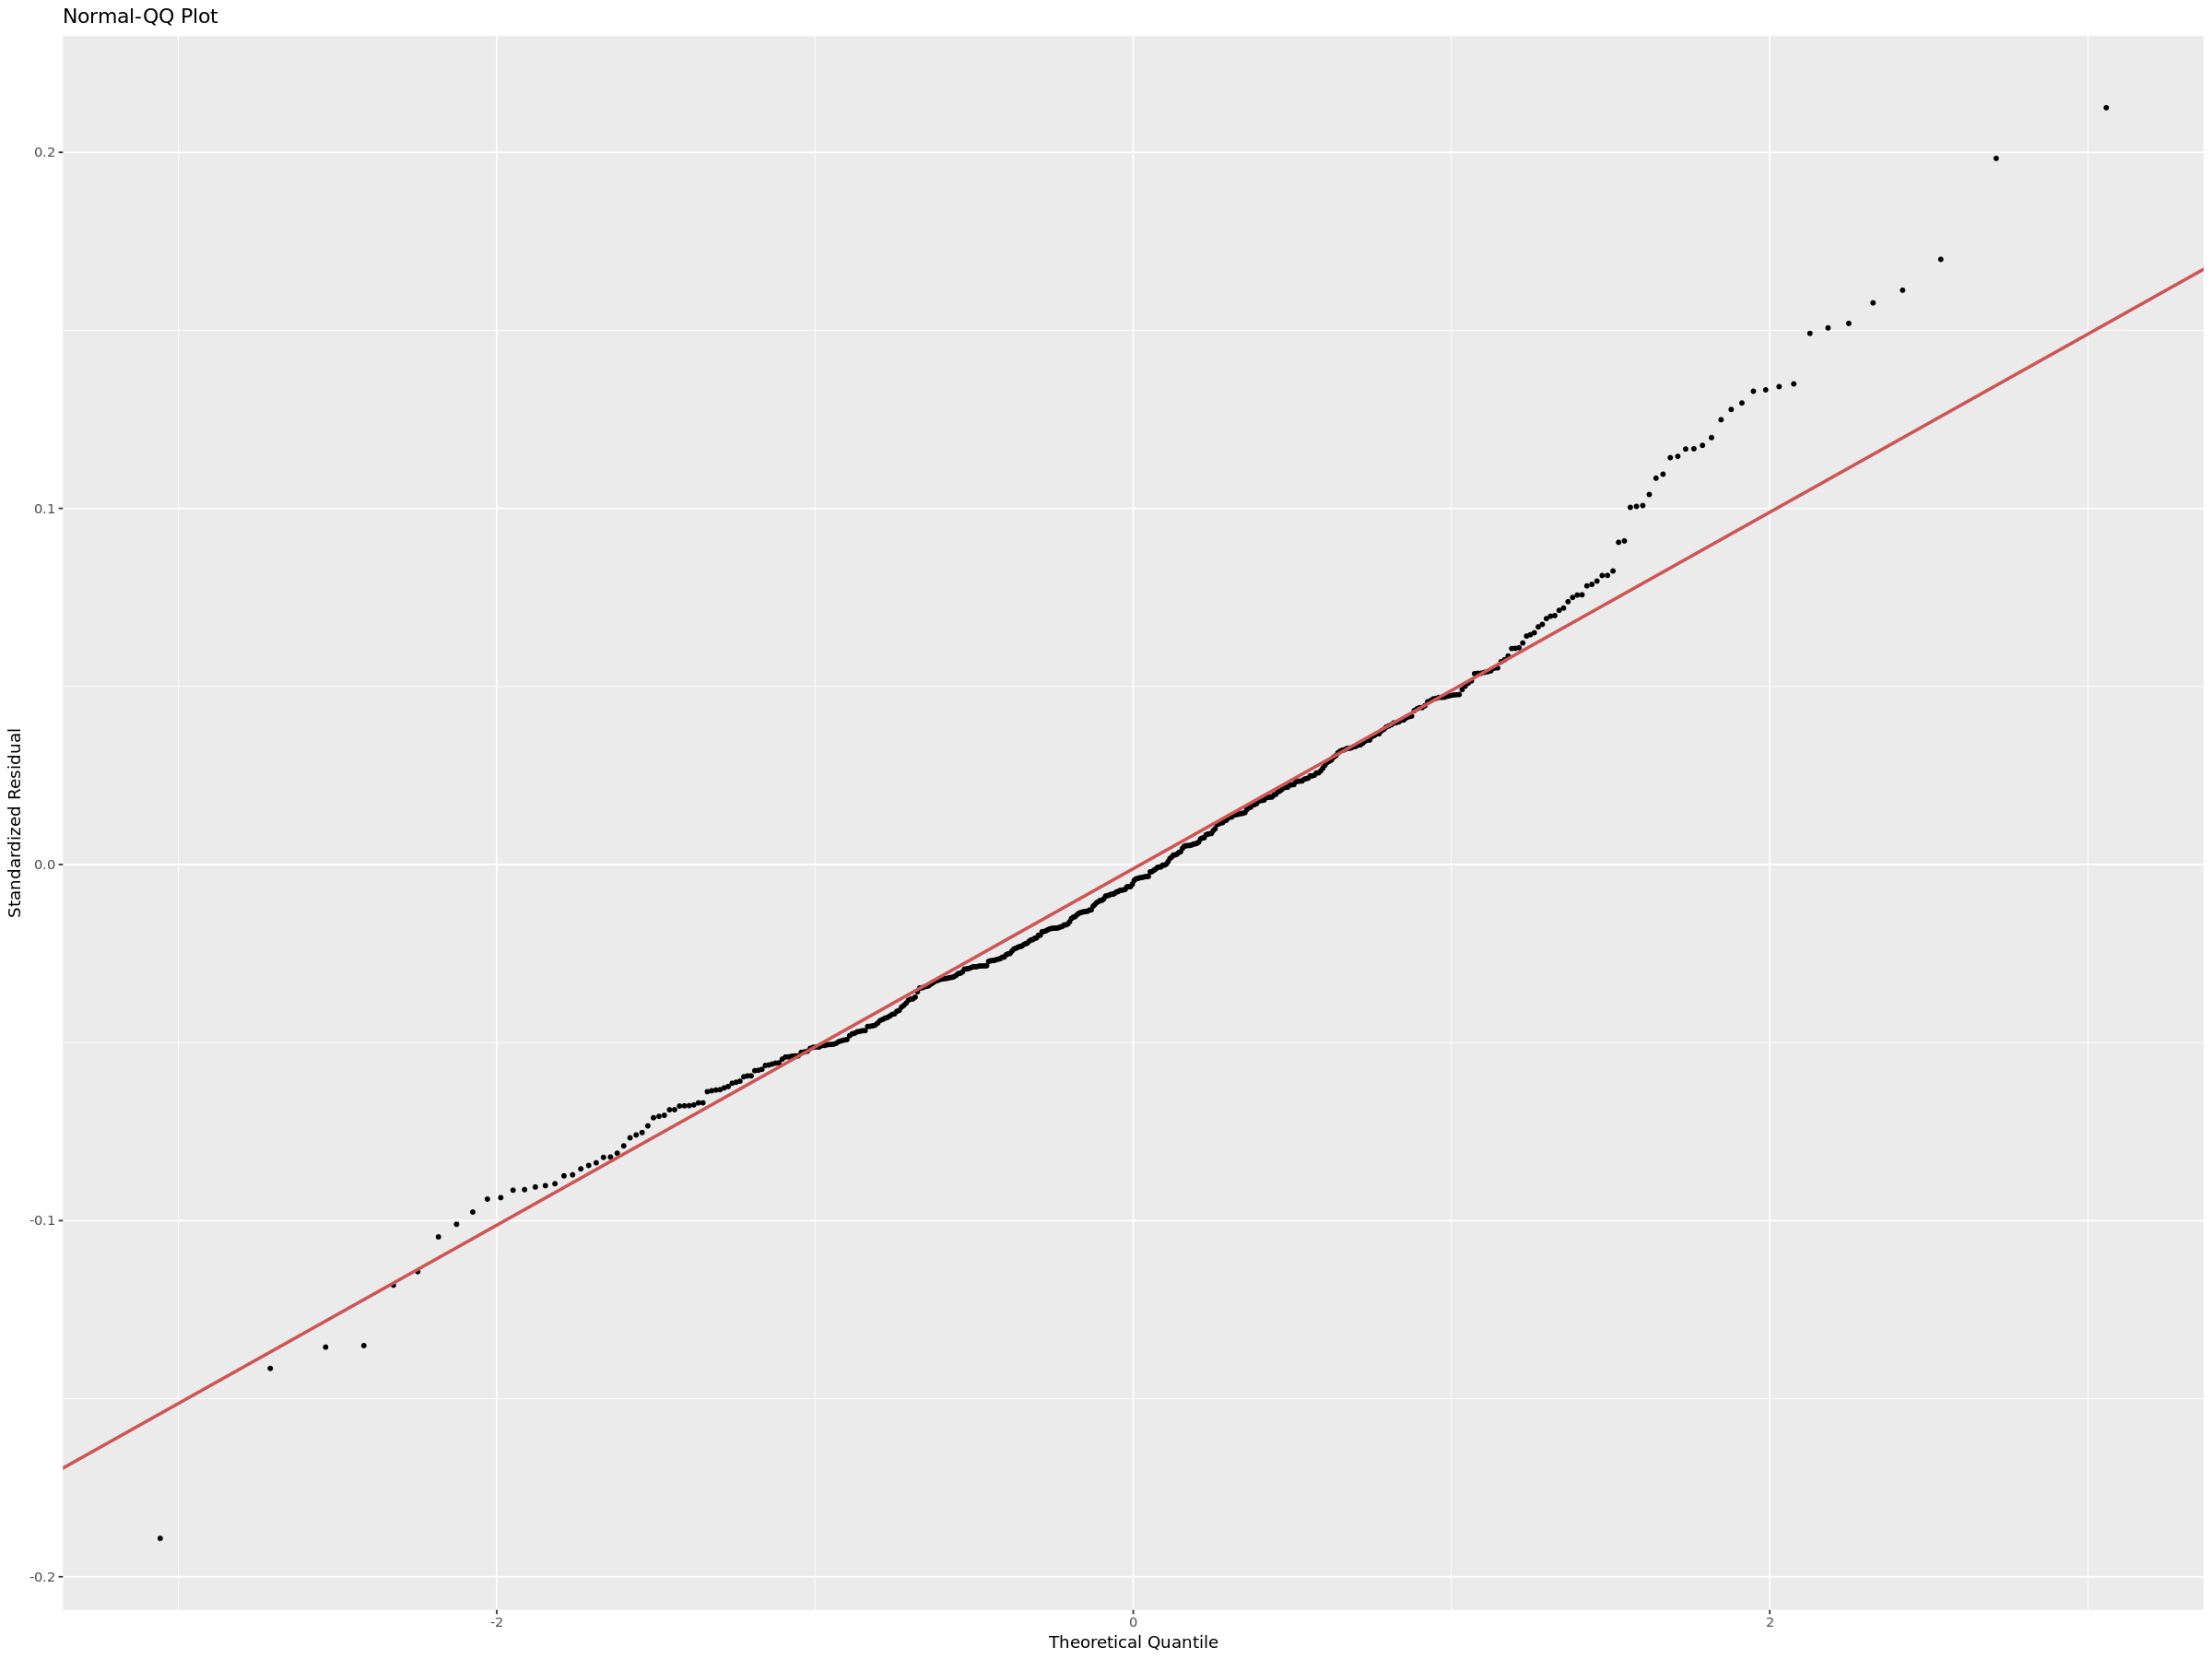

In [100]:
gg_qqplot(model)

This QQ plot, generated for the linear regression model, is generally acceptable, with residuals closely following the reference line in the center. However, the noticeable deviations at the tails suggest the presence of outlier observations or indicate that the model struggles to accurately predict extreme values. Alternatively, this pattern may reflect the linear model's limited ability to fully capture the behavior of outliers in the Life Ladder variable.

**RANDOM FOREST MODEL**

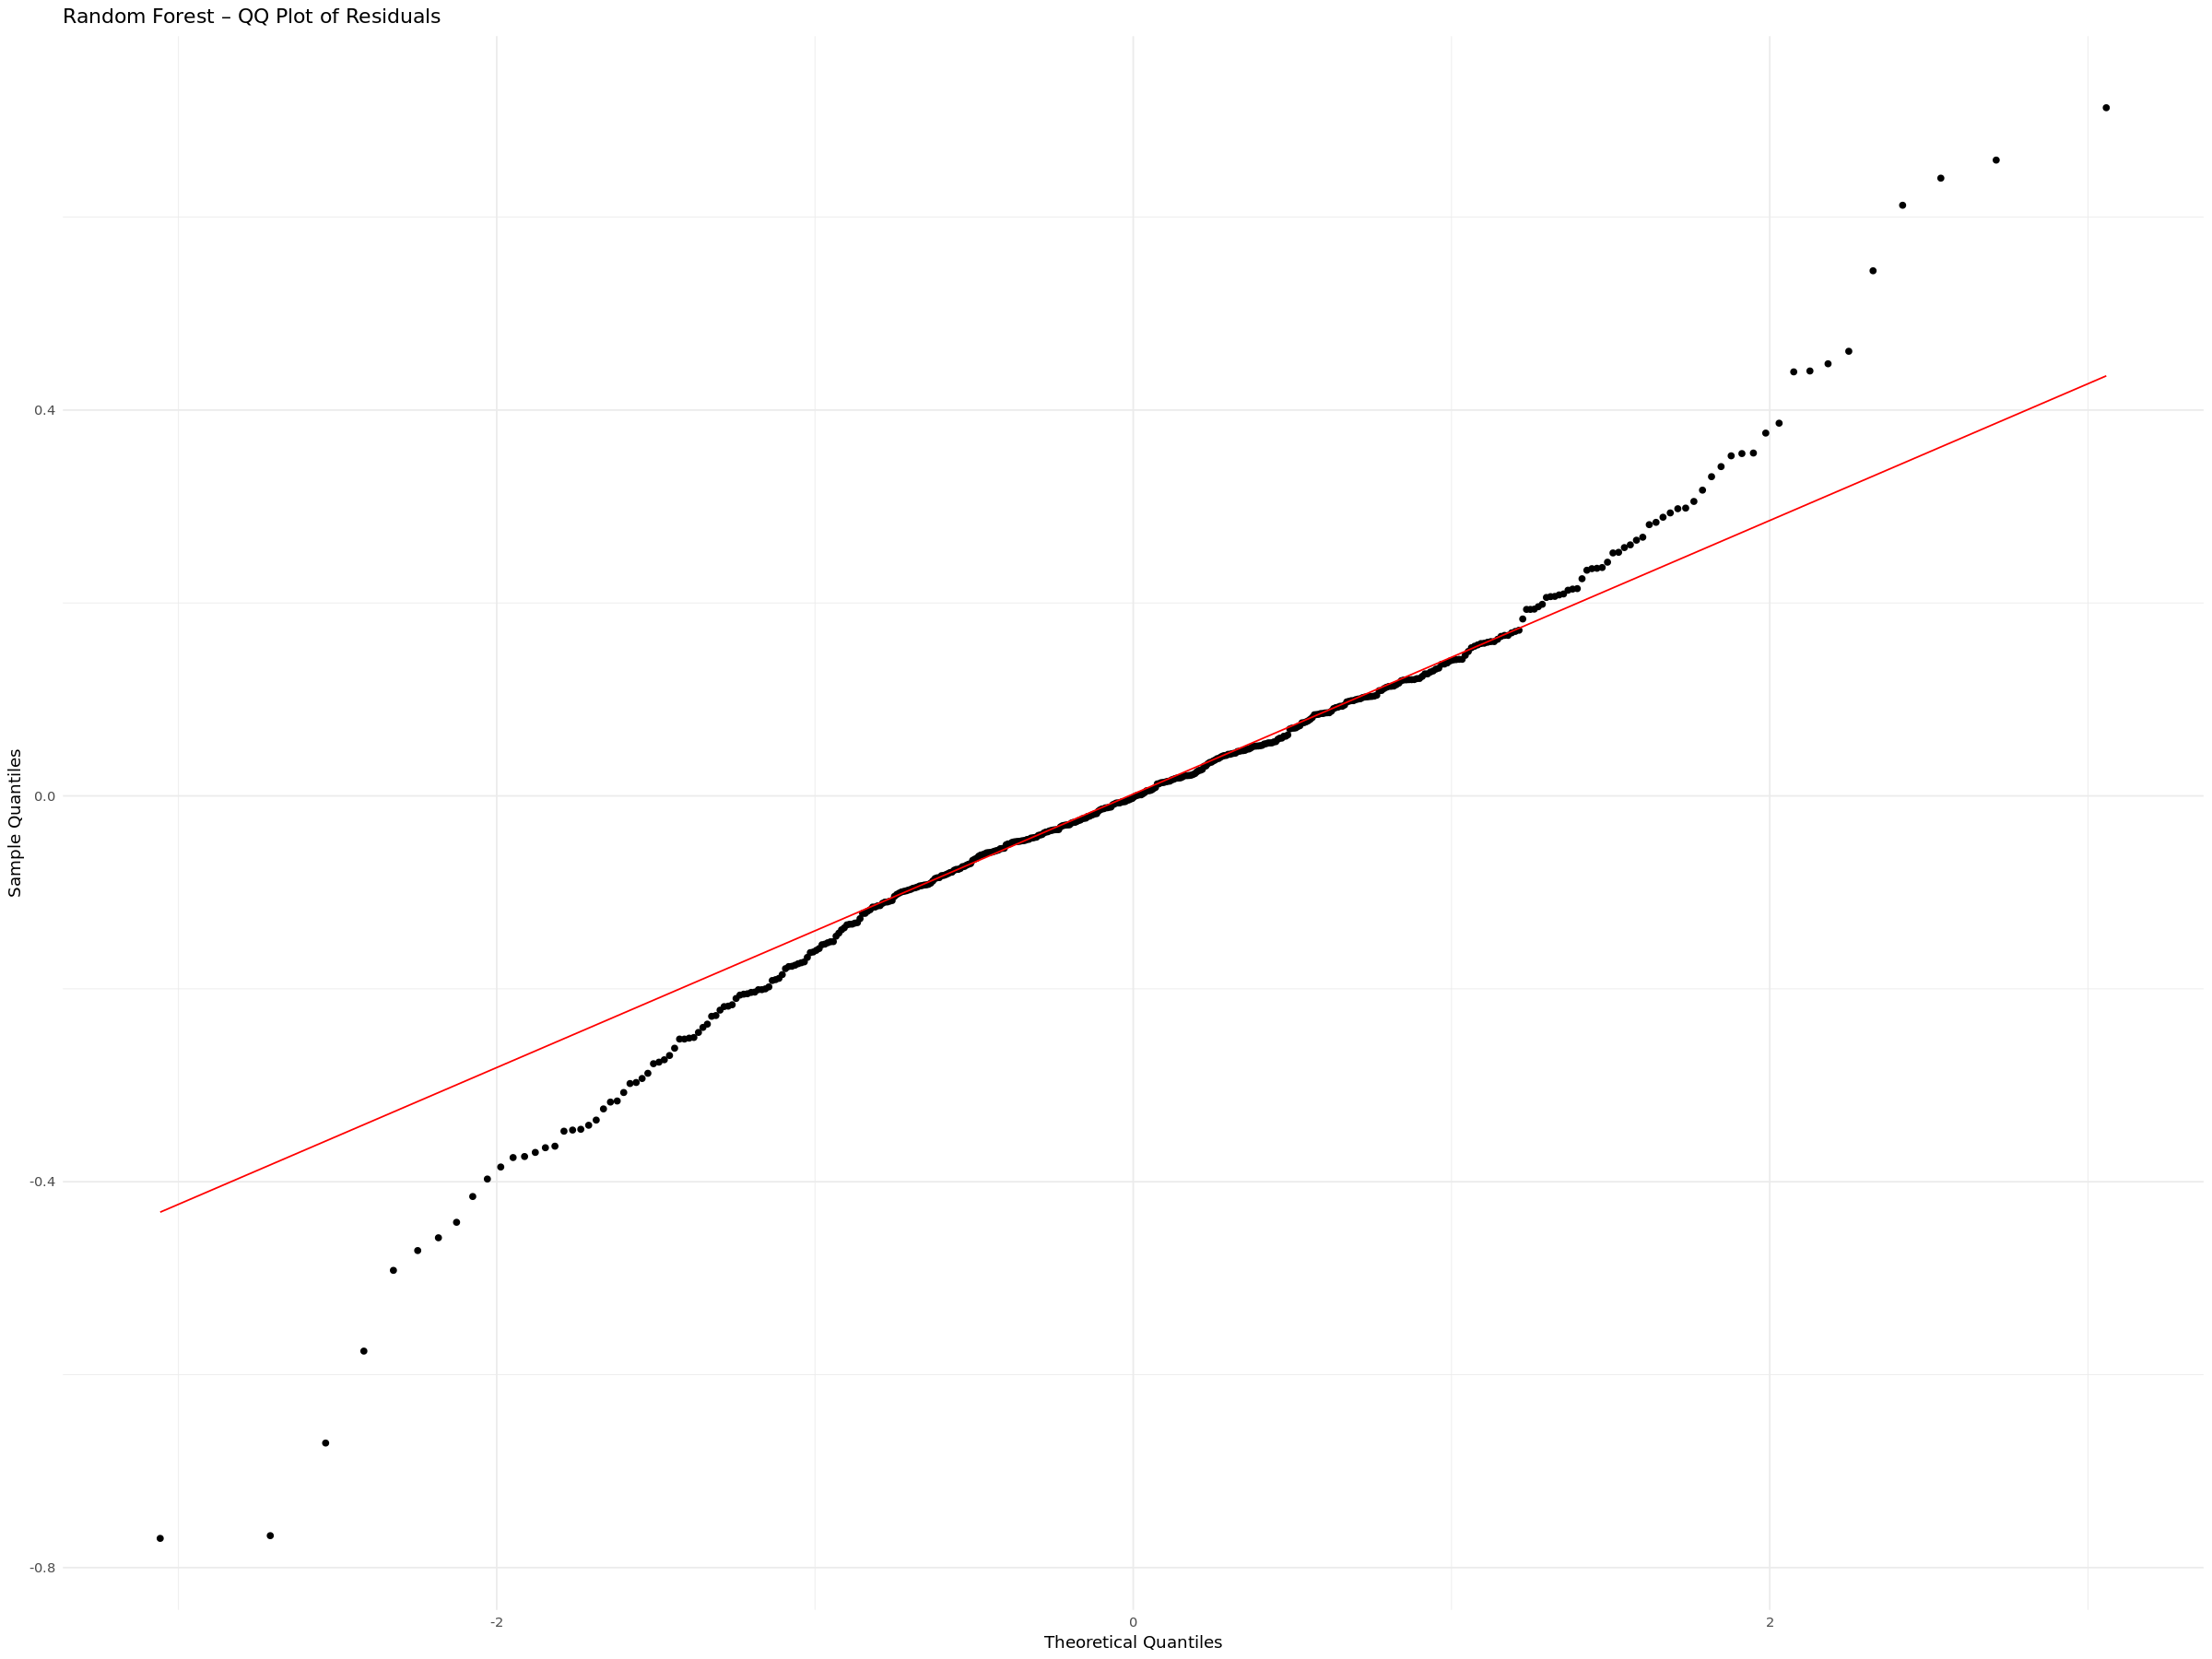

In [106]:
rf_residuals <- rf_model2$y - rf_model2$predicted
rf_df <- data.frame(resid = rf_residuals)

ggplot(rf_df, aes(sample = resid)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(title = "Random Forest – QQ Plot of Residuals",
       x = "Theoretical Quantiles", y = "Sample Quantiles") +
  theme_minimal()


* The QQ plot for the Random Forest model shows that residuals mostly follow the normal distribution, with slight deviations at the tails. These minor differences suggest the model may handle outliers less precisely, but since Random Forest doesn't assume normality, this does not affect its reliability. Overall, the residuals appear well-balanced.

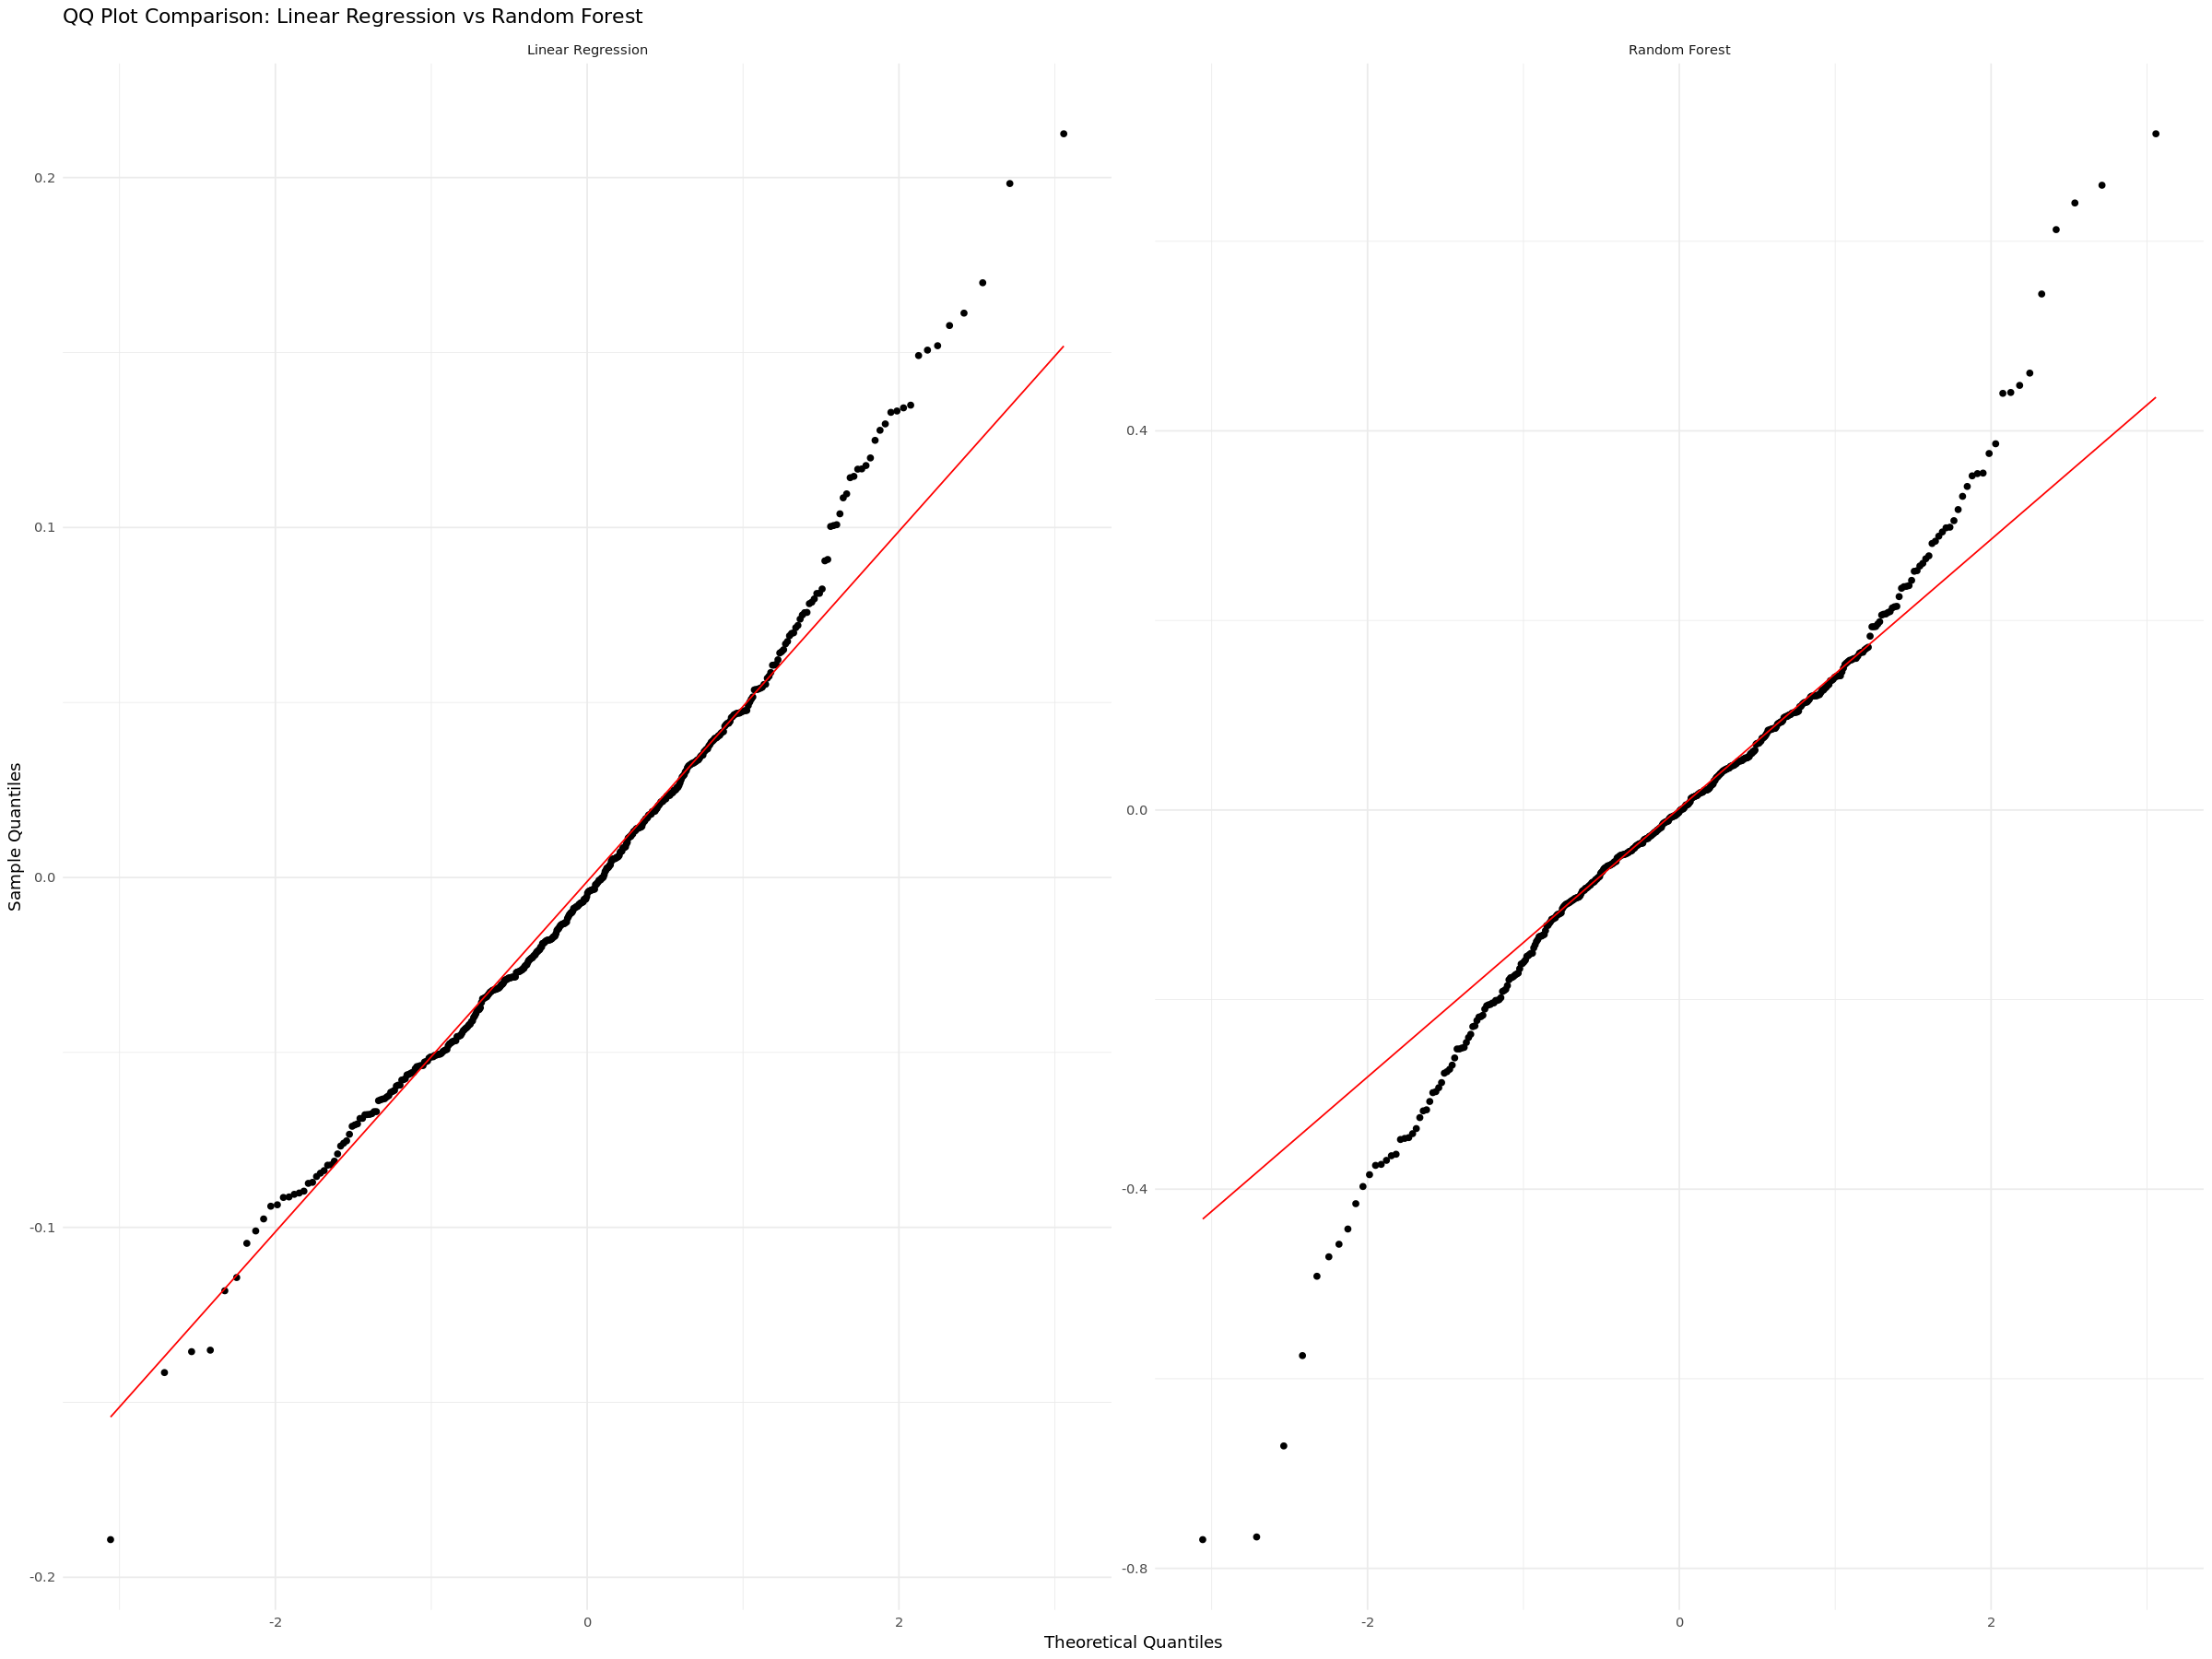

In [107]:


qq_df <- bind_rows(
  data.frame(resid = model$residuals, model = "Linear Regression"),
  data.frame(resid = rf_residuals, model = "Random Forest")
)

ggplot(qq_df, aes(sample = resid)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  facet_wrap(~ model, scales = "free") +
  labs(title = "QQ Plot Comparison: Linear Regression vs Random Forest",
       x = "Theoretical Quantiles", y = "Sample Quantiles") +
  theme_minimal()


These plots compare the residuals (errors) of the Linear Regression model (left) and the Random Forest model (right).

- If the points follow the red line closely, it means the model’s errors are close to a normal distribution.

- In the Linear Regression plot, most points follow the line, but there are small deviations at the ends. This means the model may have some larger errors (outliers) for certain predictions.

- In the Random Forest plot, the points are more closely aligned with the line, showing that the model's errors are more balanced and stable.

In summary, both models perform well, but the Random Forest model shows slightly better behavior in terms of error distribution.